# $CLUSTERING \ \ ANALYSIS$

## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

##Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


East-West Airlines is trying to learn more about its customers. Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering.

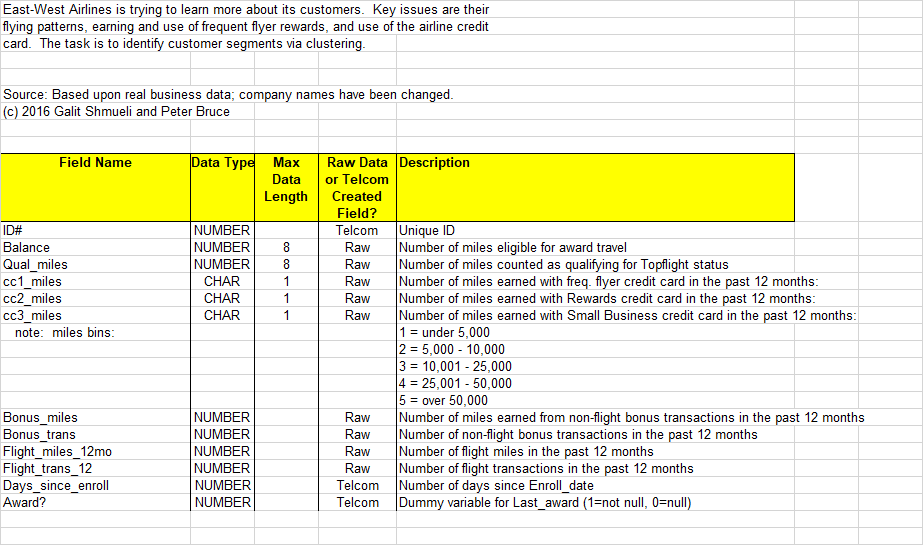

In [1]:
# @title Datasets:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

xls = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name=['Description', 'data'])

# Access individual sheets using sheet names
Description = xls['Description']
data0 = xls['data'].copy()
data = xls['data'].copy()
data.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [2]:
# @title Describe
data.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

* There are outliers in Balance, Qual_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll columns

In [3]:
# @title Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


* There are no missing values in the data and all columns have datatype int

In [4]:
# @title Column Types
num_cols = data.select_dtypes([np.int64,np.float64]).columns.tolist() # Select only numerical columns
print('Numerical Columns',num_cols)
cat_cols = data.select_dtypes('object').columns.tolist() # Select only object columns
print('Object Type Columns',cat_cols)

Numerical Columns ['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?']
Object Type Columns []


In [5]:
# @title Pairplot

sns.pairplot(data)

* By observing Pairplot it seems like there is only one class with some outliers

# Outliers

### Boxplot and Capping

ID#


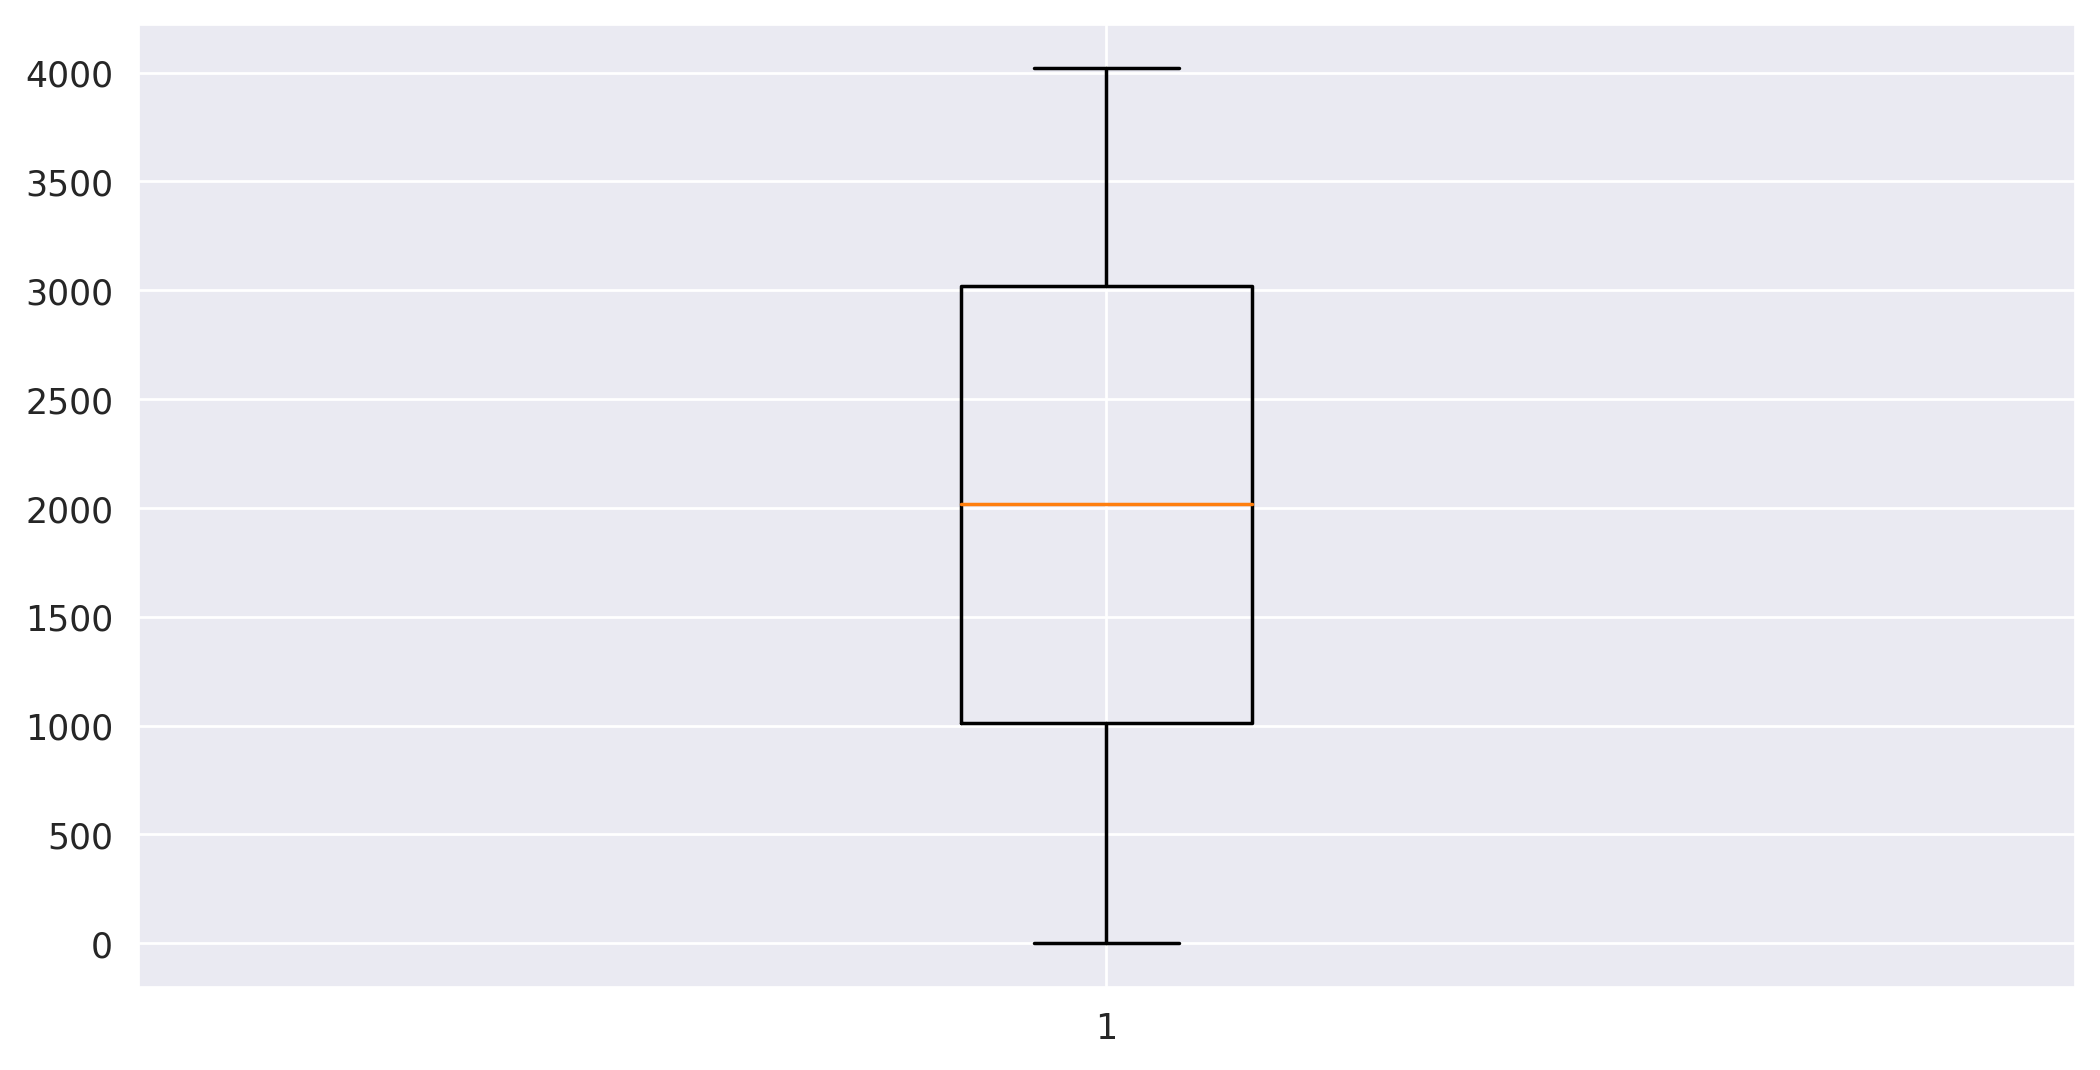

Balance


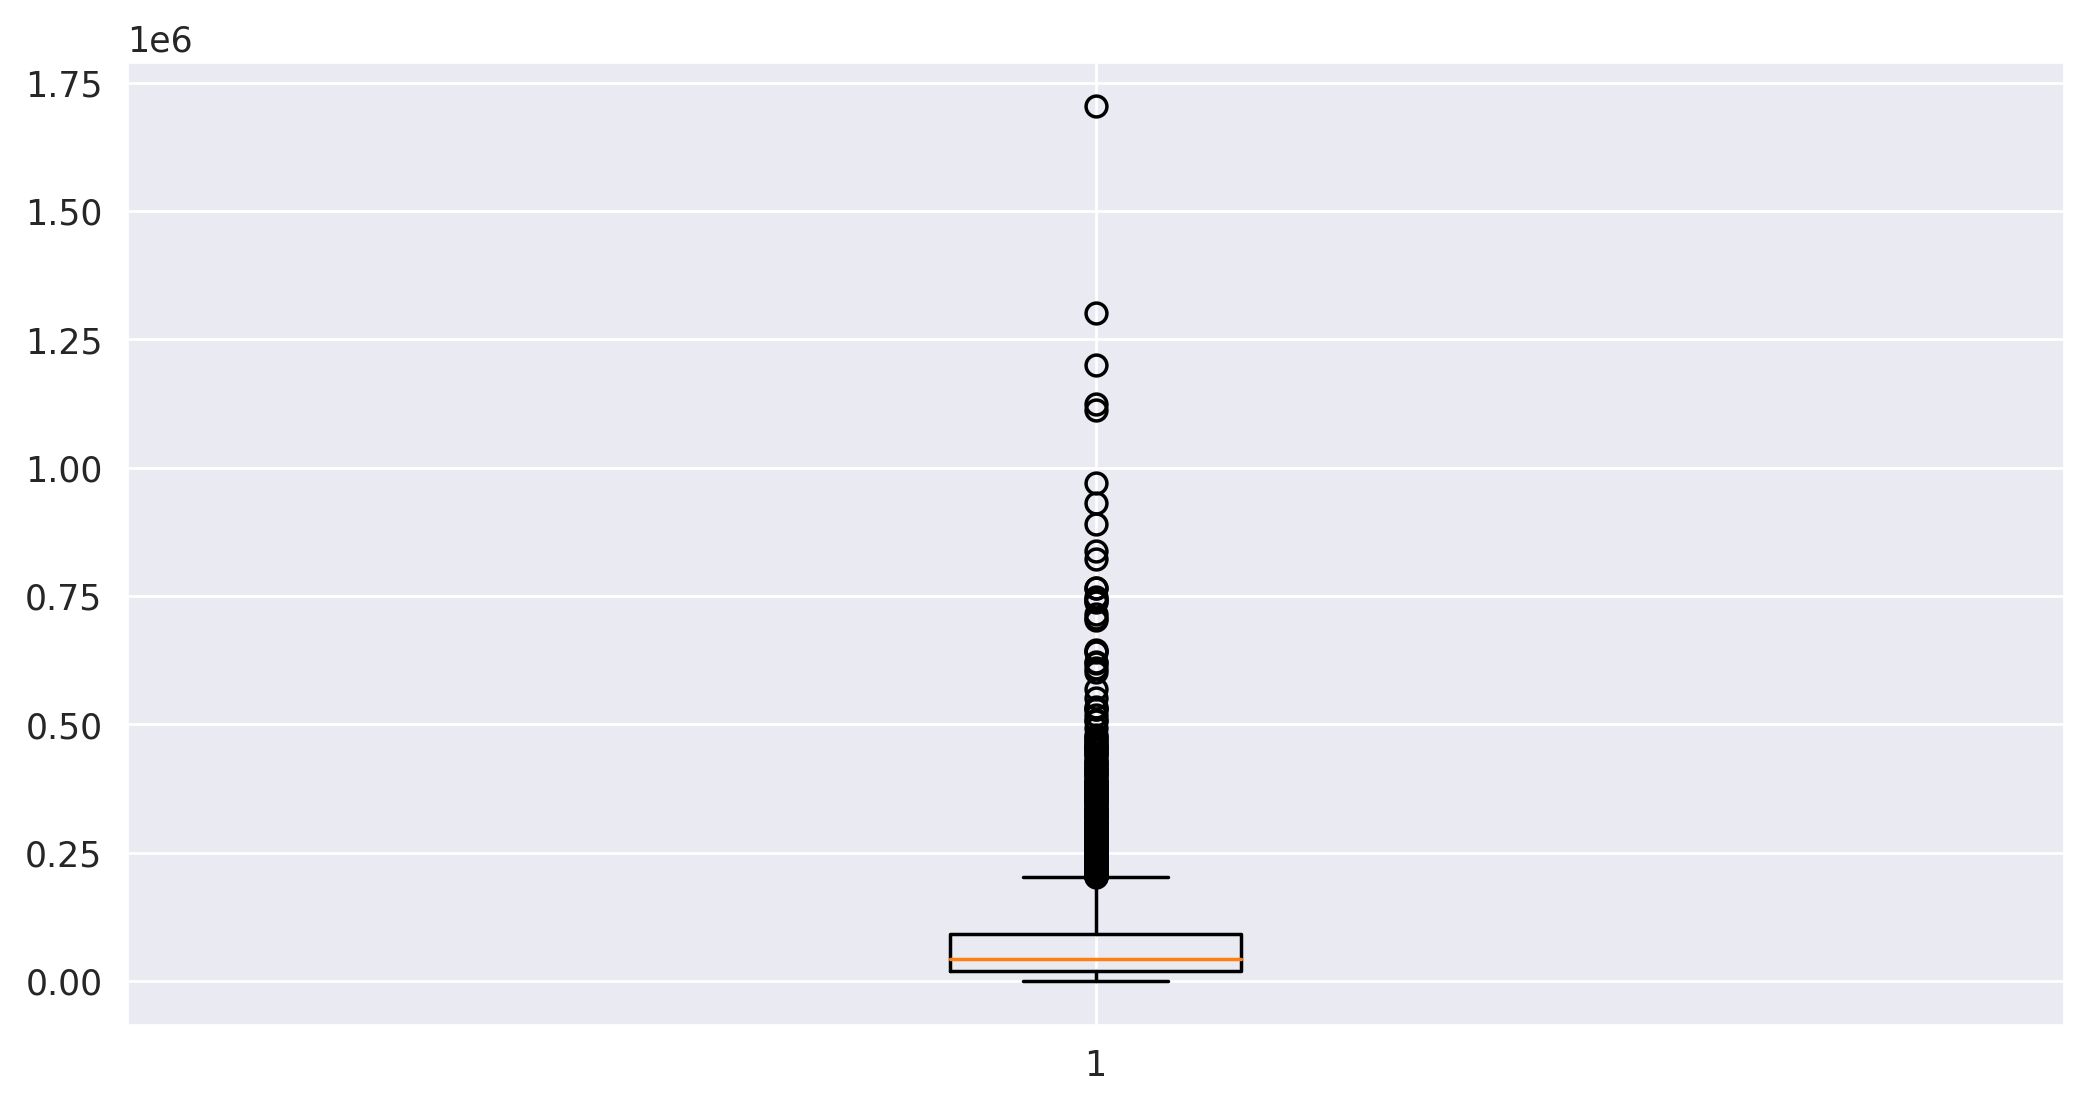

Qual_miles


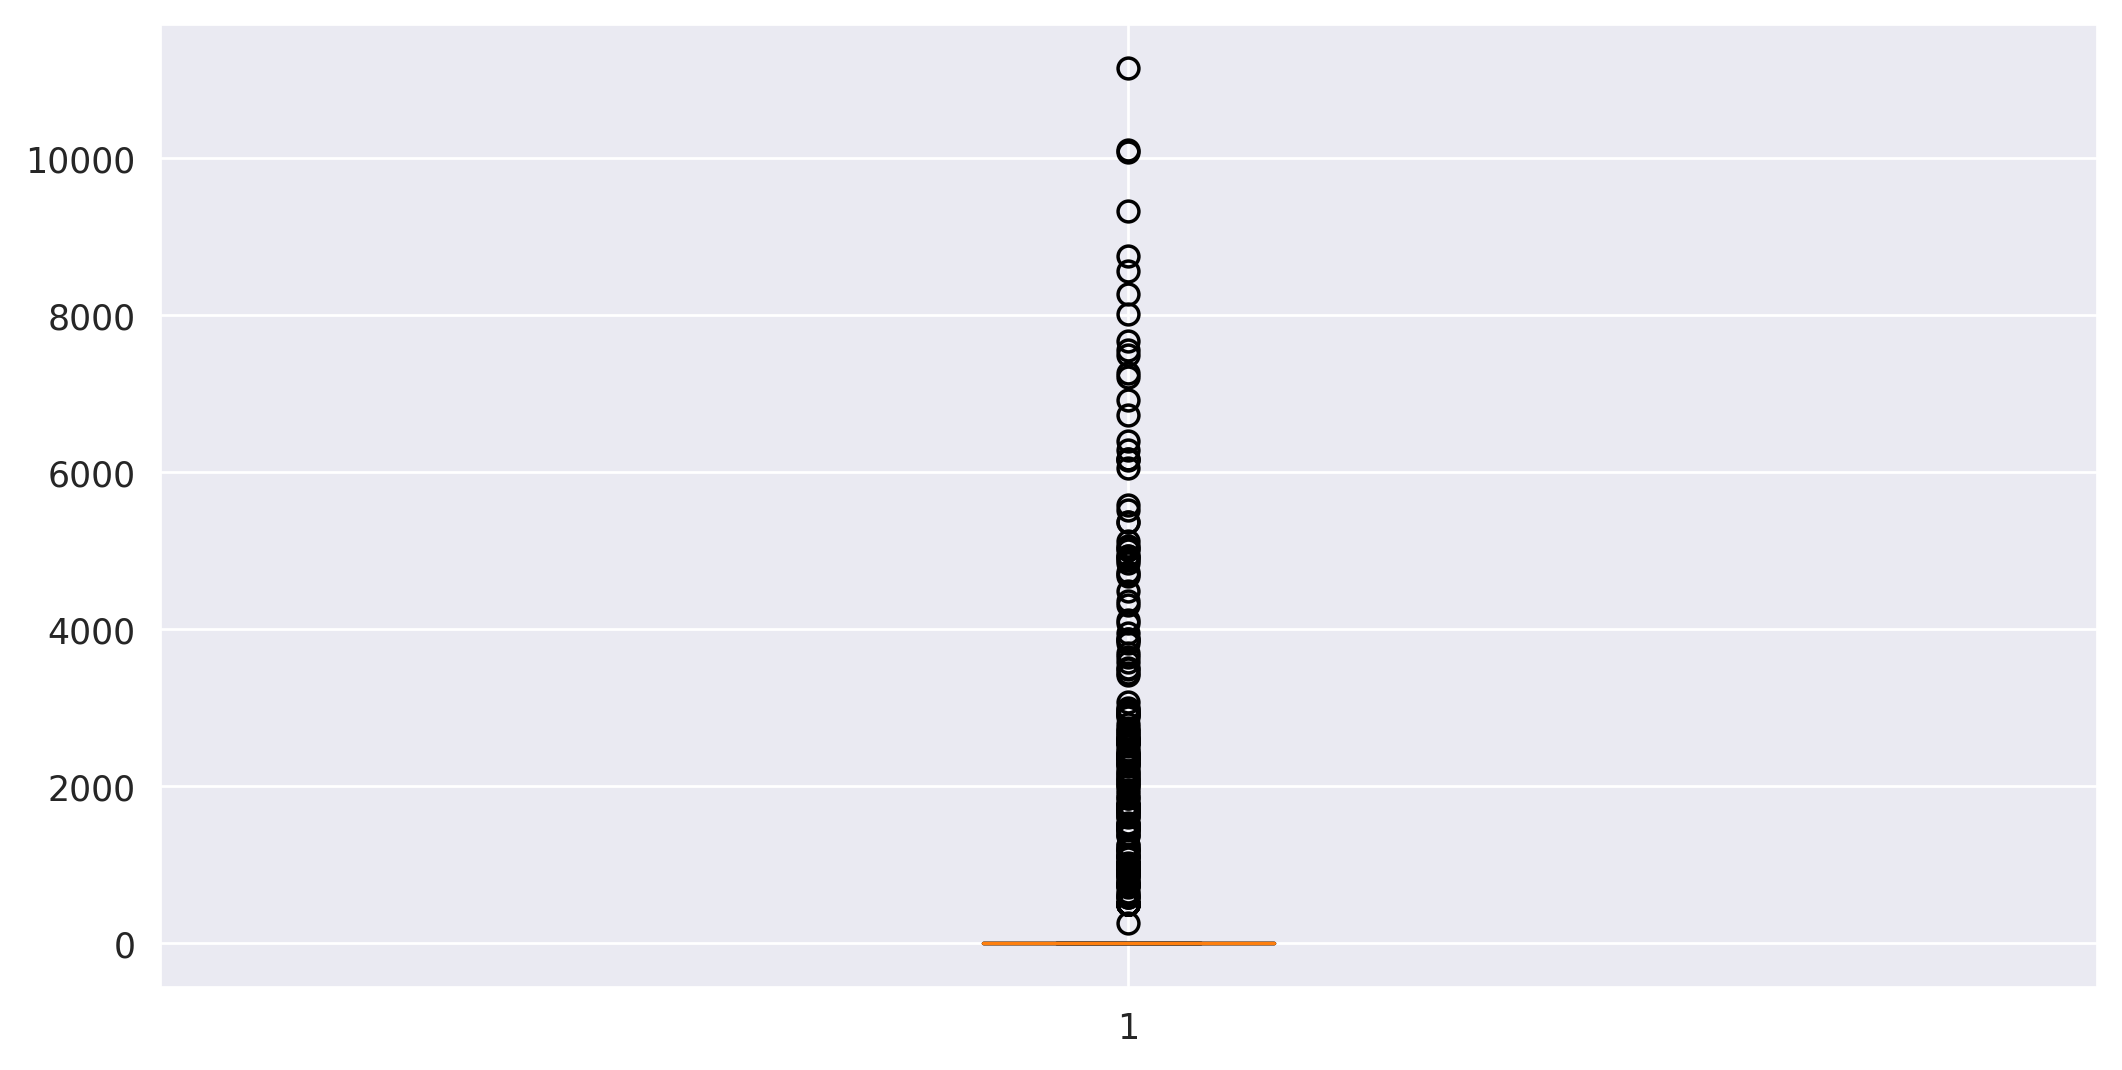

cc1_miles


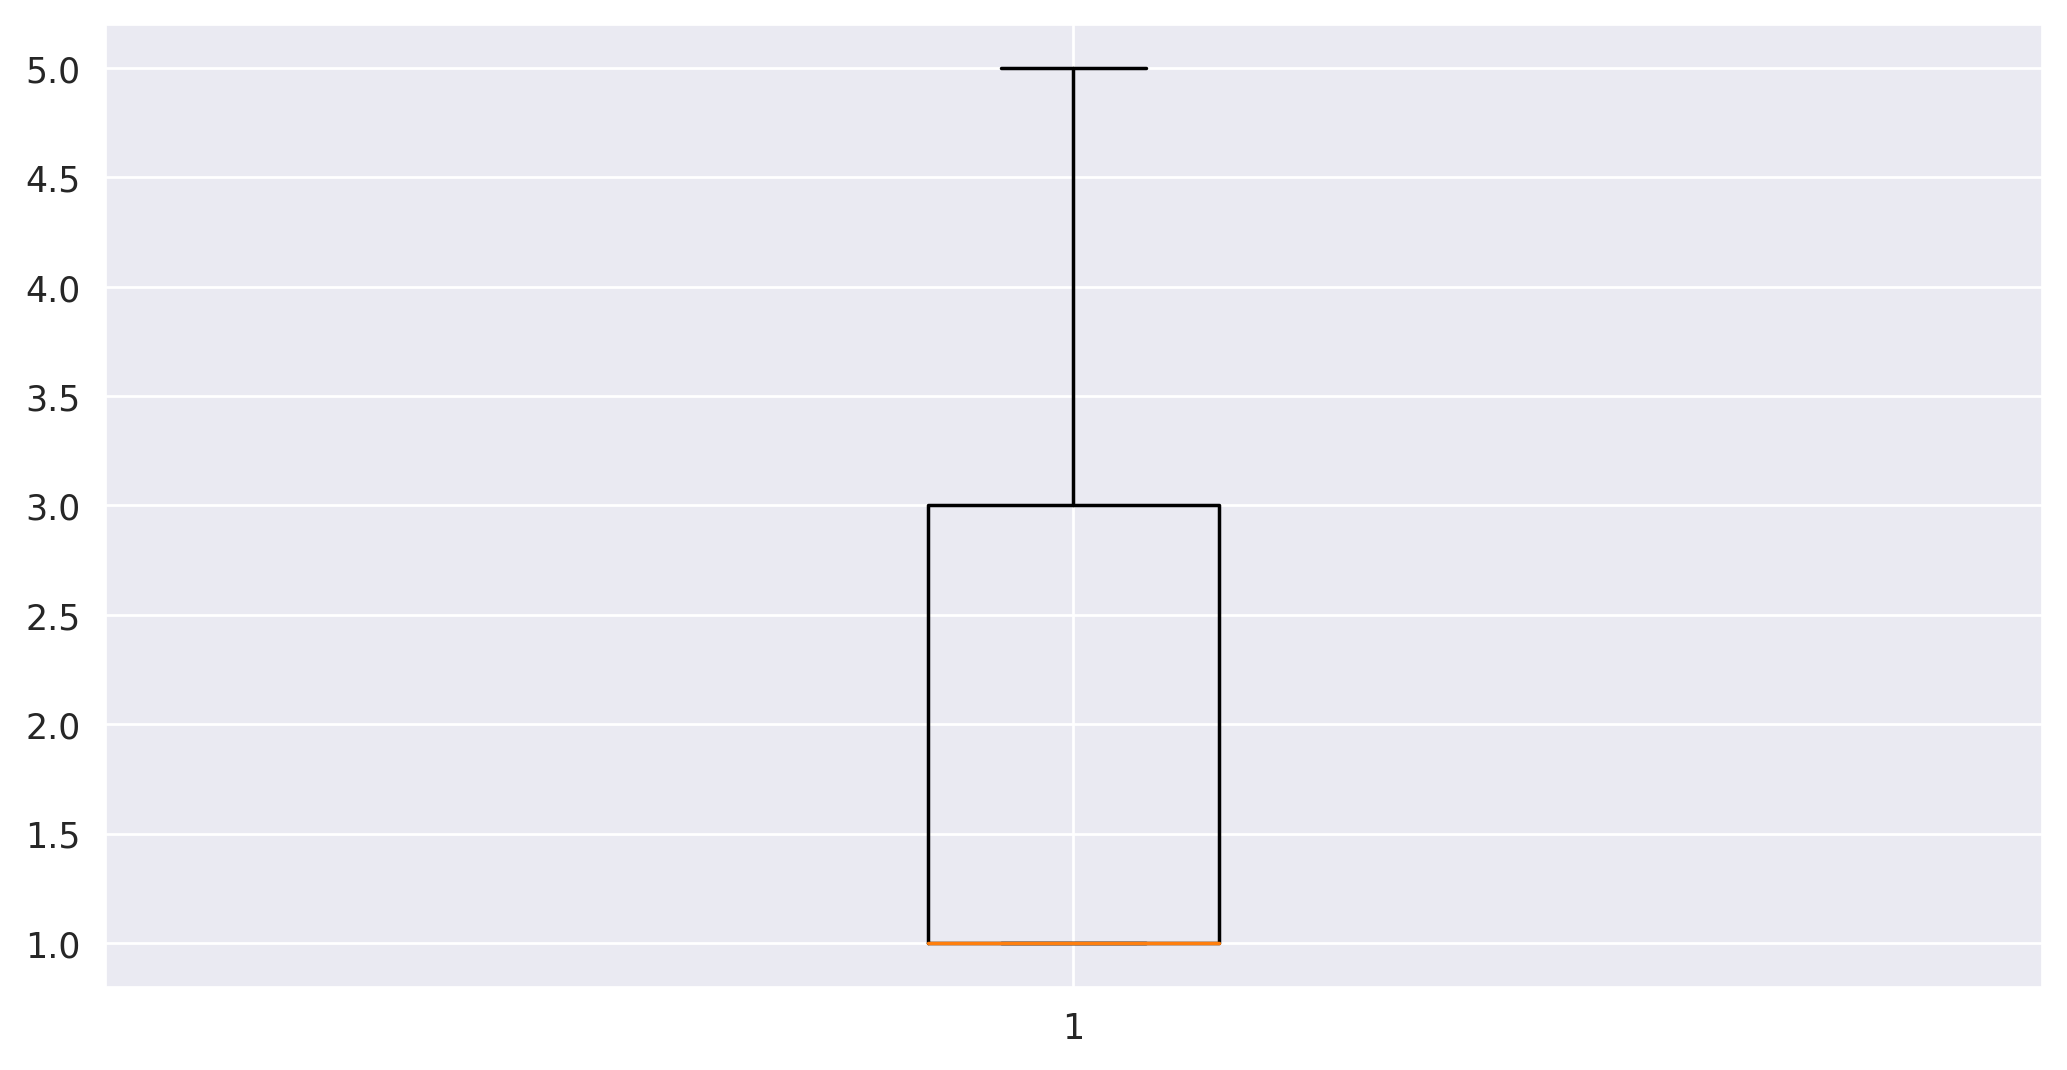

cc2_miles


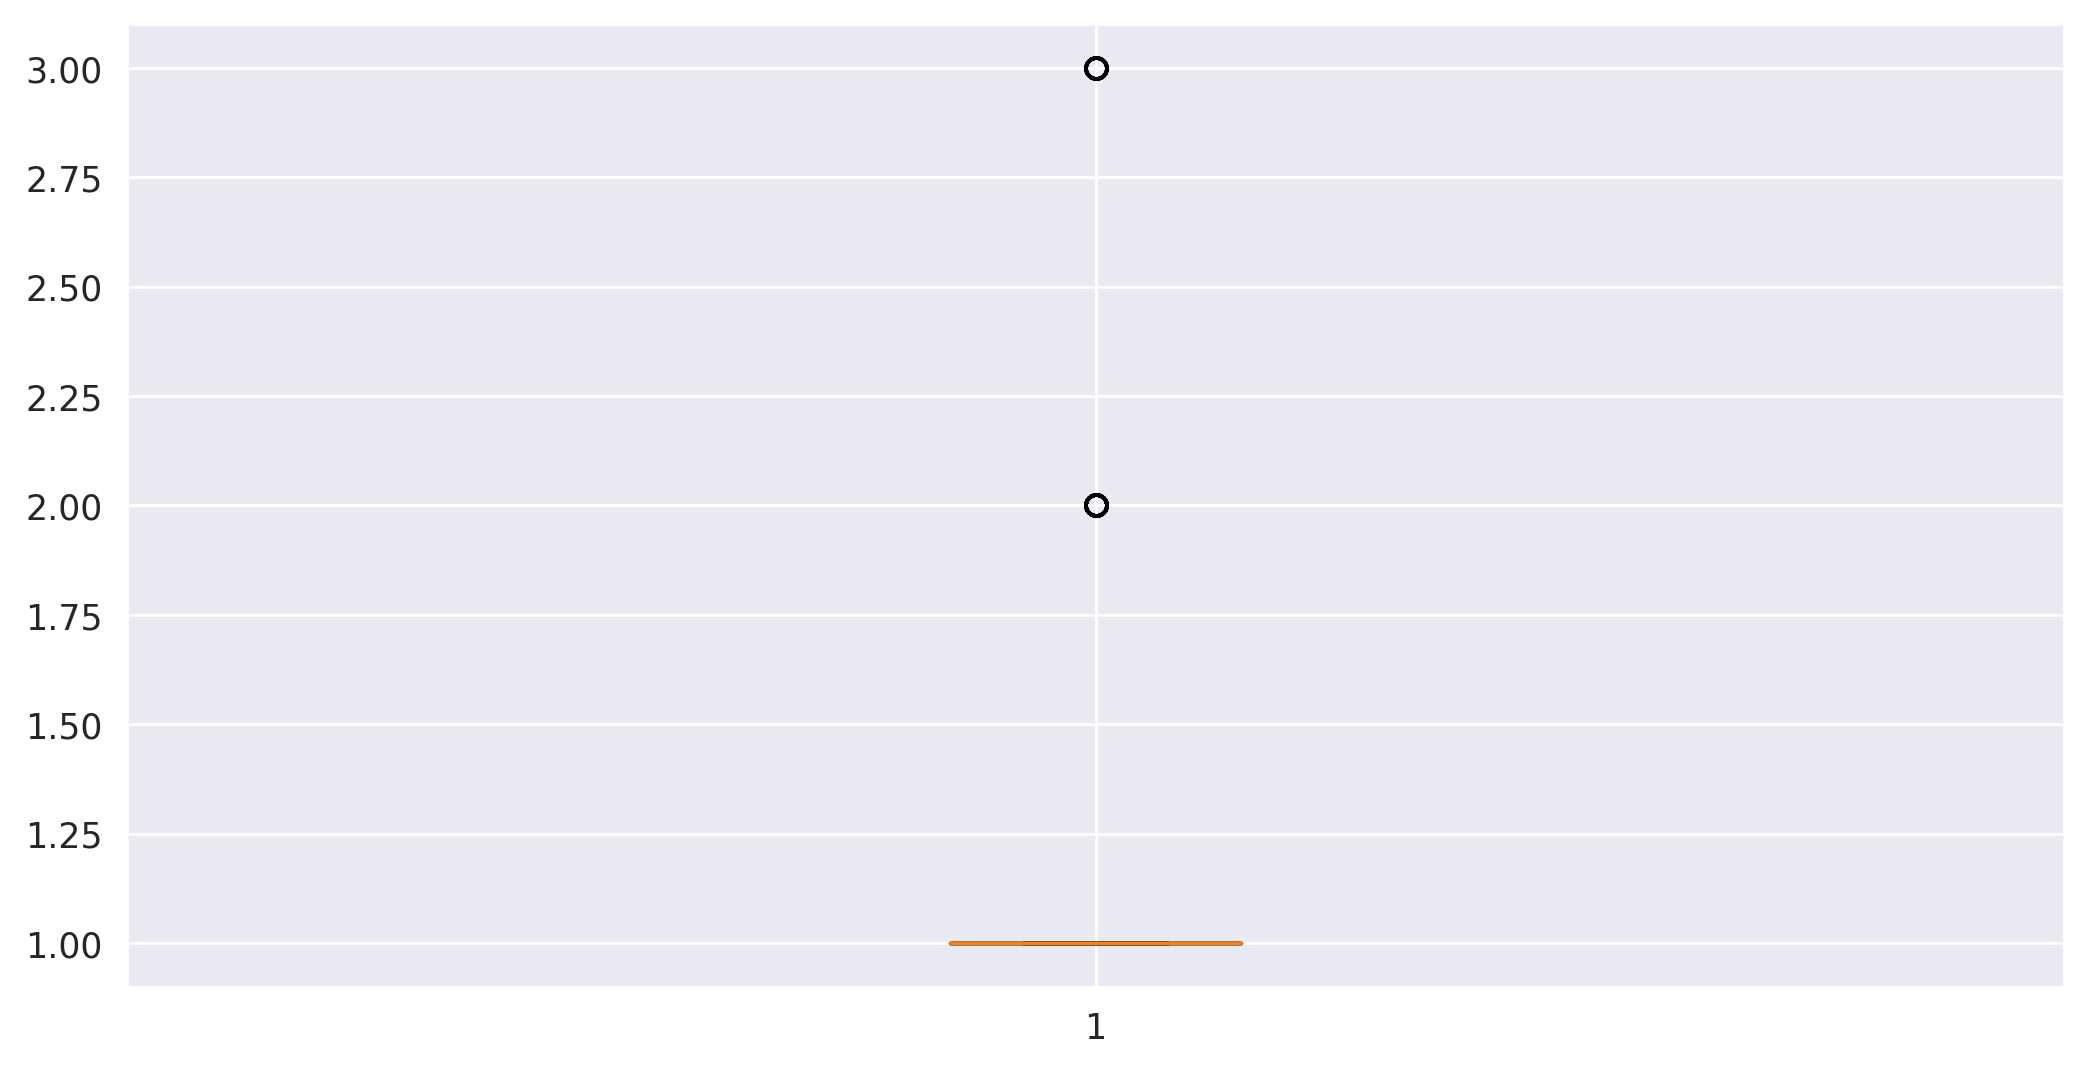

cc3_miles


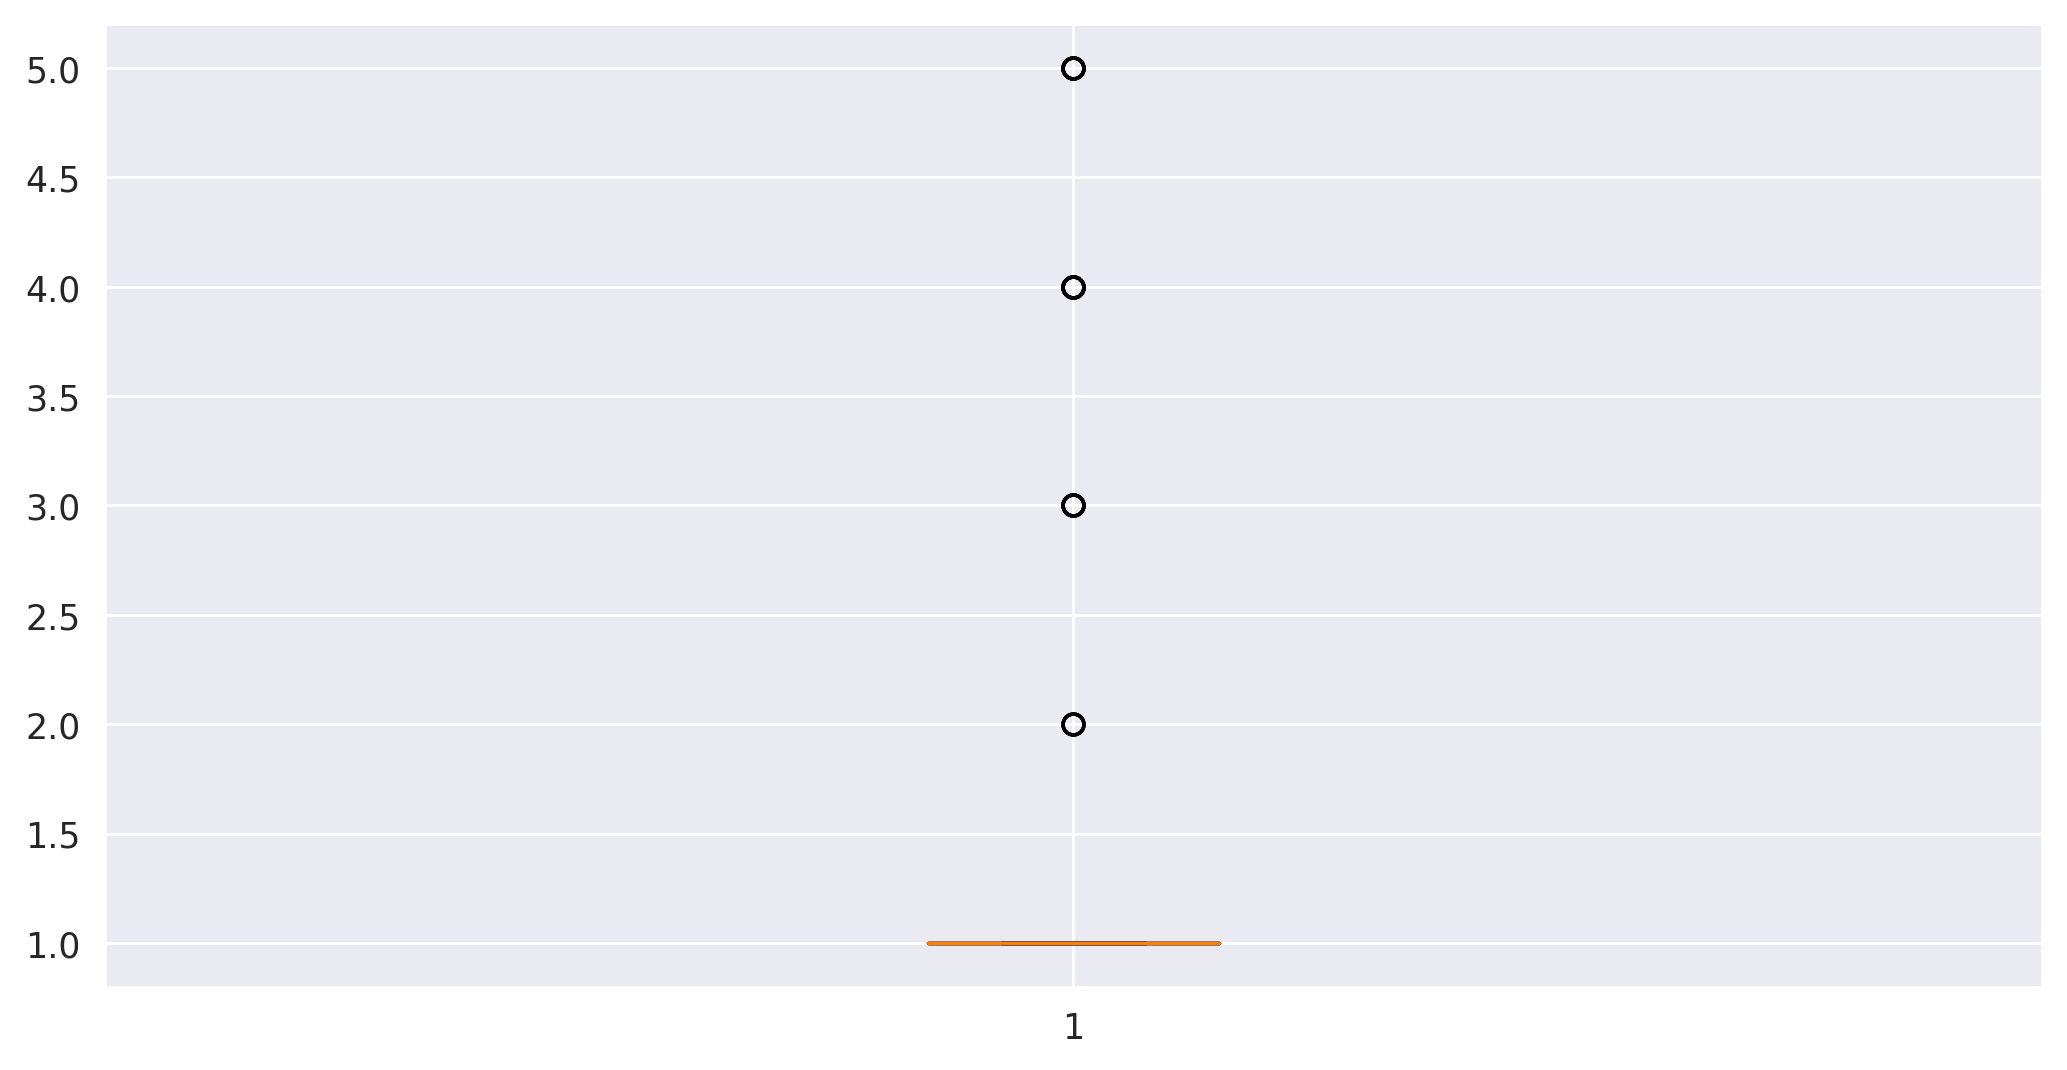

Bonus_miles


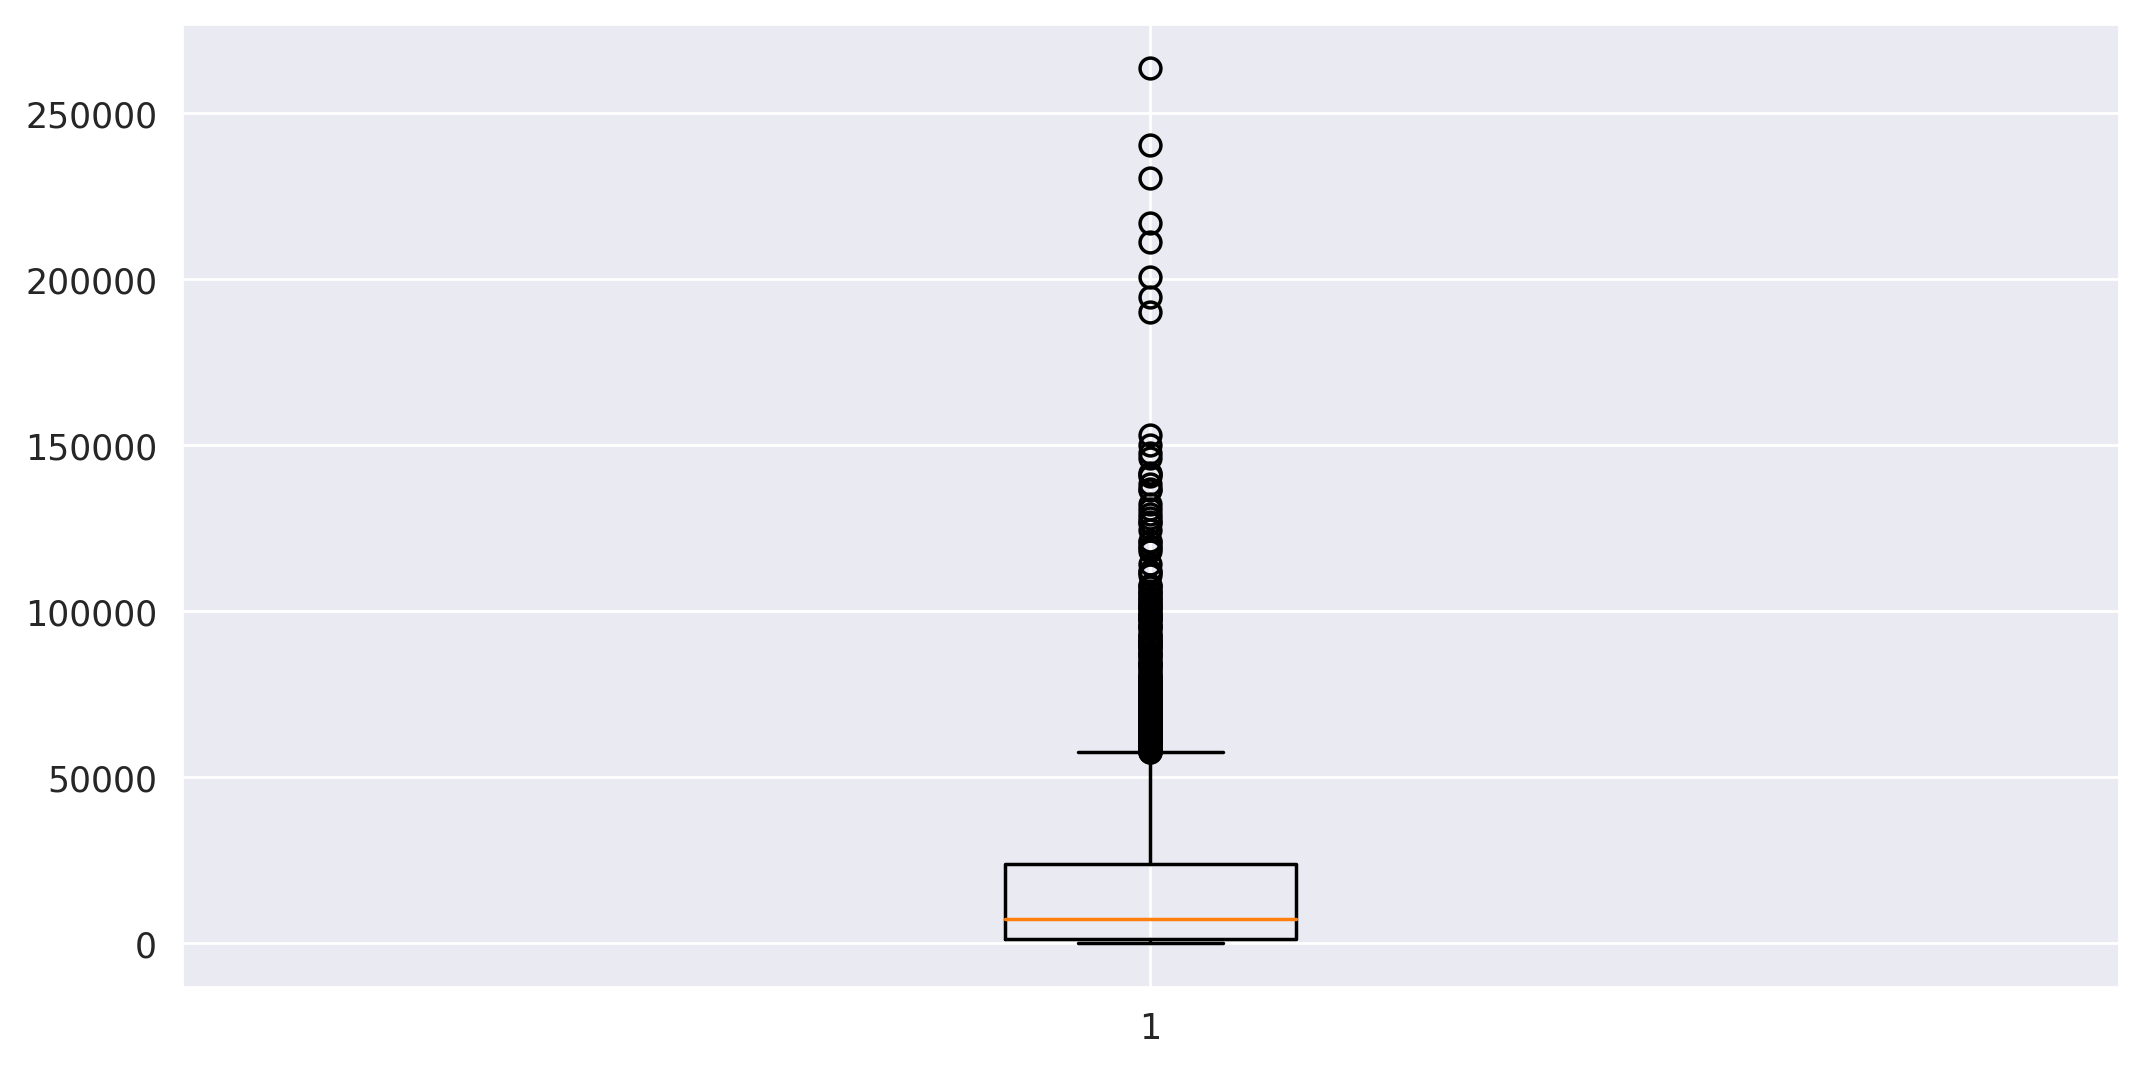

Bonus_trans


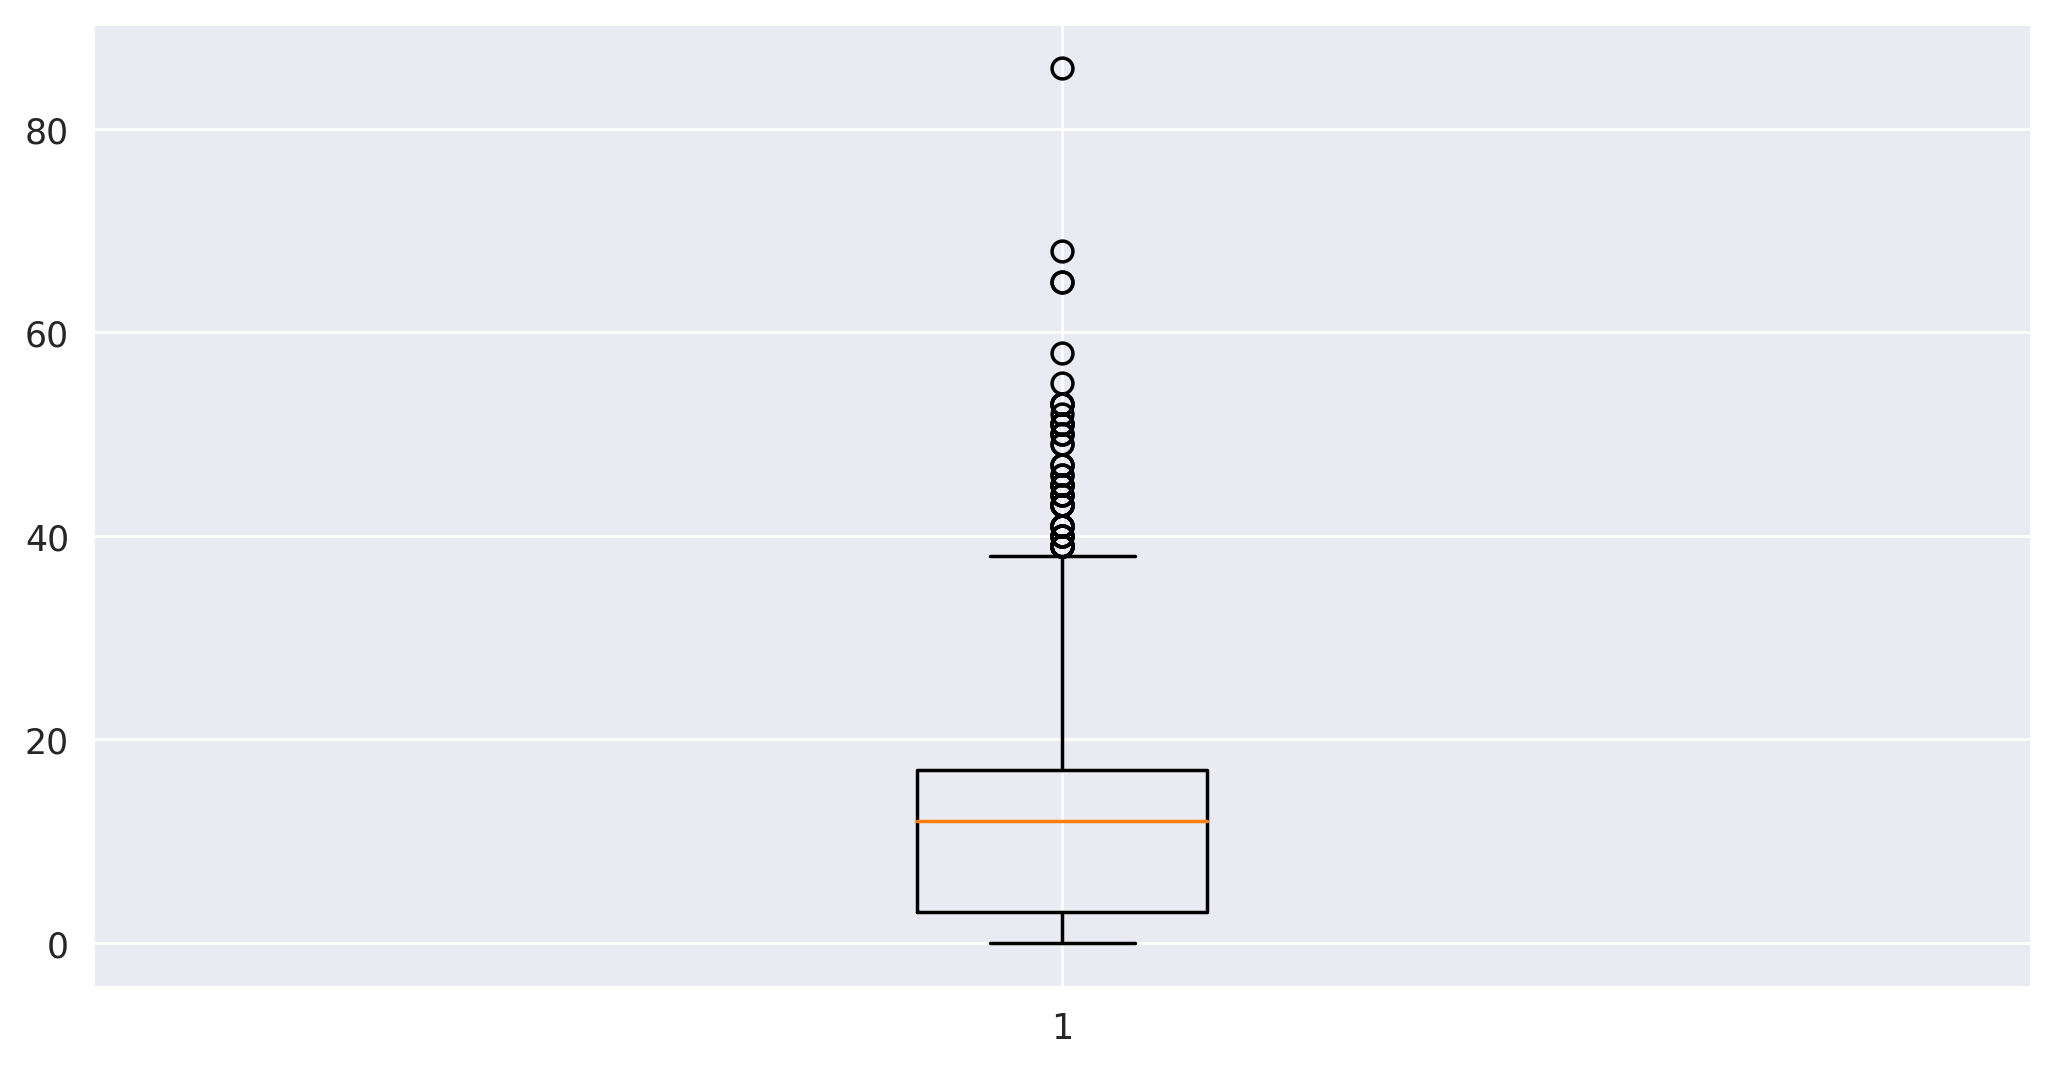

Flight_miles_12mo


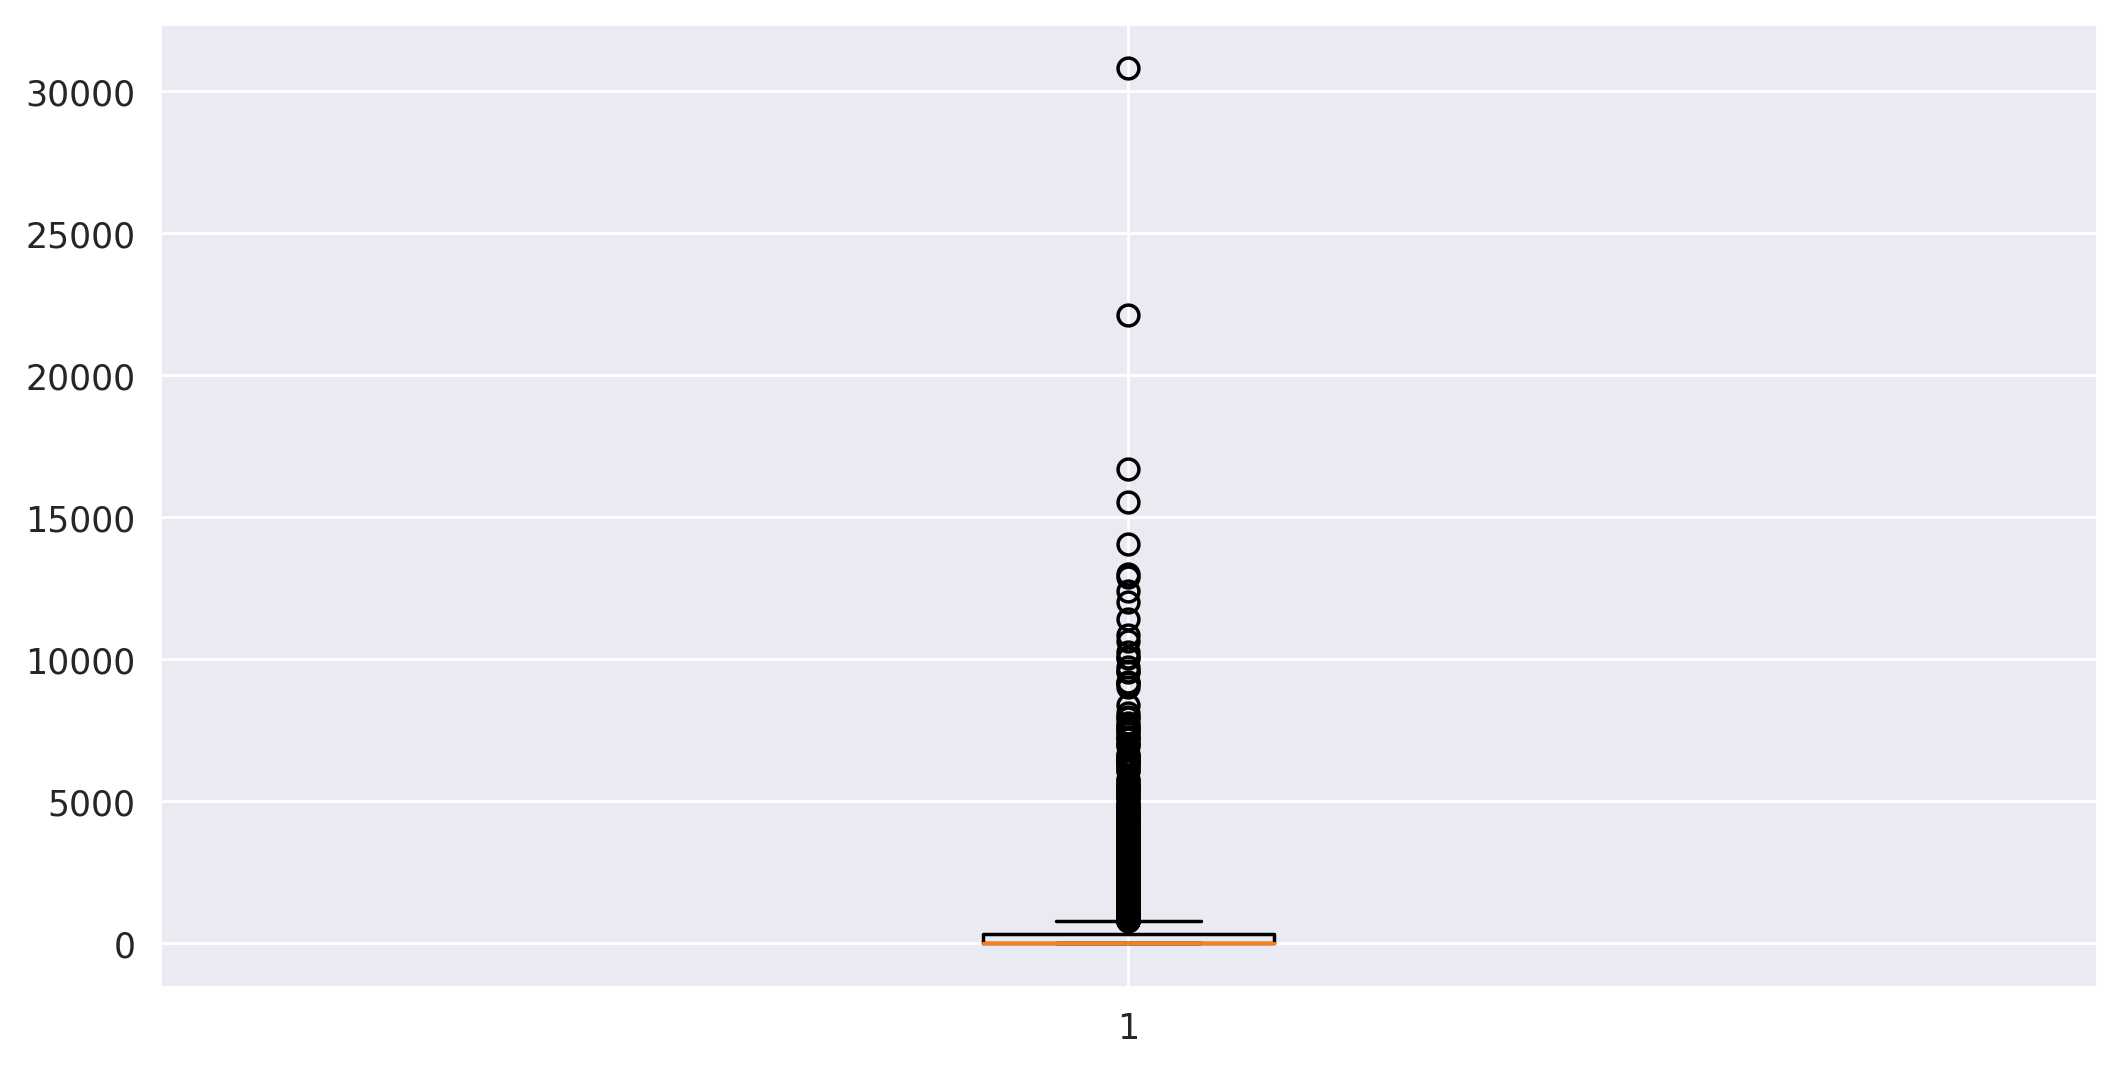

Flight_trans_12


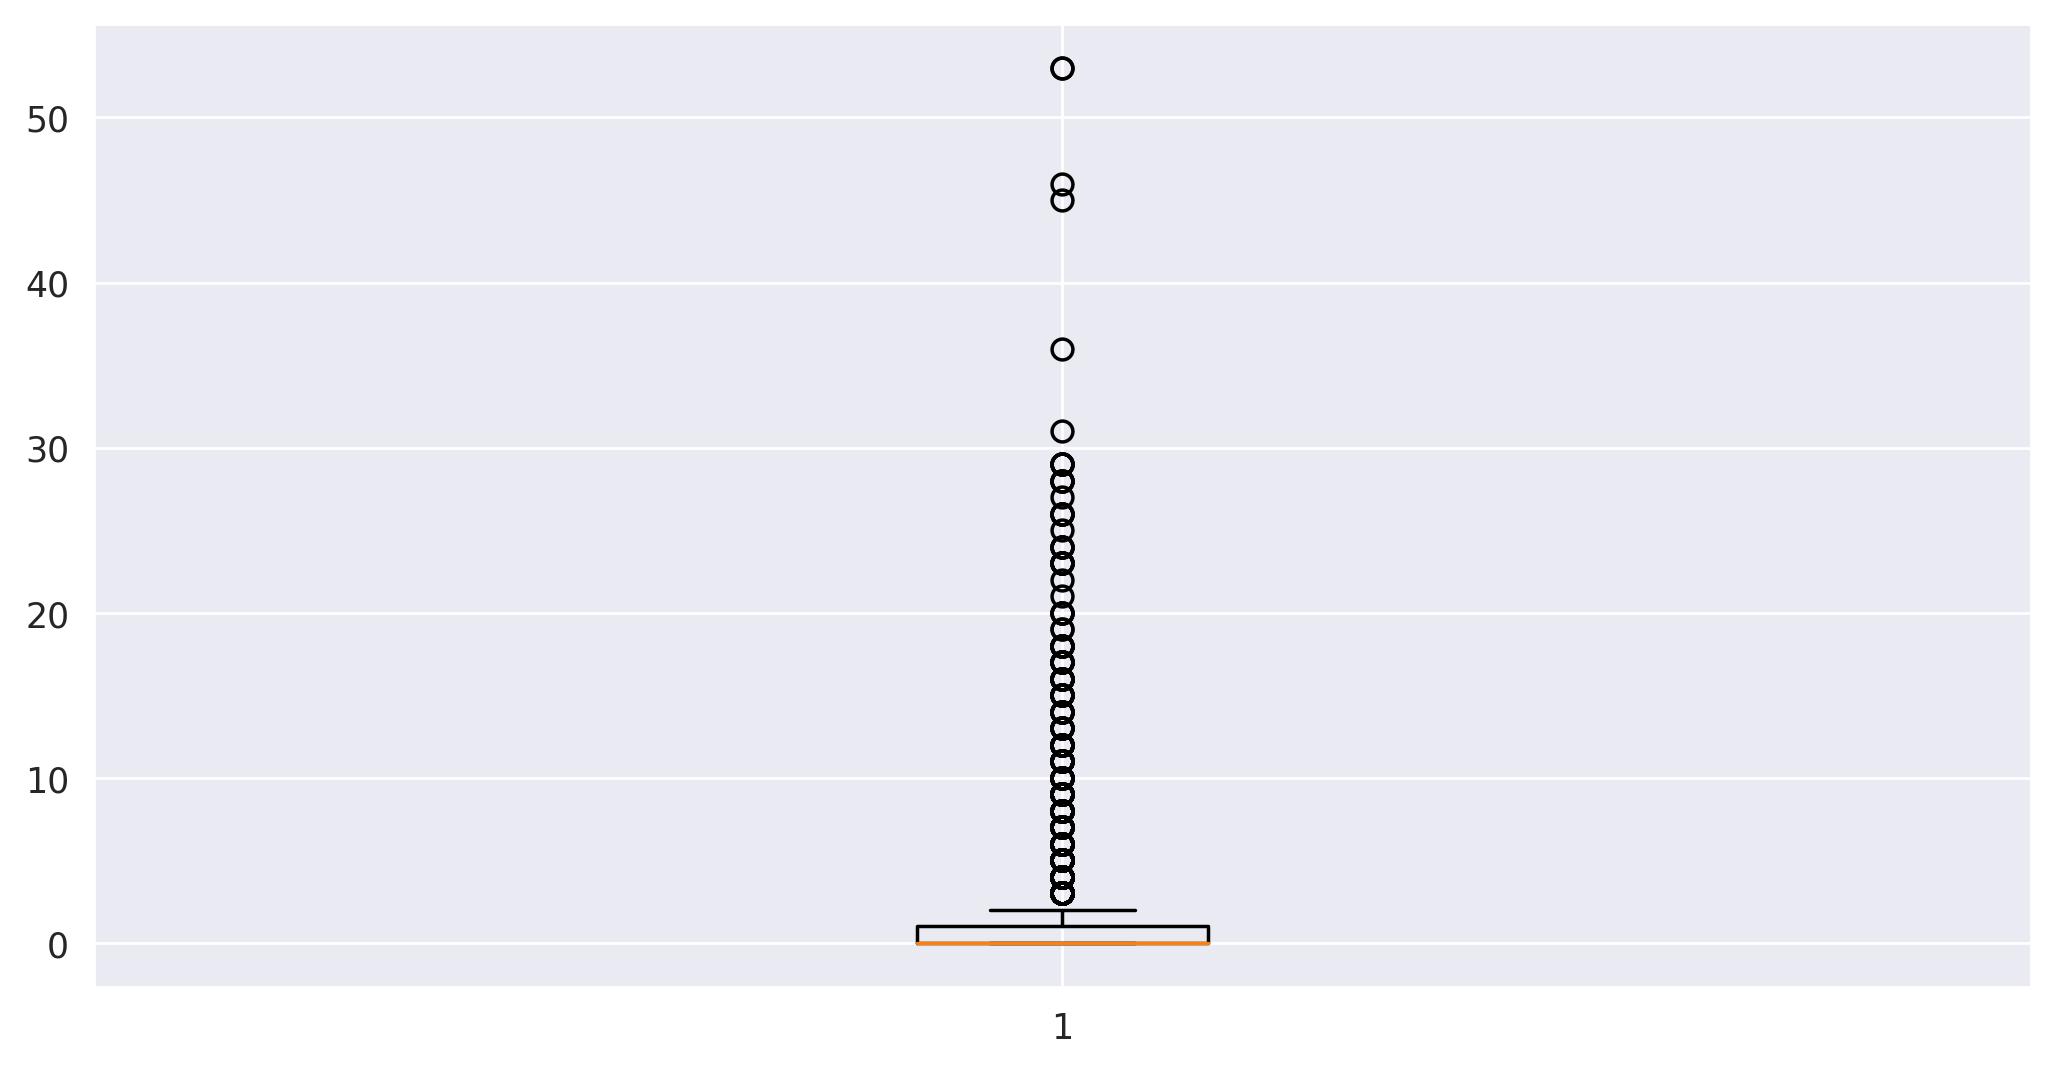

Days_since_enroll


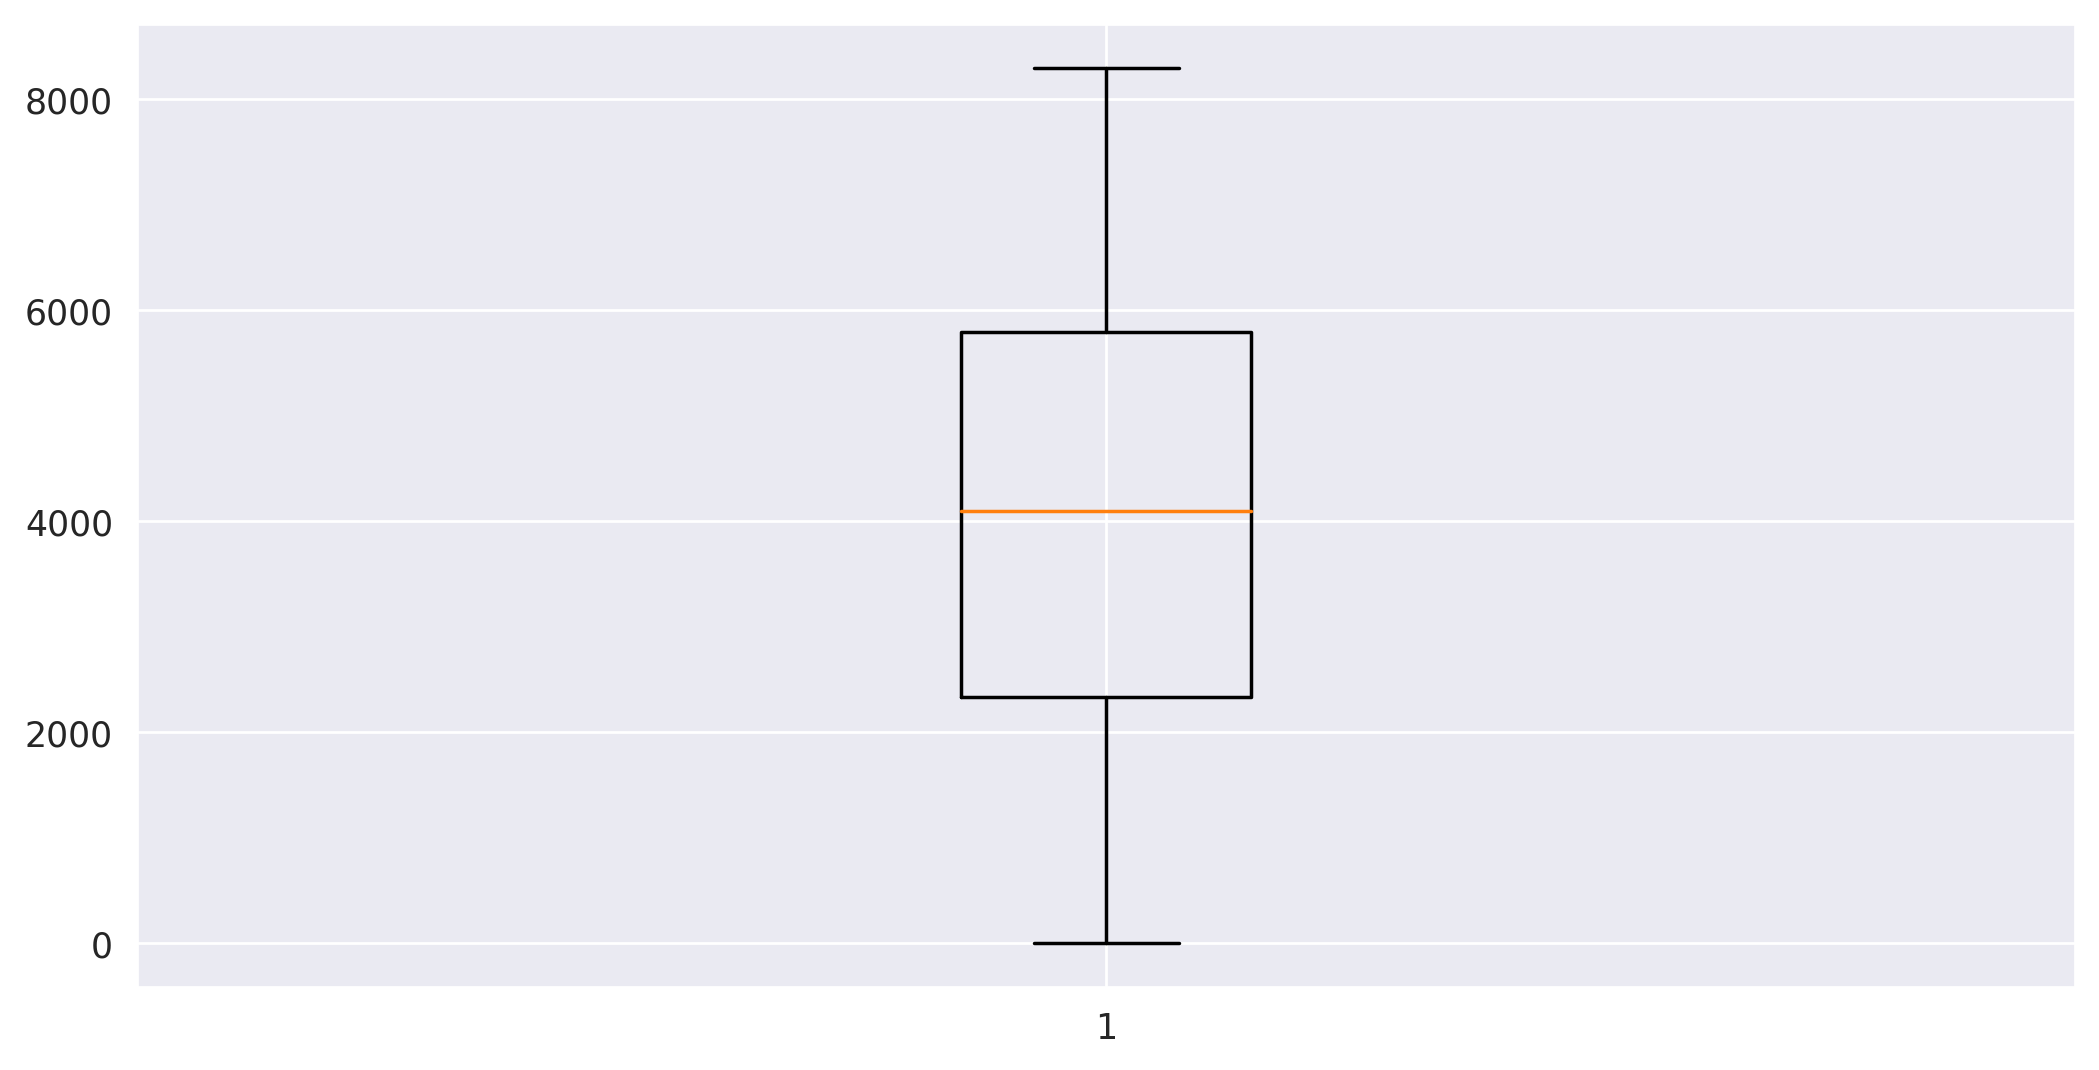

Award?


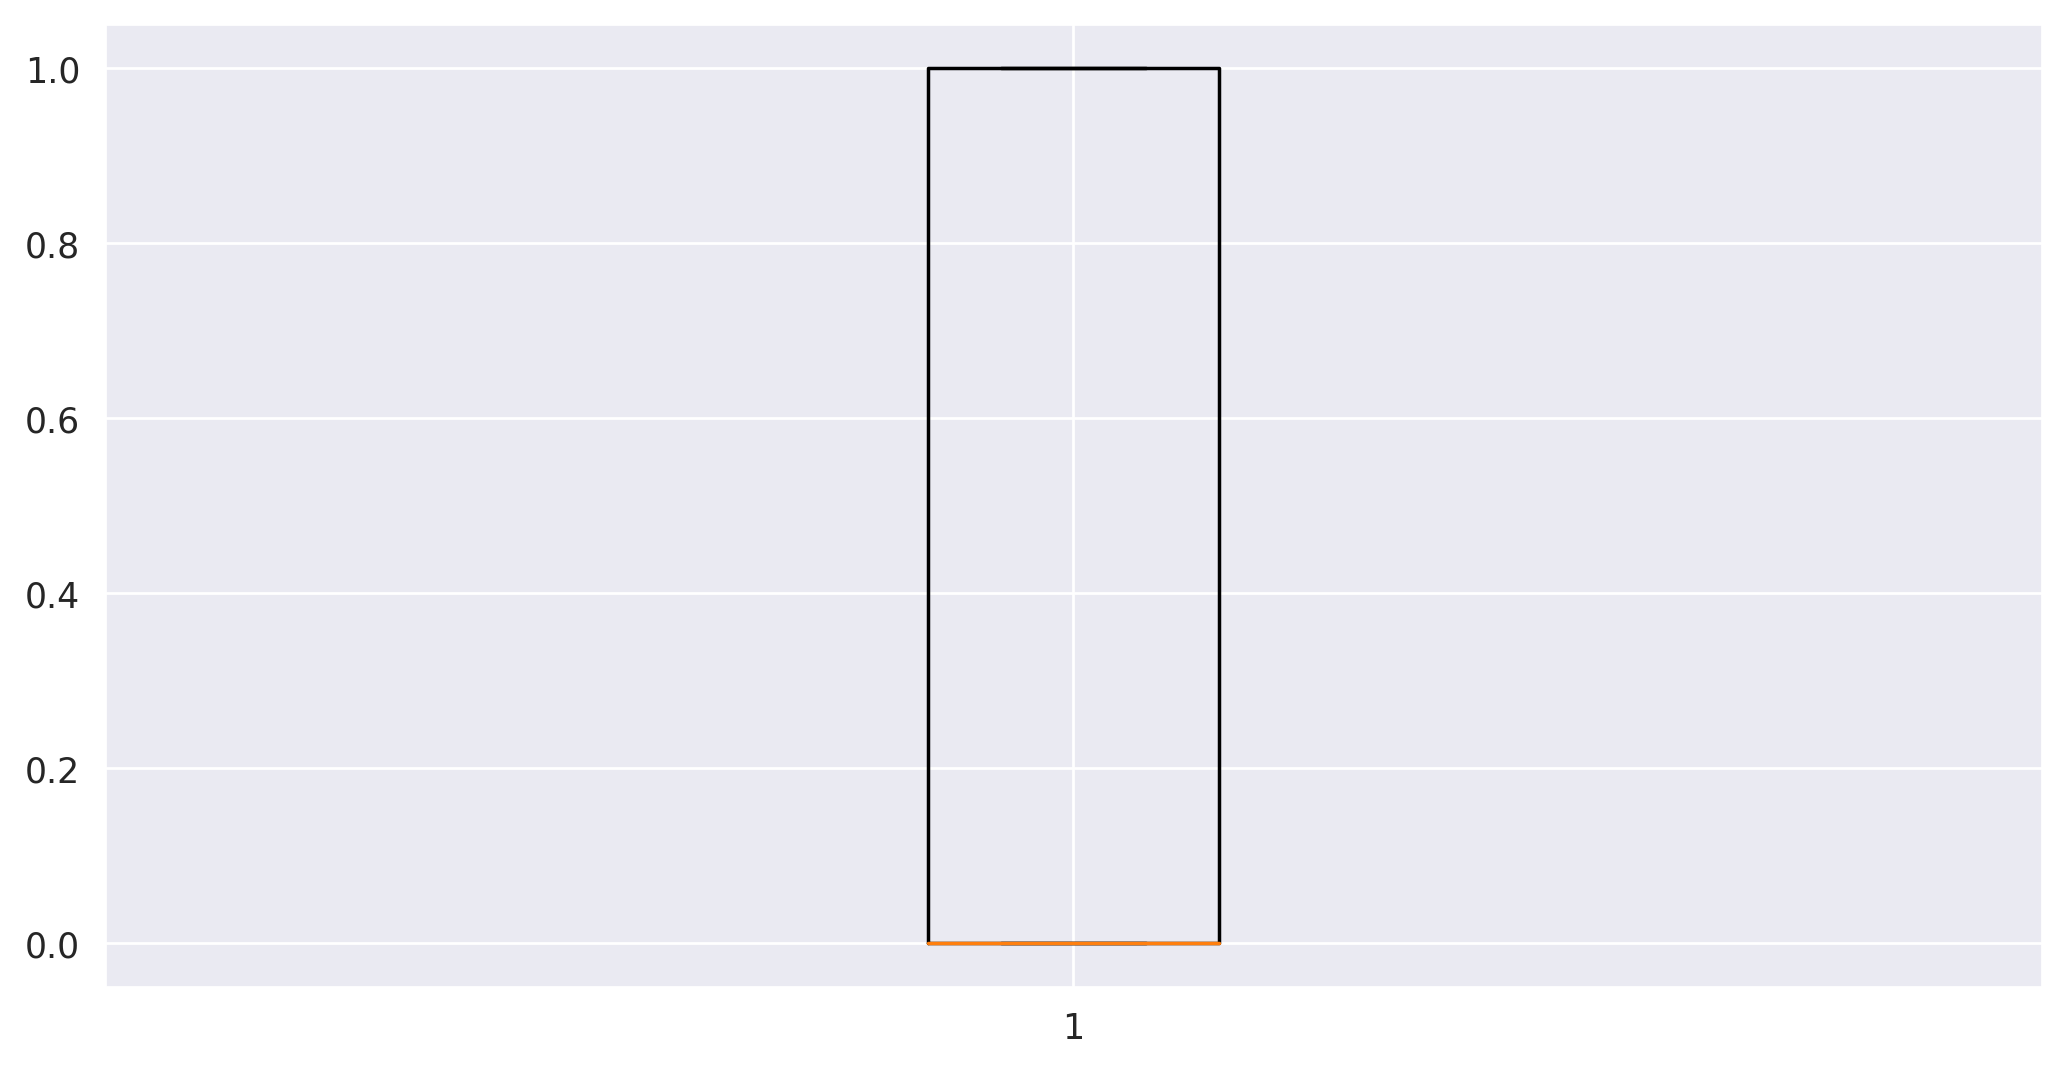

In [6]:
# @title Boxplot
for col in num_cols:
    try:
        print(col)
        plt.boxplot(data[col])
        plt.show()
    except:
        pass

* By looking at Boxplot it is clear that Balance, Qual_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12 columns contains Outliers

In [7]:
# @title Capping

# Outliers are present in the following columns
outliers_columns = ['Balance','Qual_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12']

# outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE

# Dictionary for lower and upper extreme
LU_Extremes = {}
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(data, col)
LU_Extremes

# Outliers Capping
for col in LU_Extremes:
    data.loc[data[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
    data.loc[data[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]

ID#


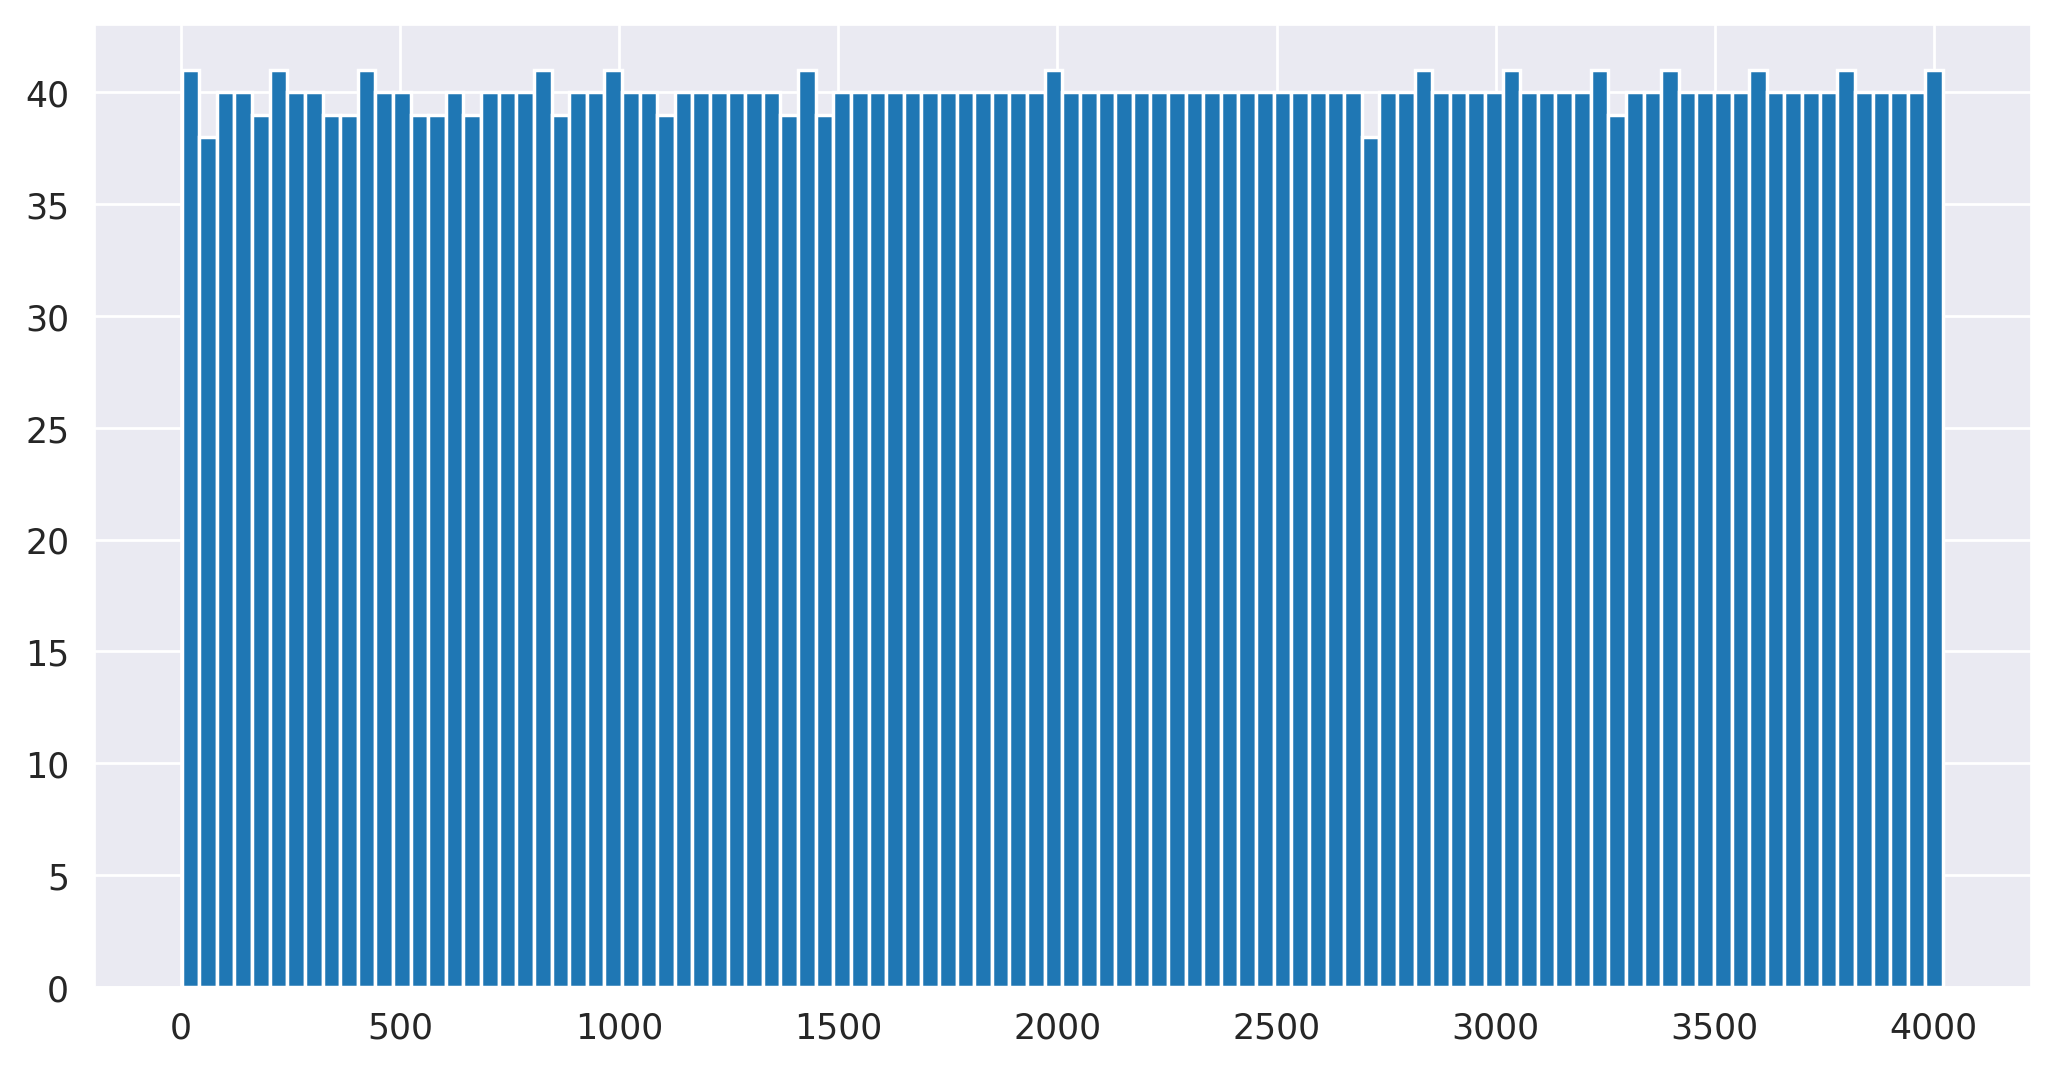

Balance


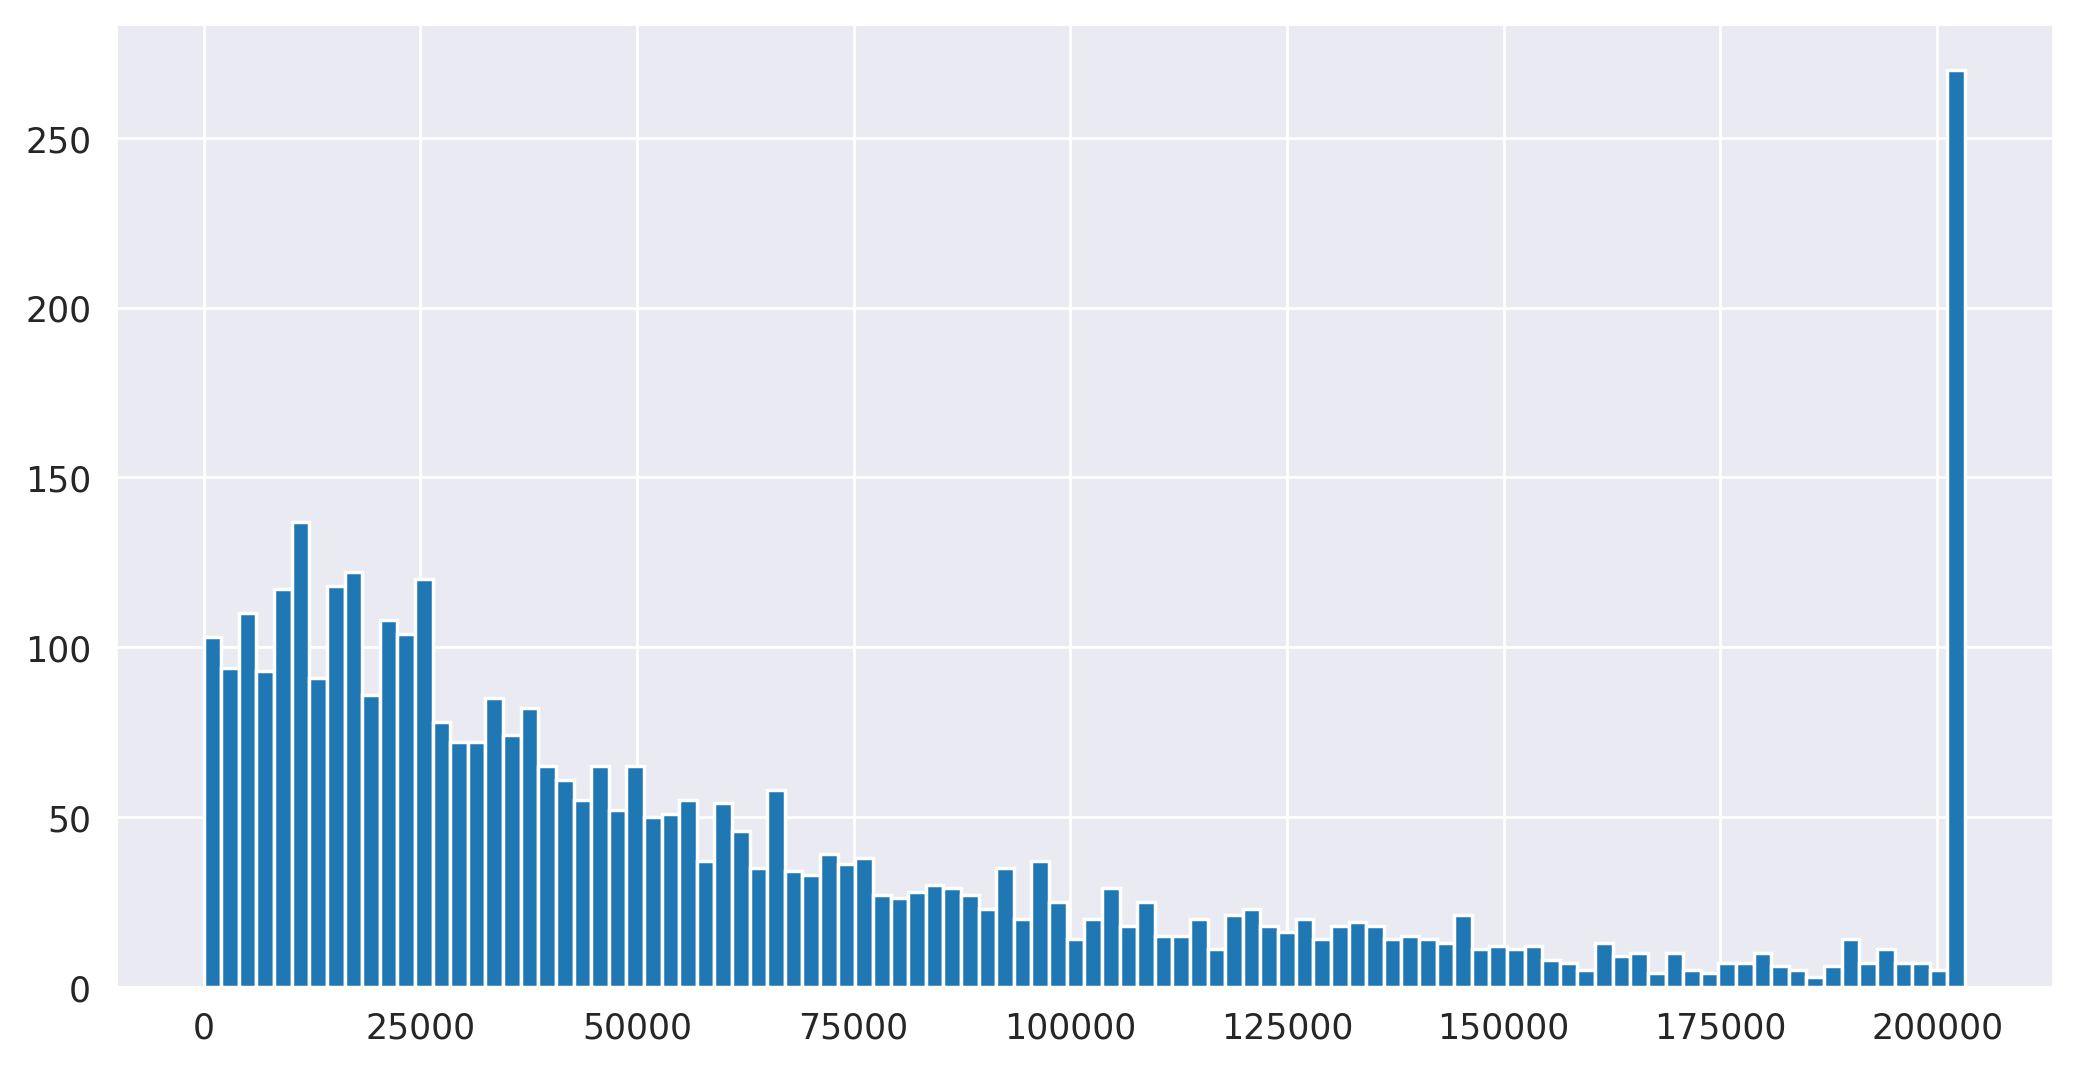

Qual_miles


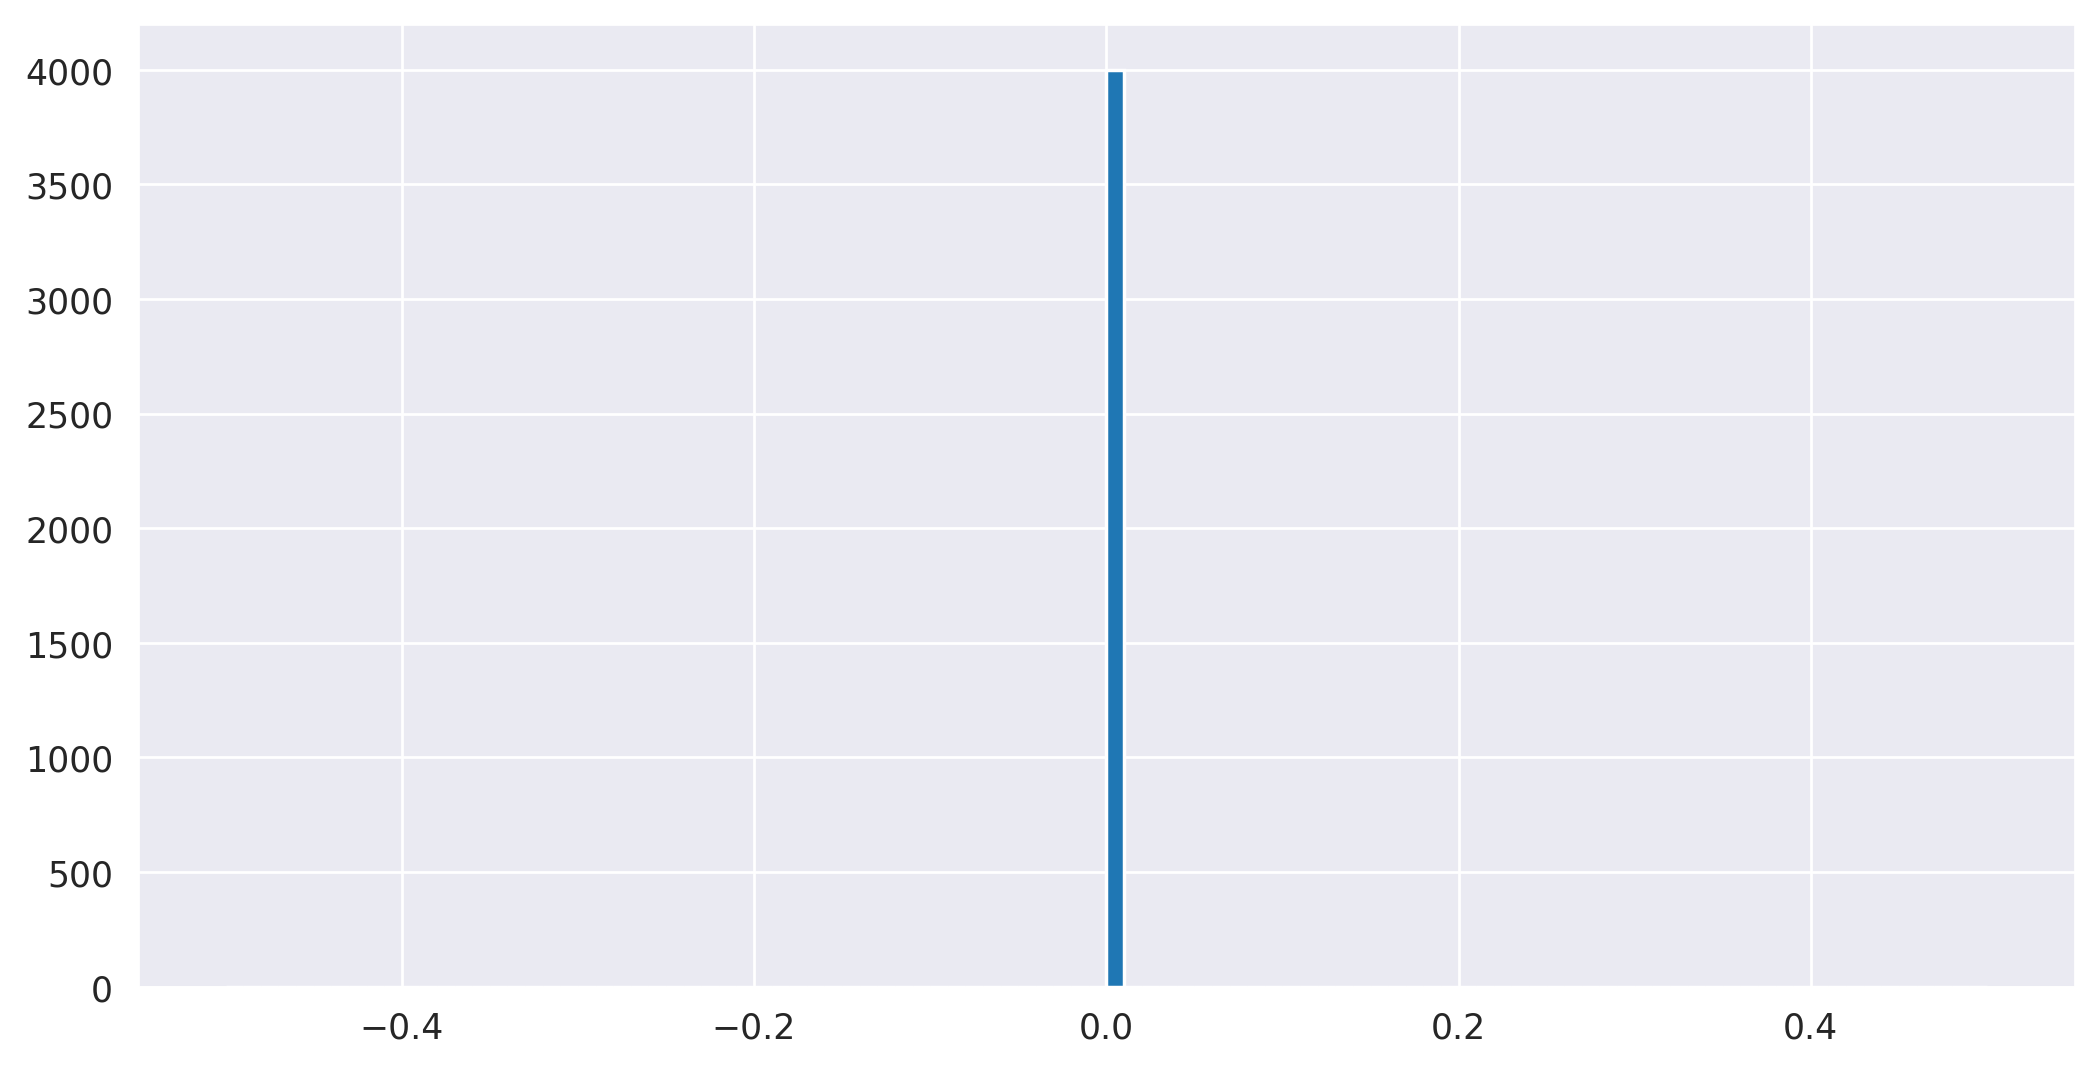

cc1_miles


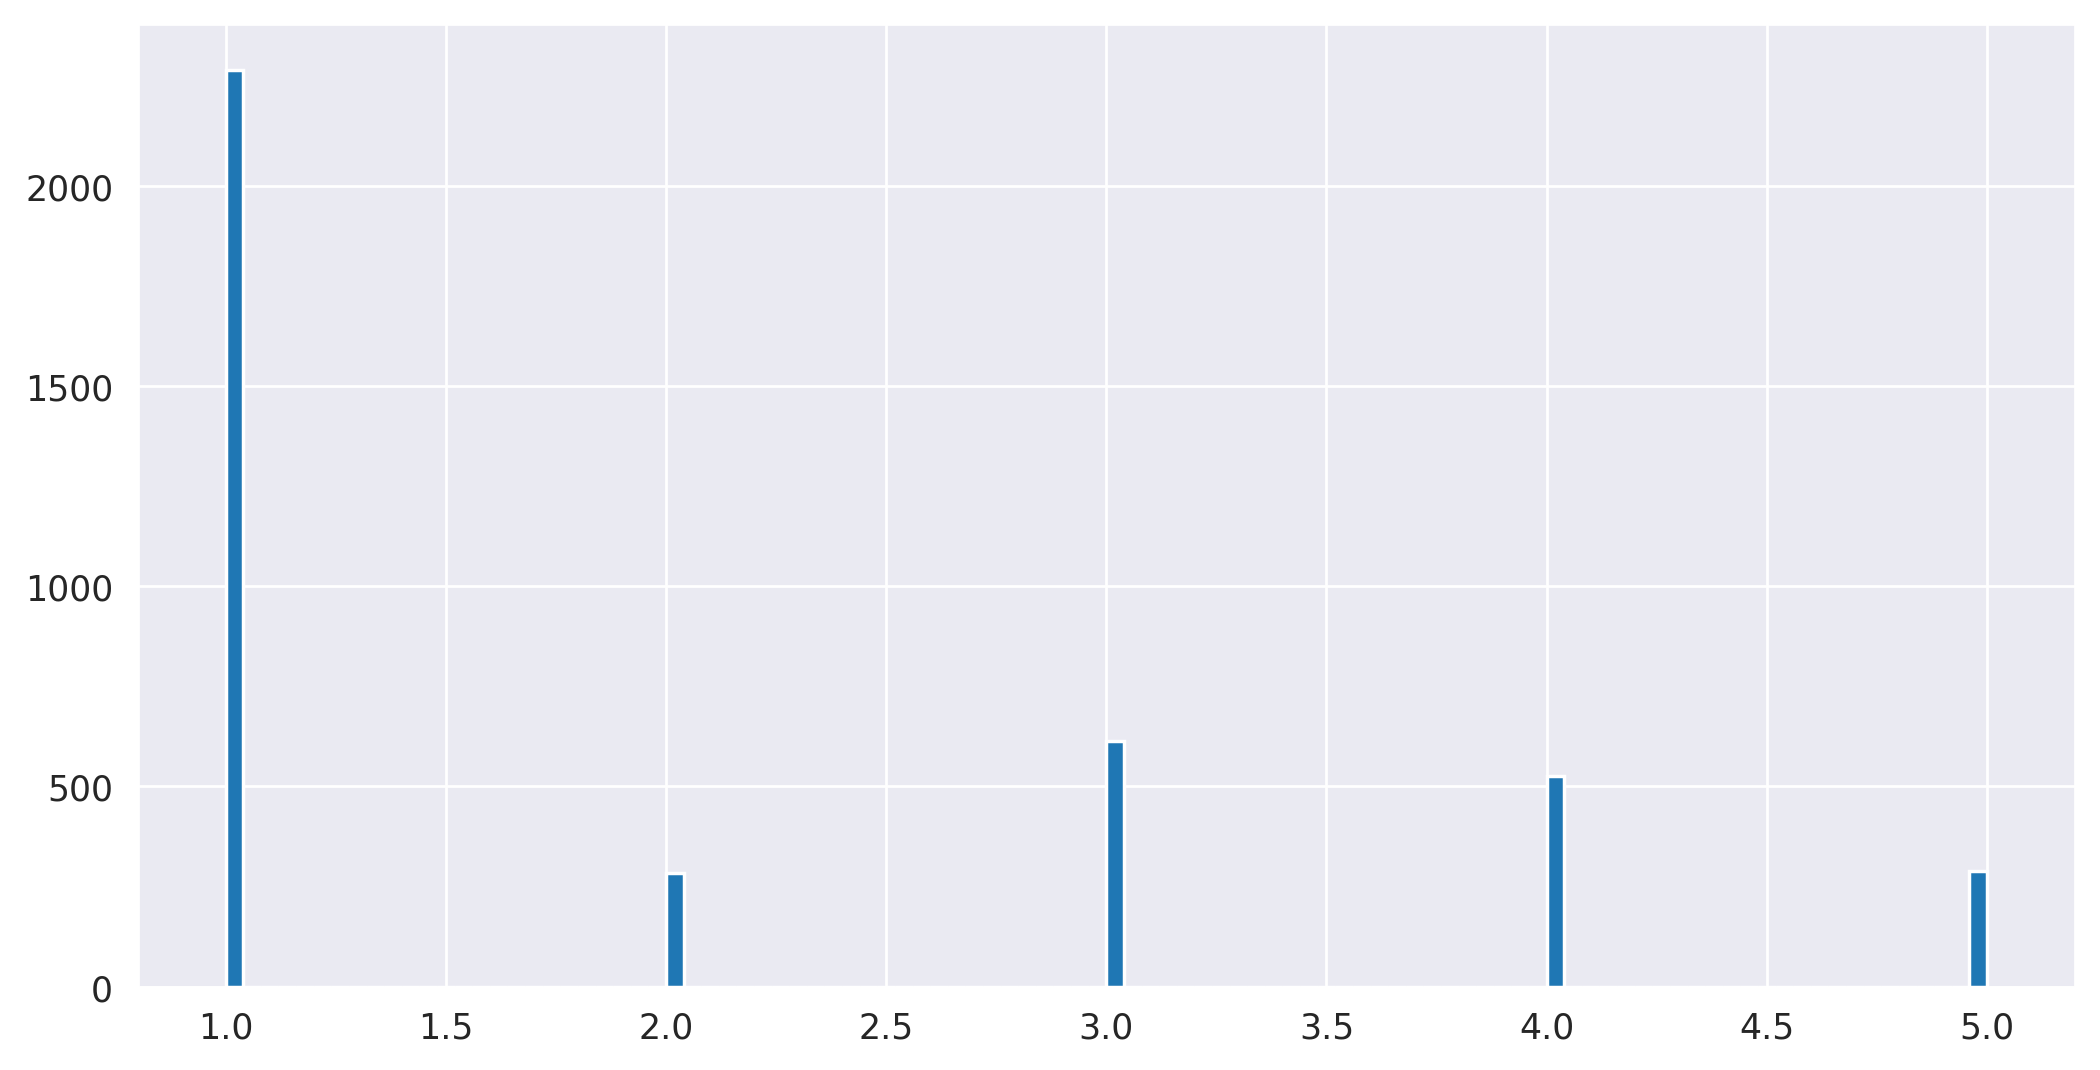

cc2_miles


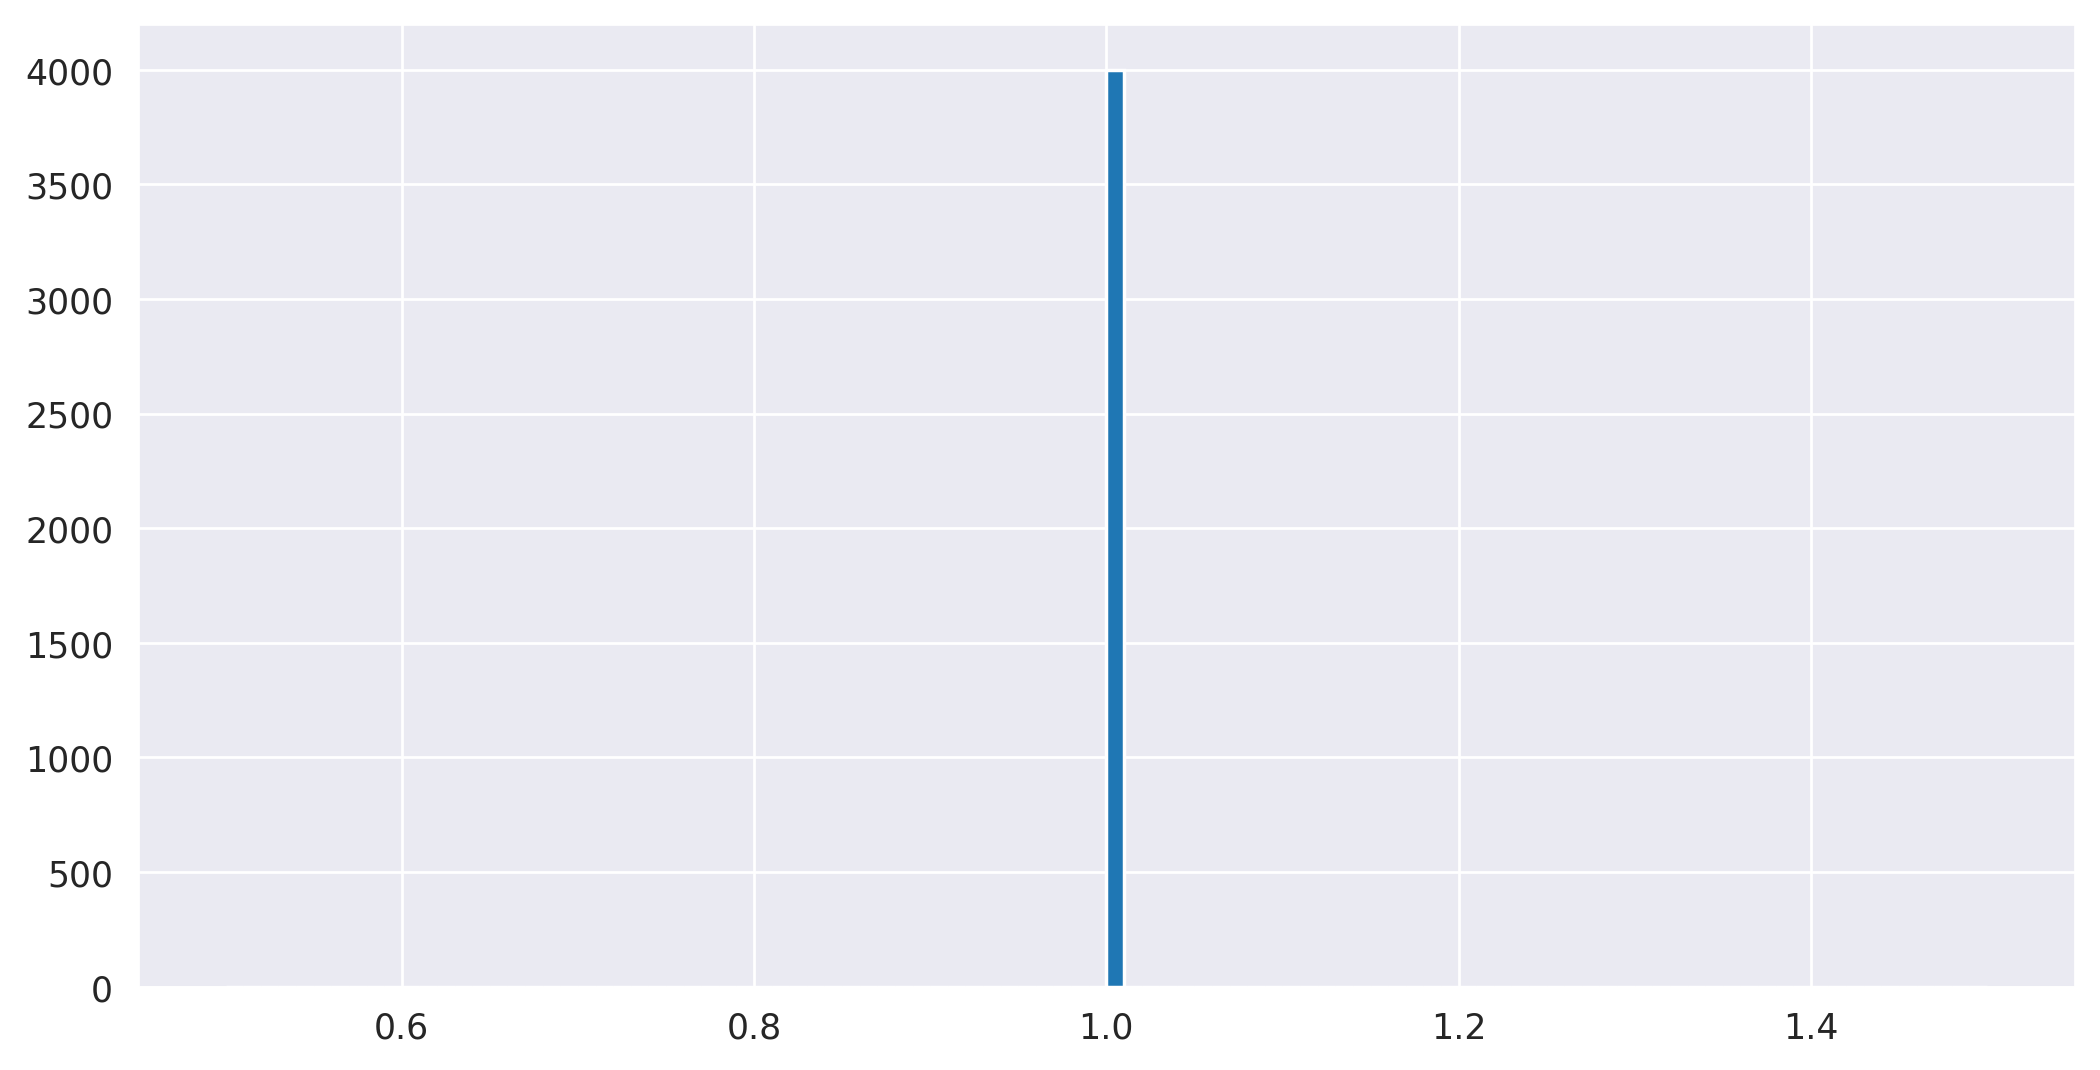

cc3_miles


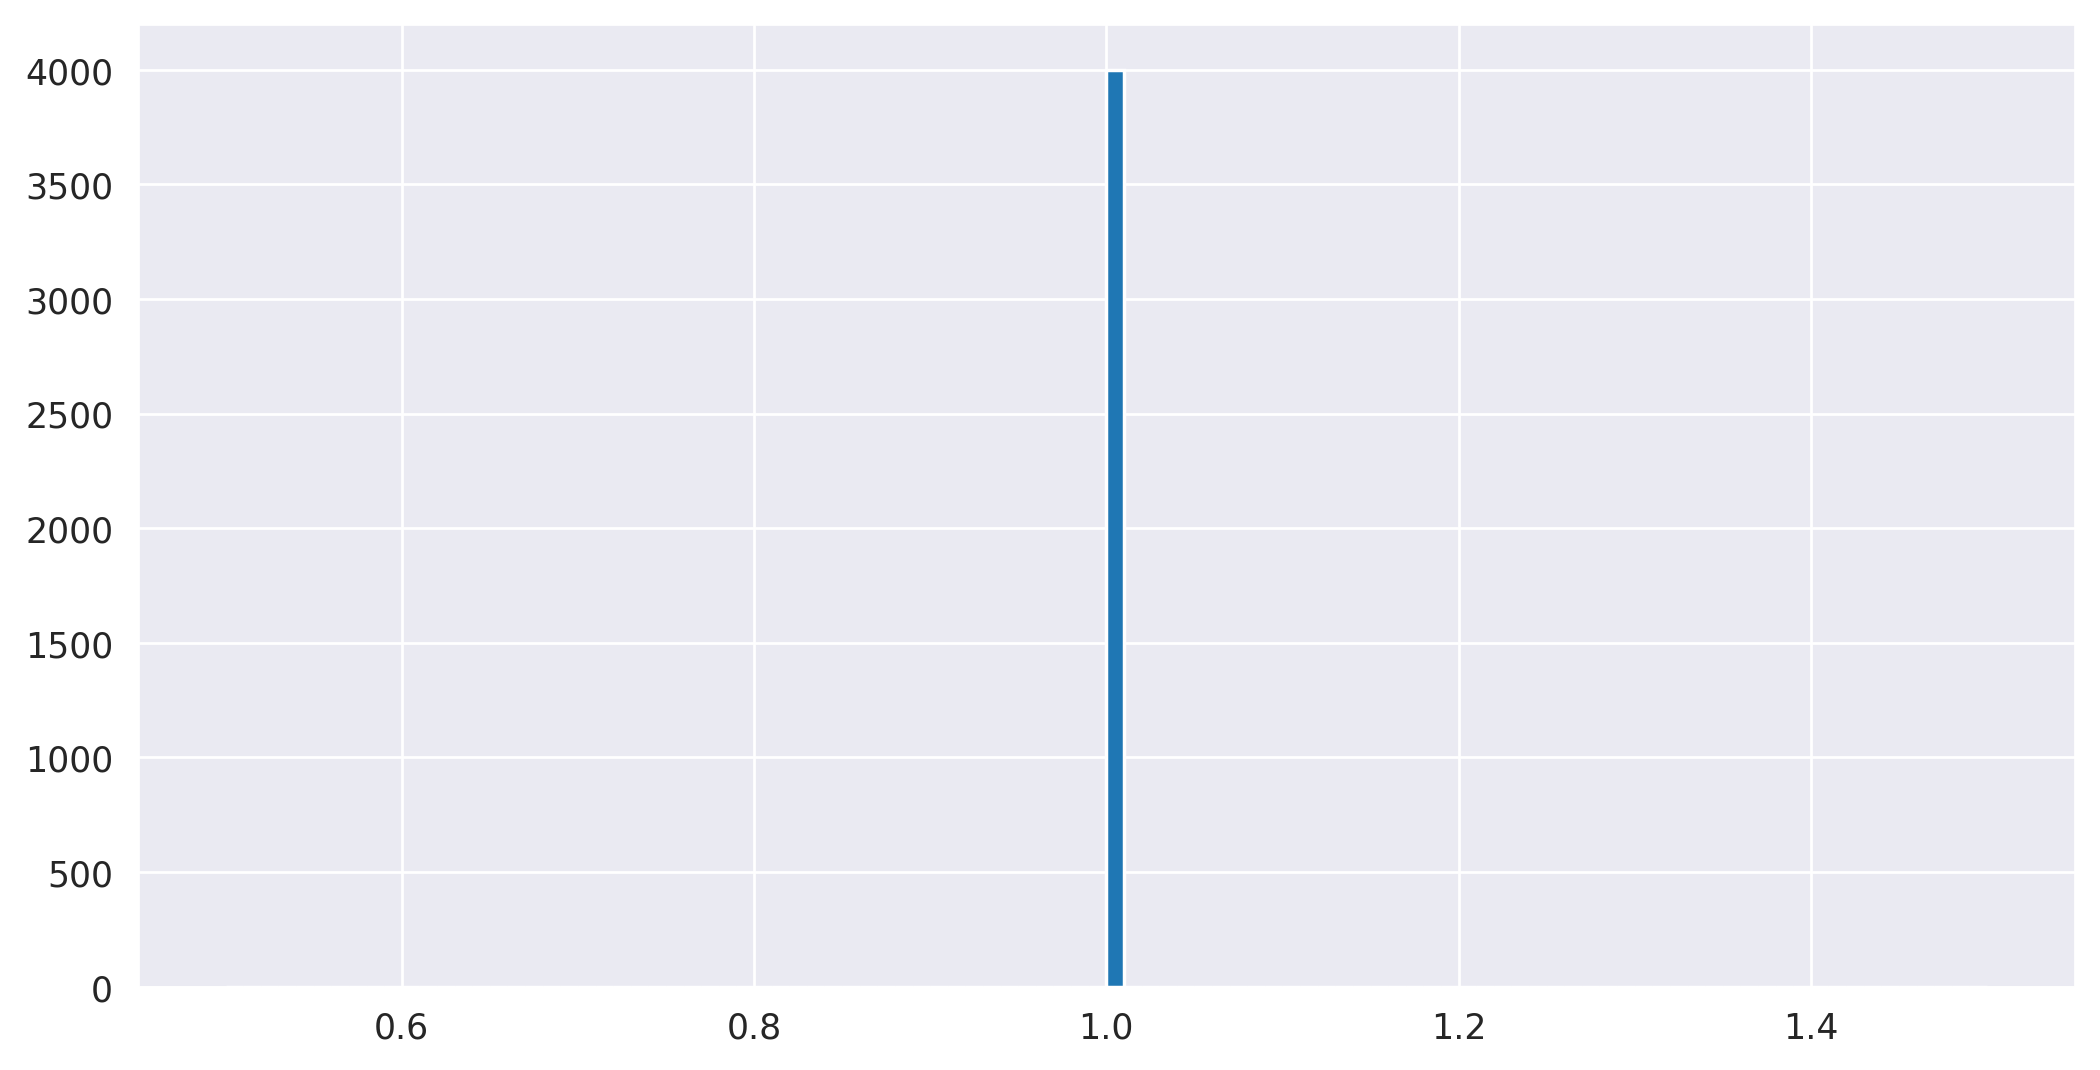

Bonus_miles


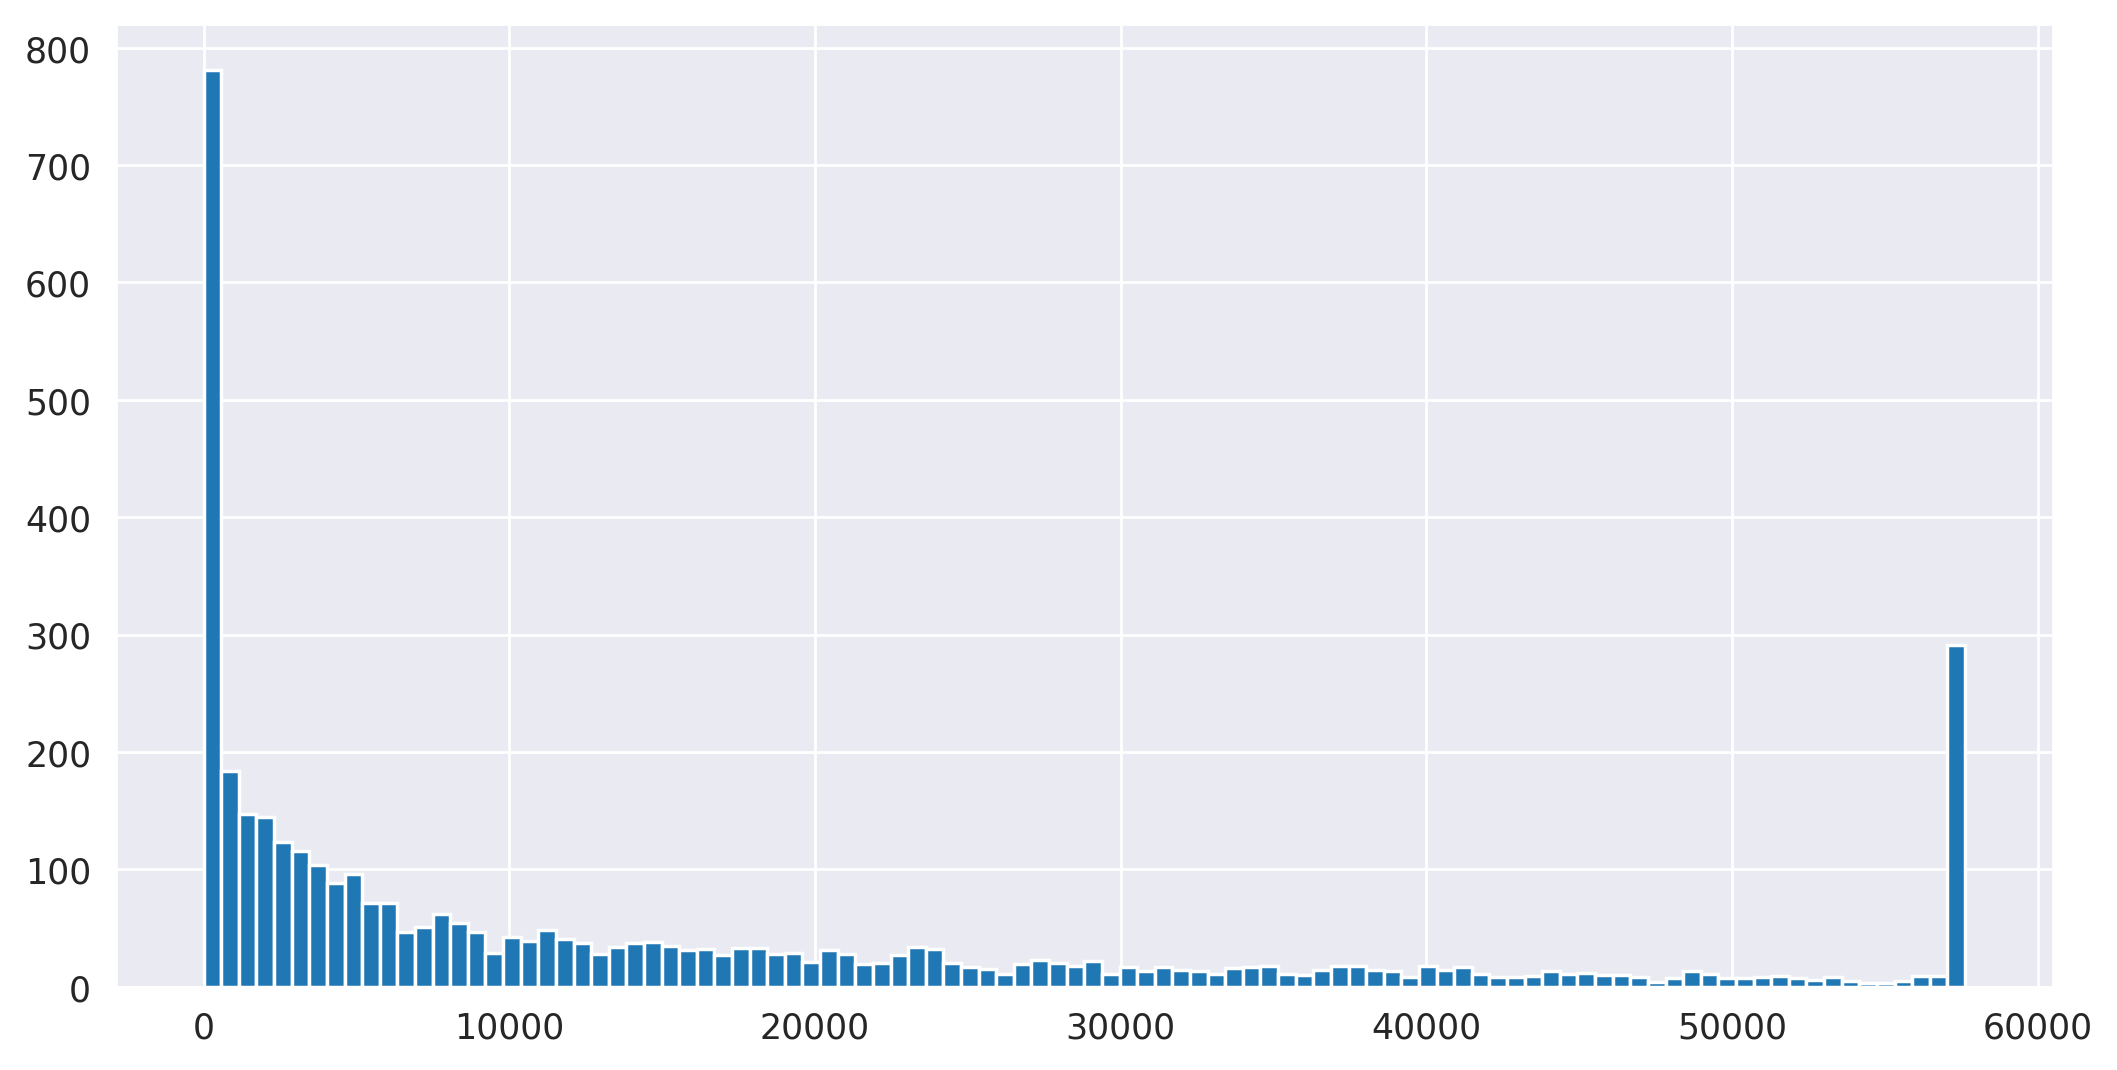

Bonus_trans


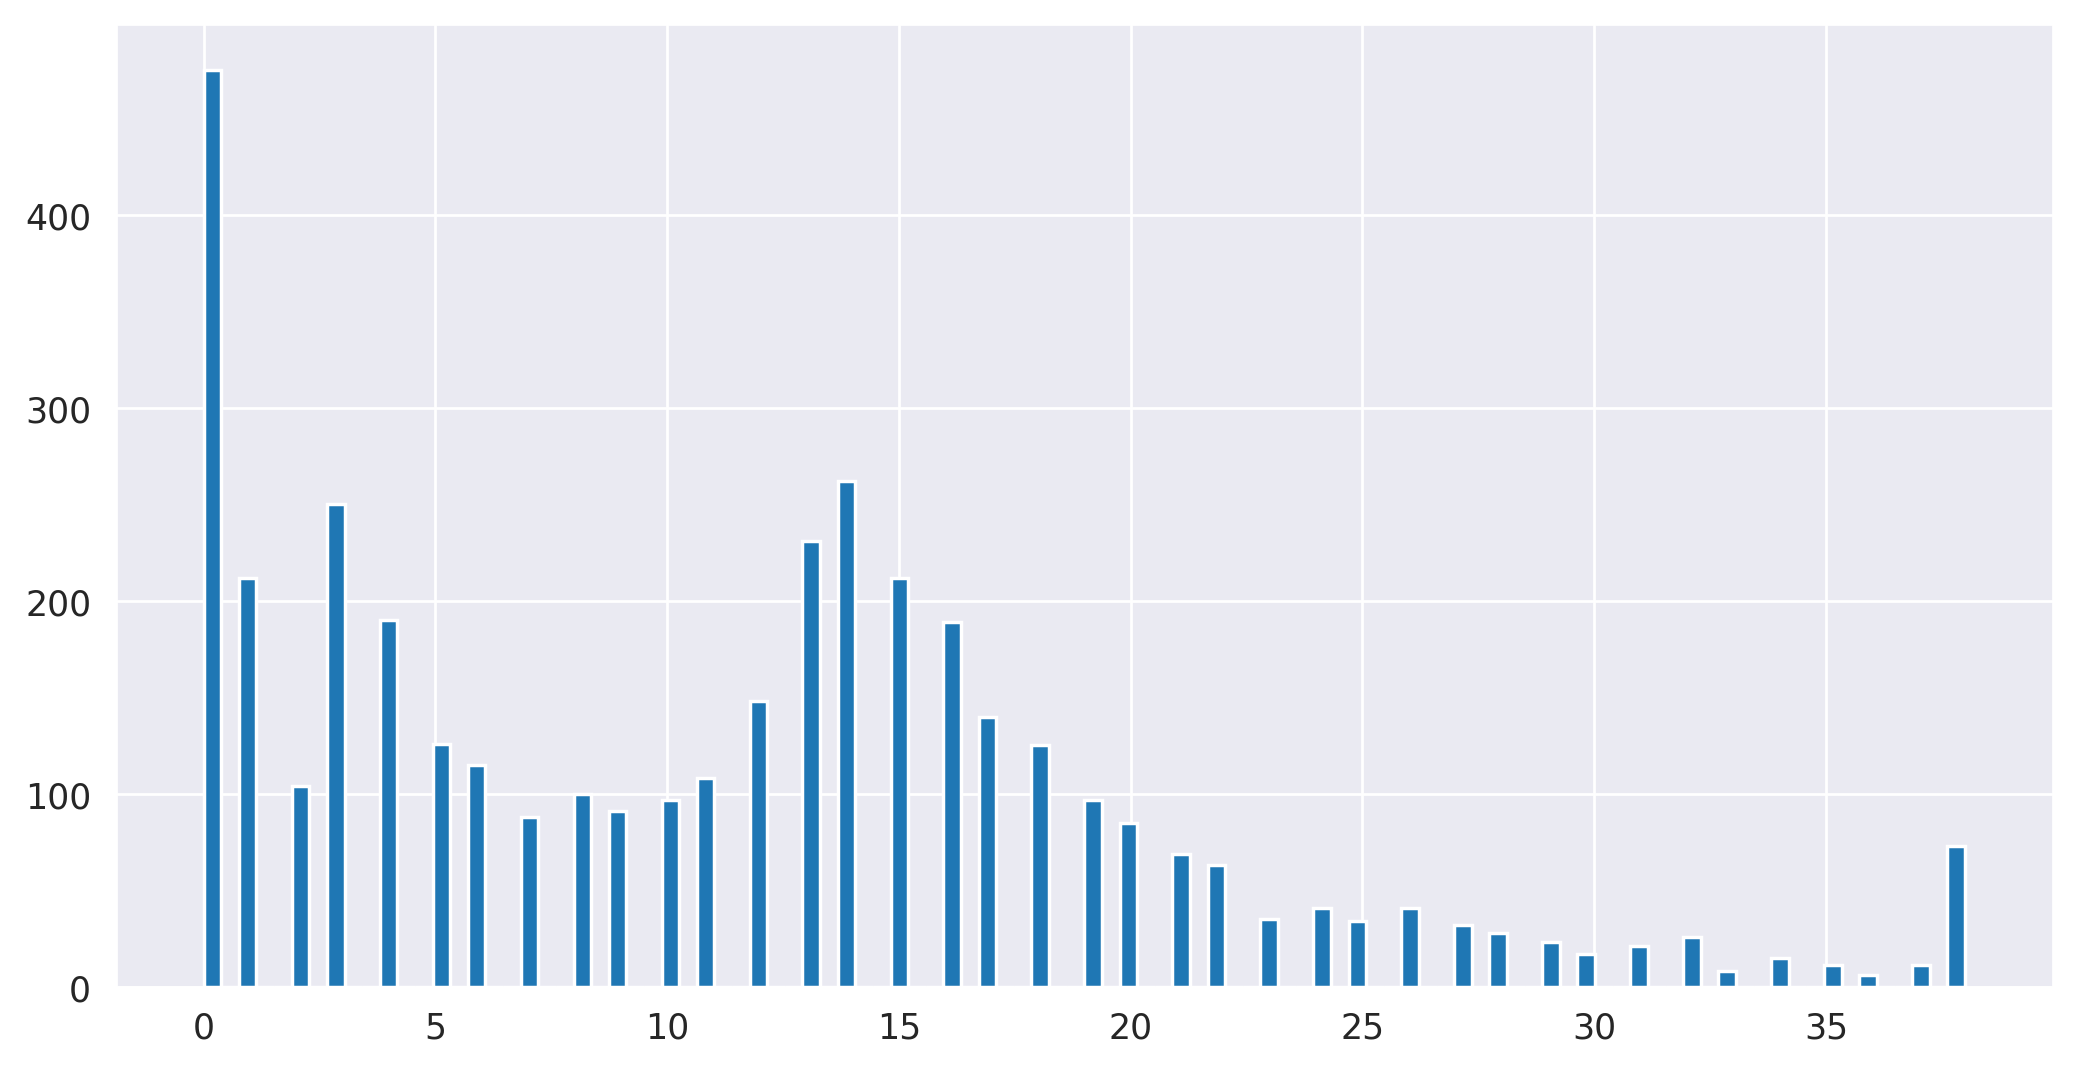

Flight_miles_12mo


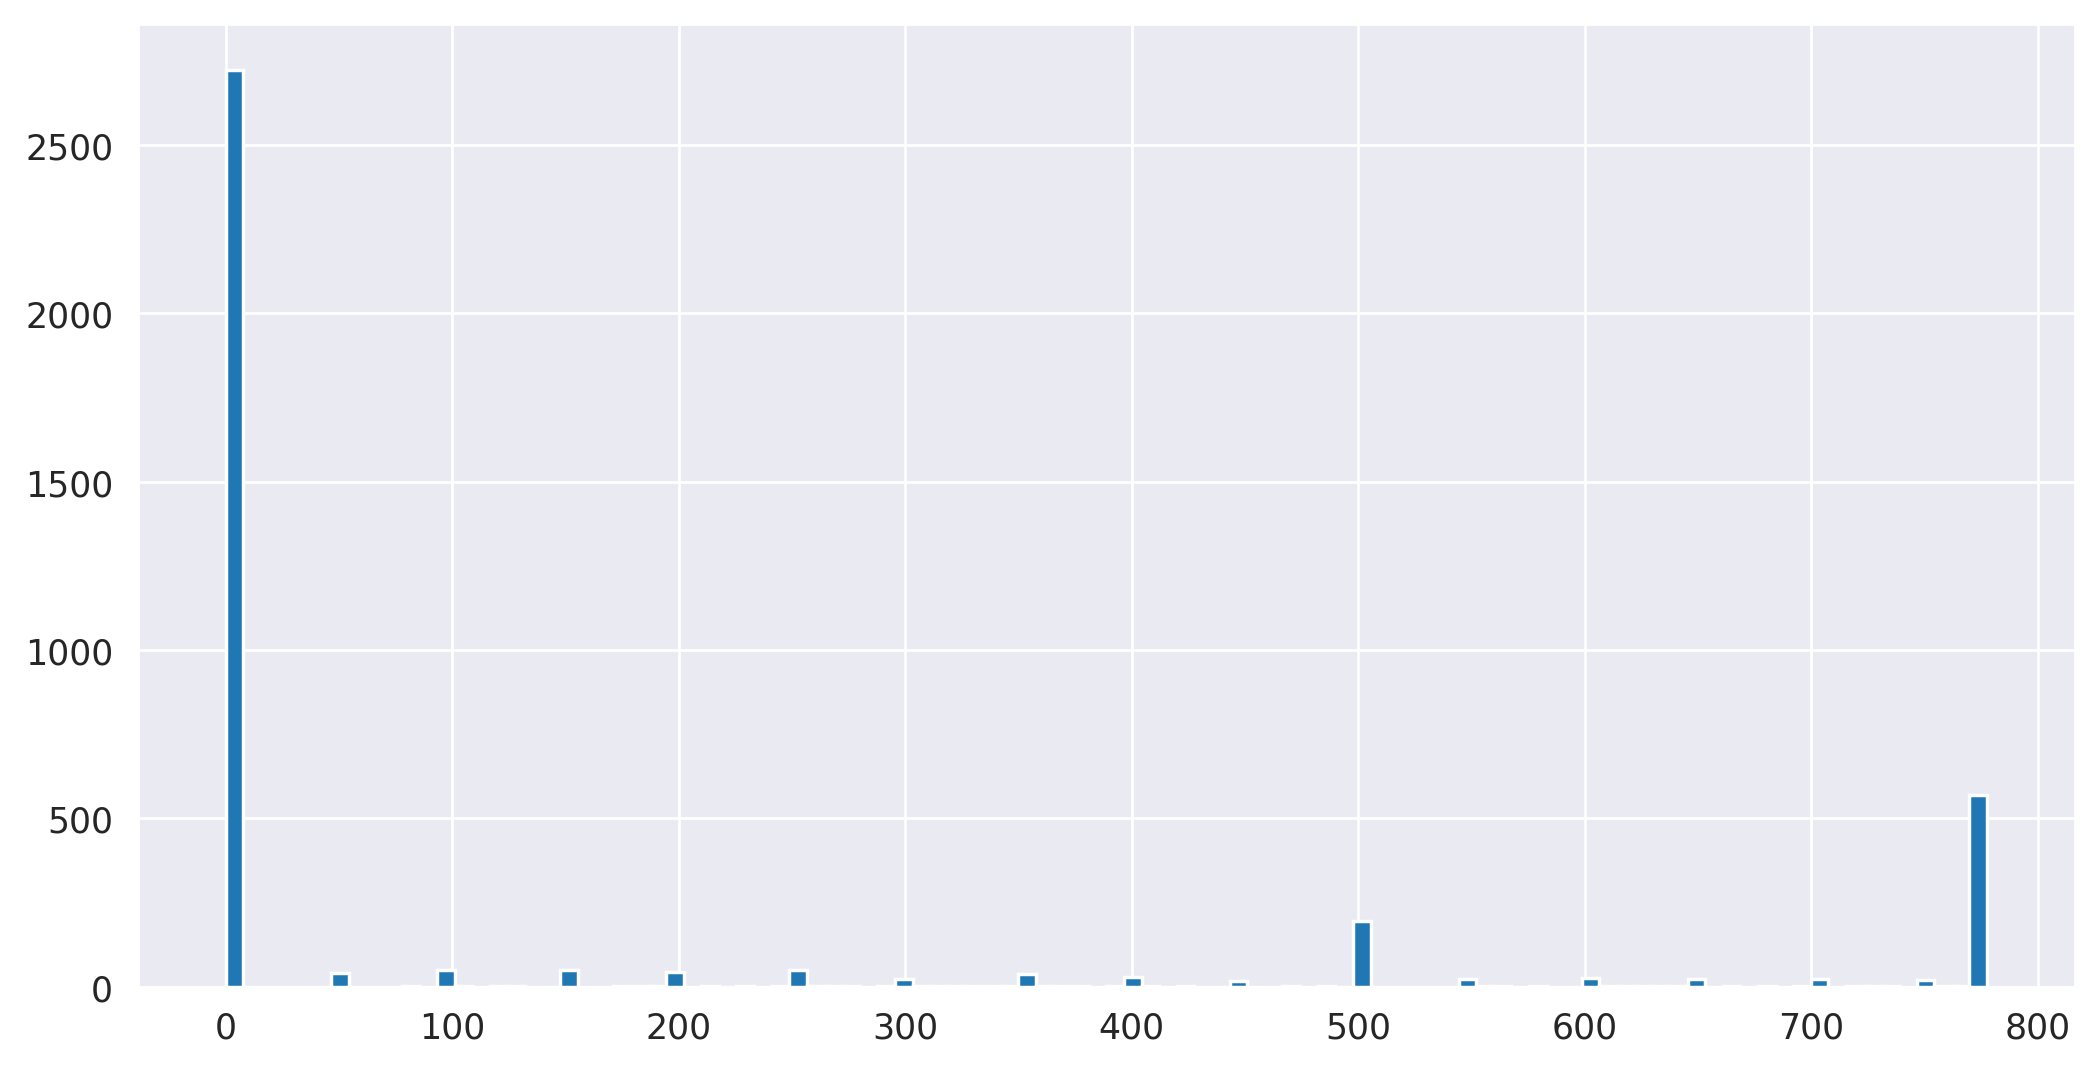

Flight_trans_12


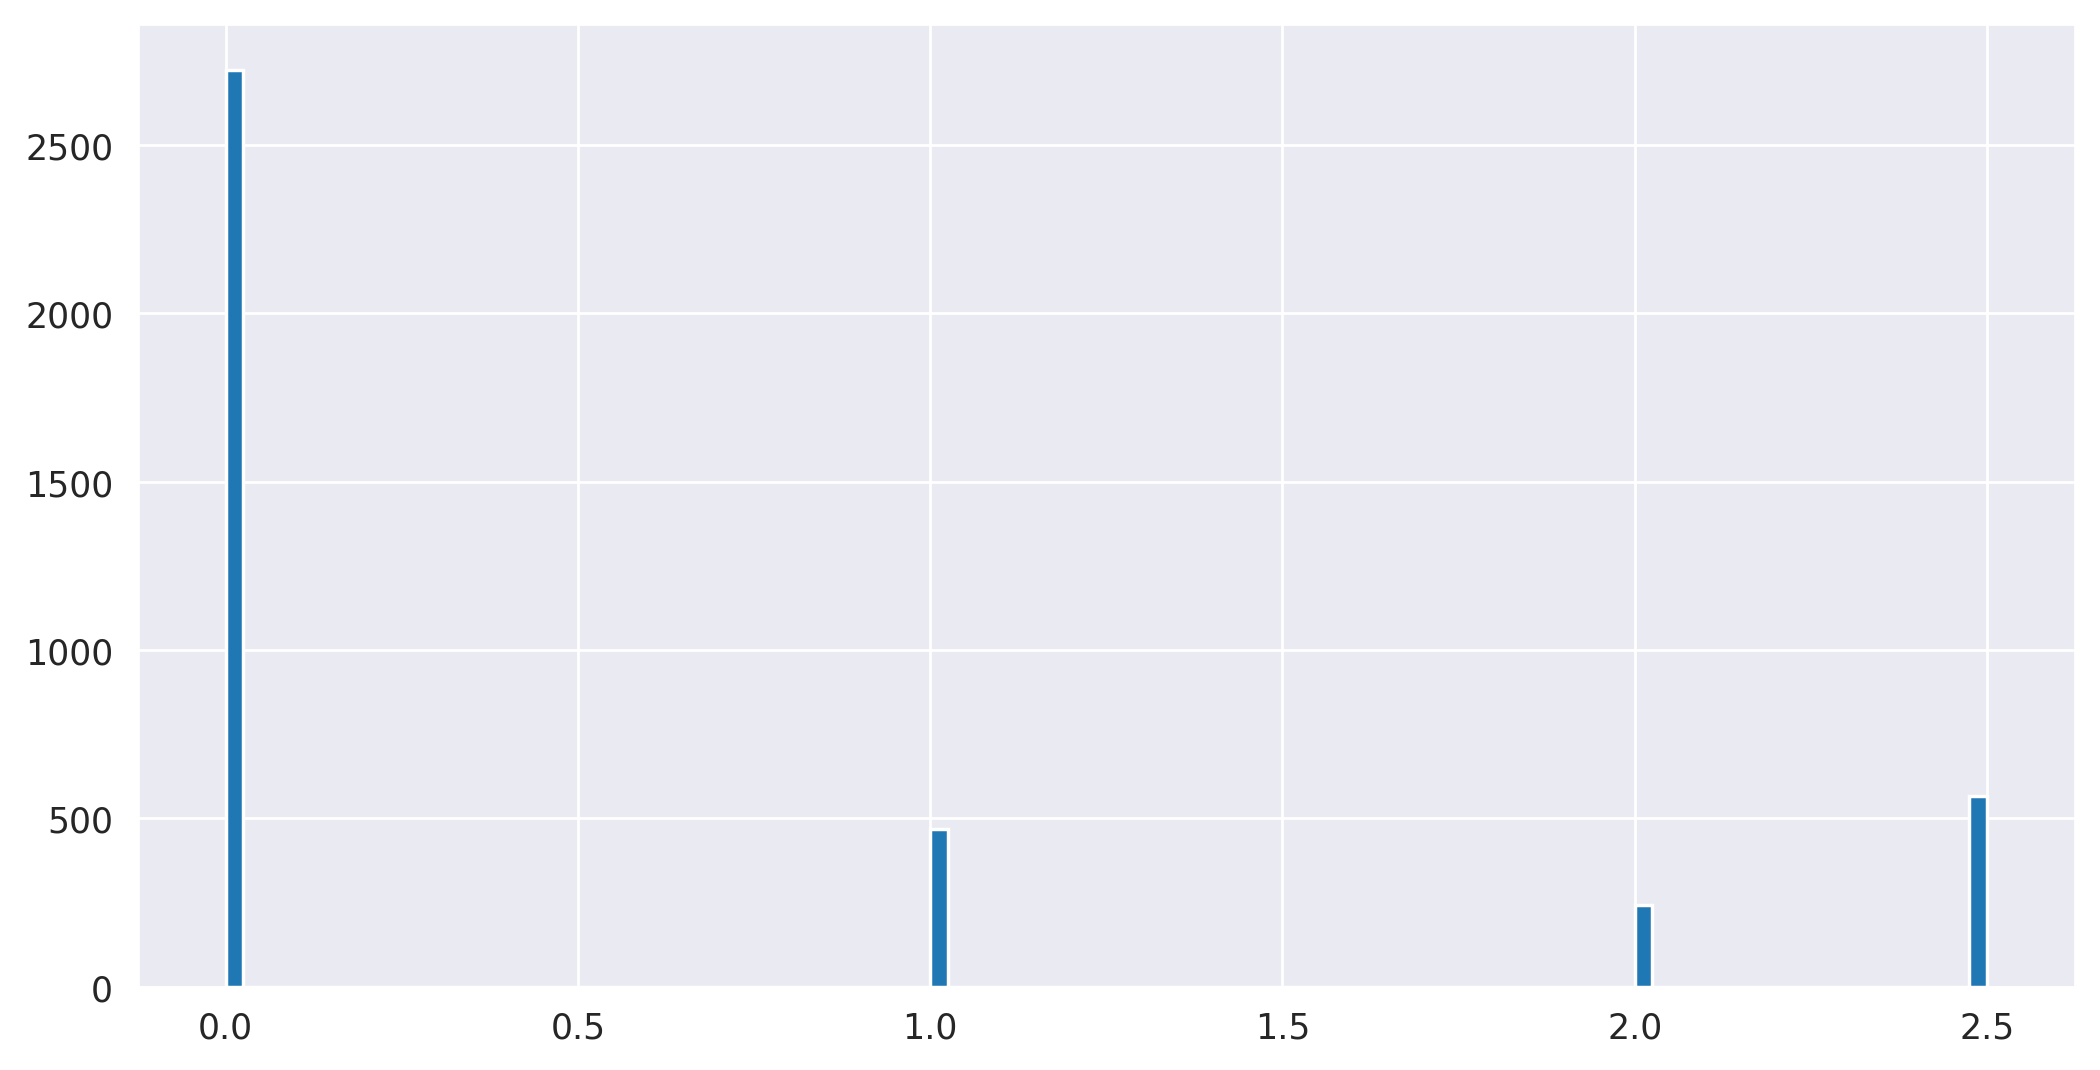

Days_since_enroll


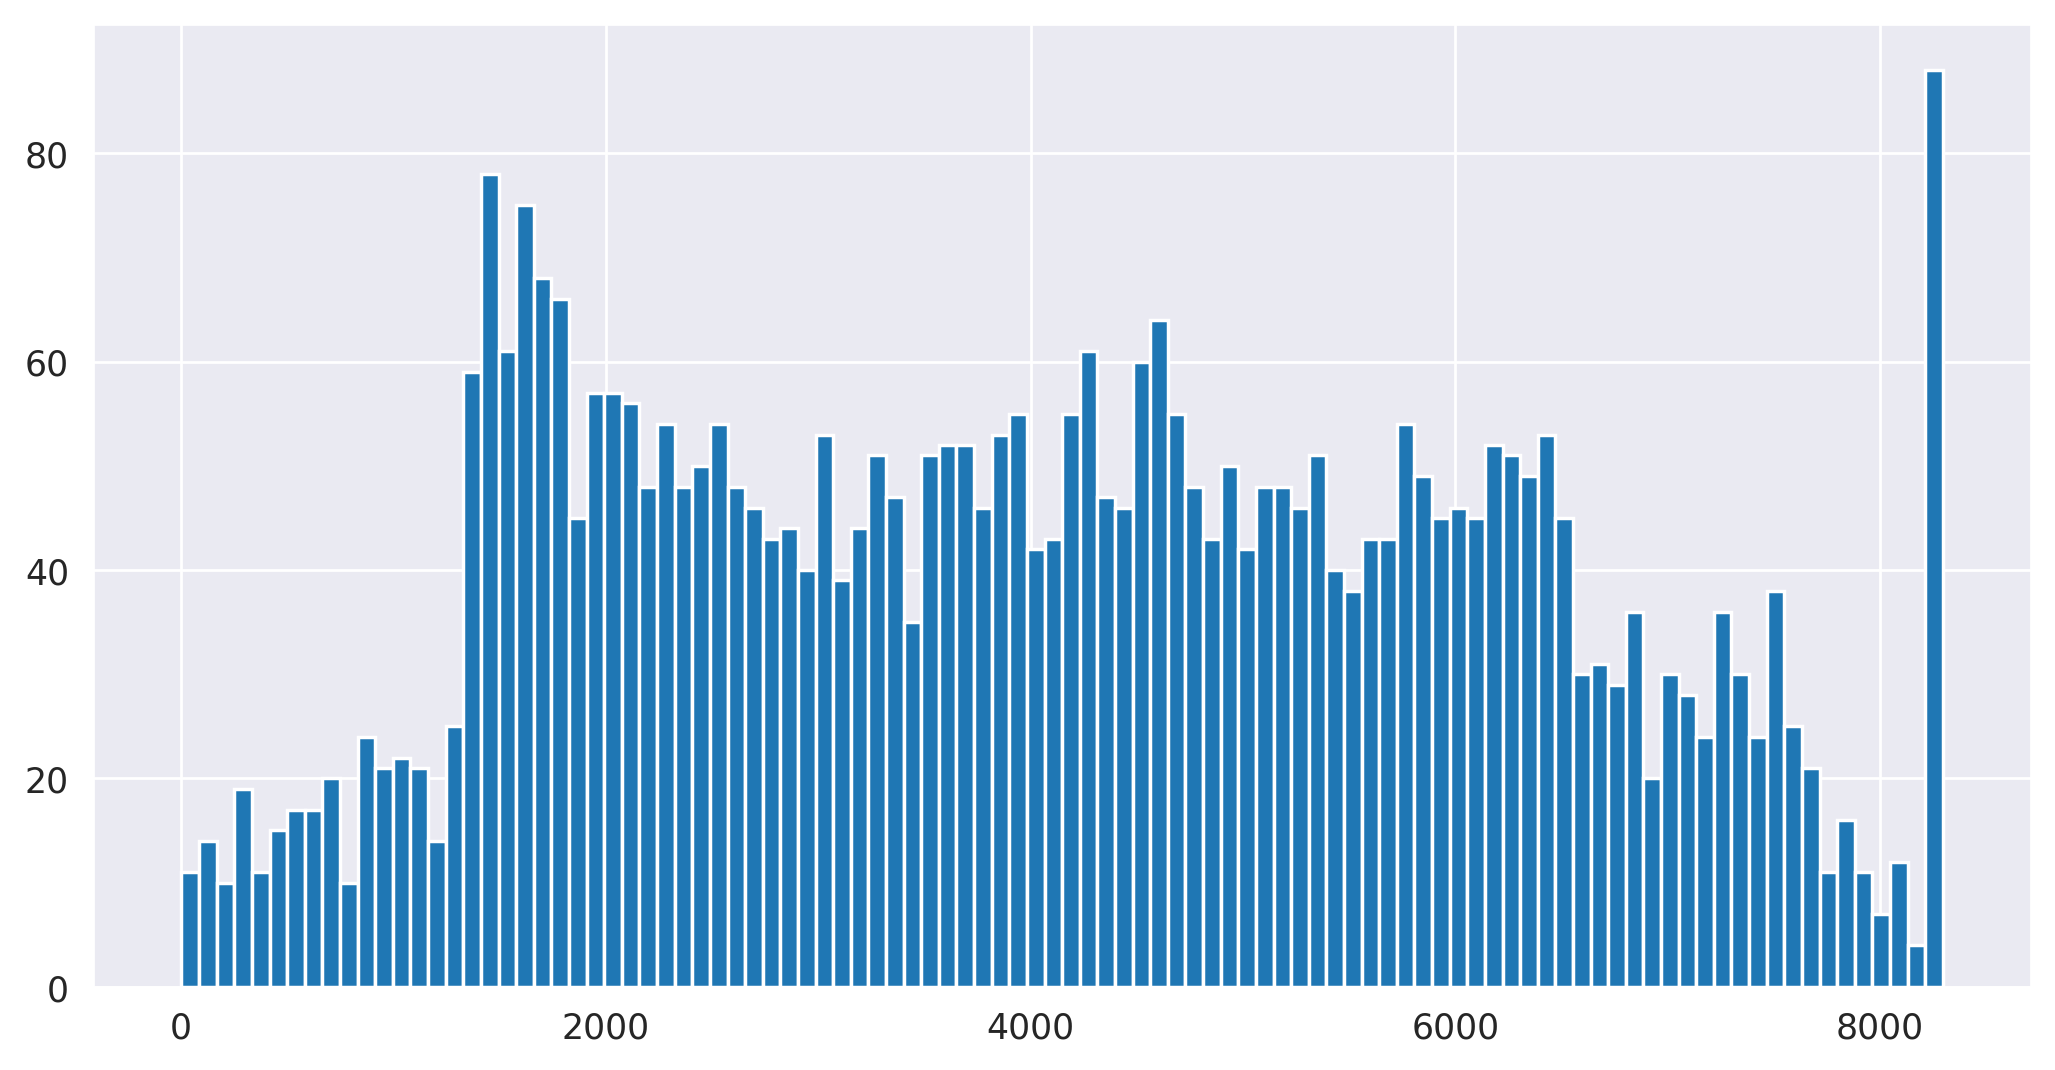

Award?


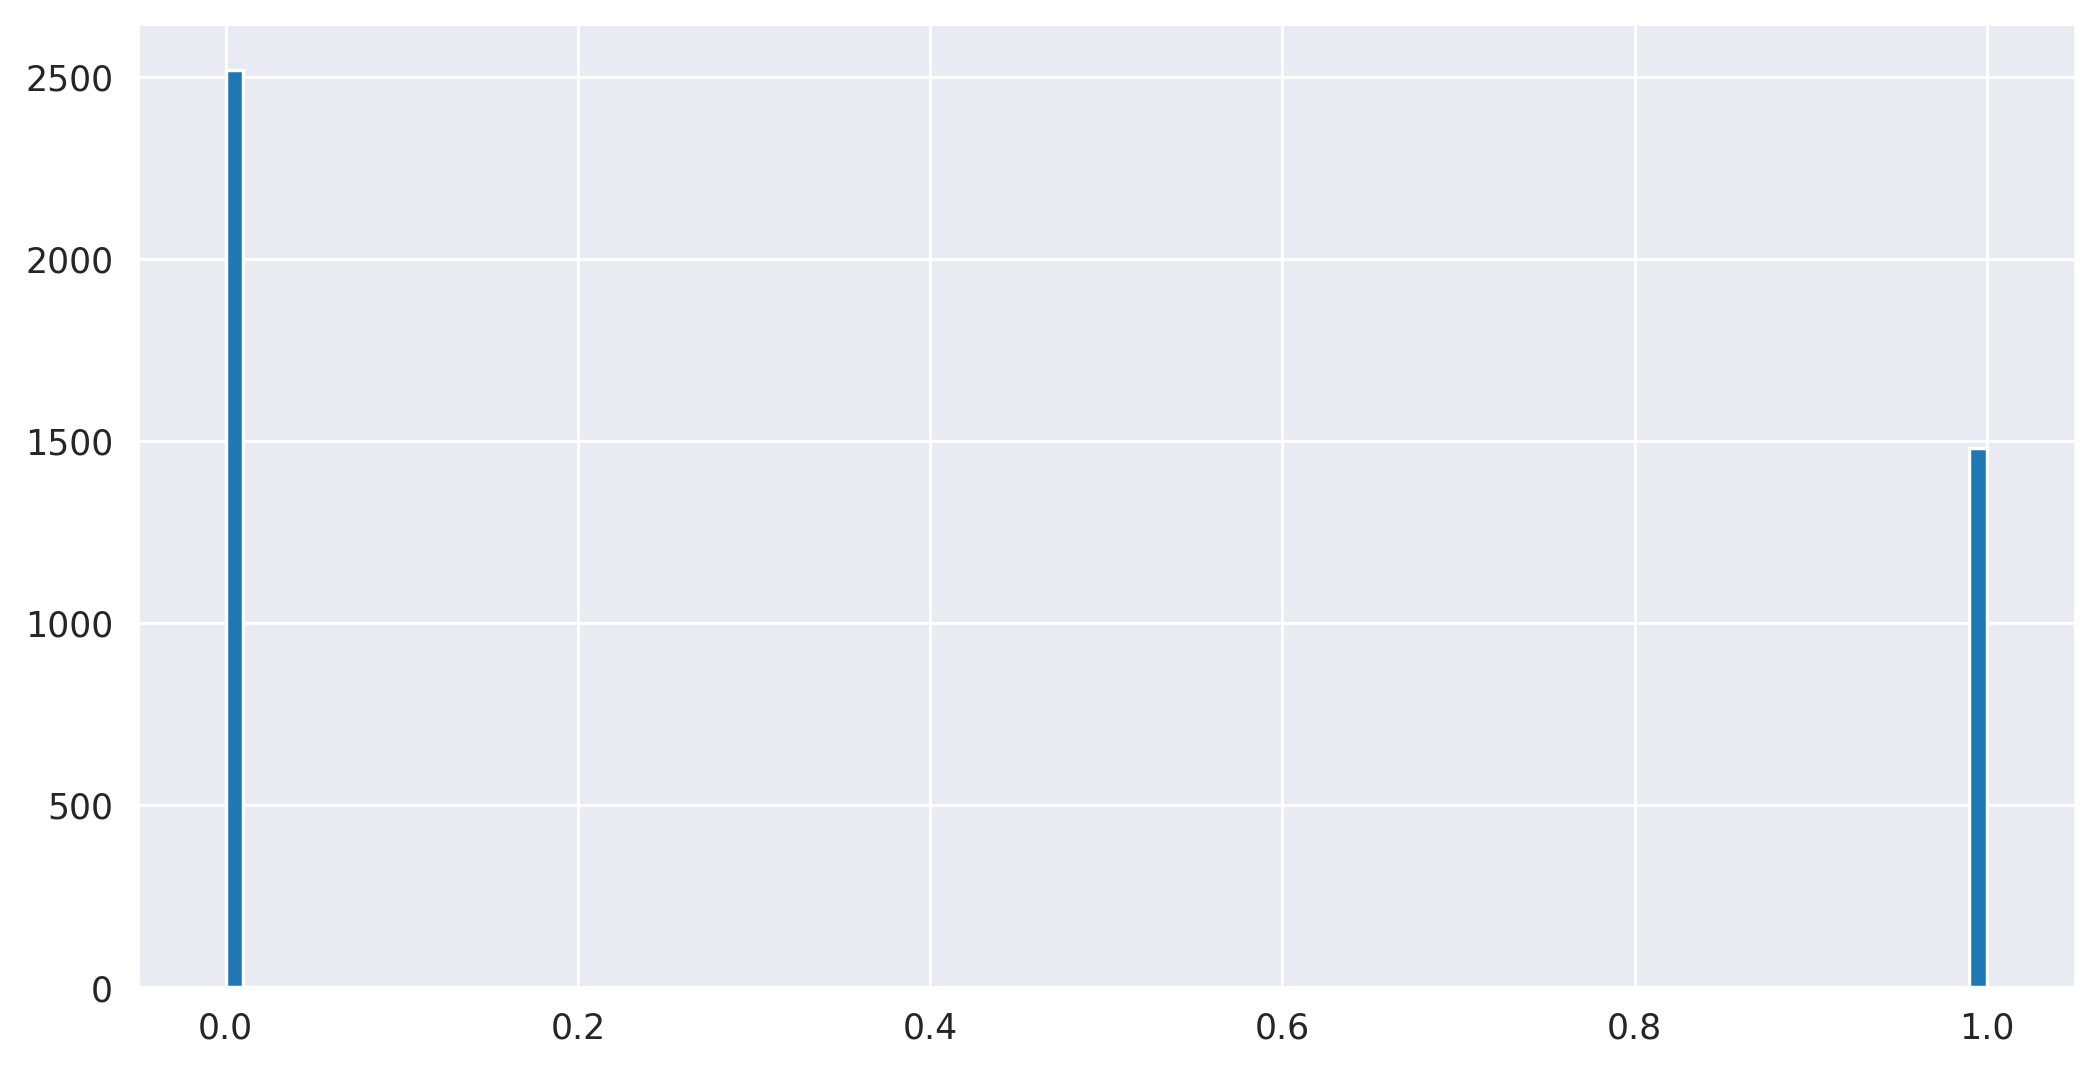

In [8]:
# @title Histogram
for col in num_cols:
    print(col)
    data[col].hist(bins=100)
    plt.show()

* Most of the people have balance of around 75k miles of award travel and some 5 to 6 % people are having almost 200k miles.
* Almost all people have 0 miles are counted as qualifying for Topflight status.
* Most of the people (almost 50 %) earned under 5k miles and remaining earned from 5k to more than 50k miles in last 12 months from Frequent Flyer Credit Card.
* Almost all people have earned under 5k miles in last 12 months from Rewards credit card
* Almost all people have earned under 5k miles in last 12 months from Small Business credit card.
* Most of the people earned less than 20k miles from non-flight bonus transactions in the past 12 months.
* Mejority of the people have less than 20 non-flight bonus transactions in the past 12 months.
* Almost 65% people have zero flight travels in last 12 months but few people are having upto 800 flight miles
* Almost 65% people have zero and very few people are having upto 2.5 flight transactions in the past 12 months.
* Mejority of the people are encolled between last 2000 to 8000 days.
* Around 60 % people have received some kind of awards.

<Axes: >

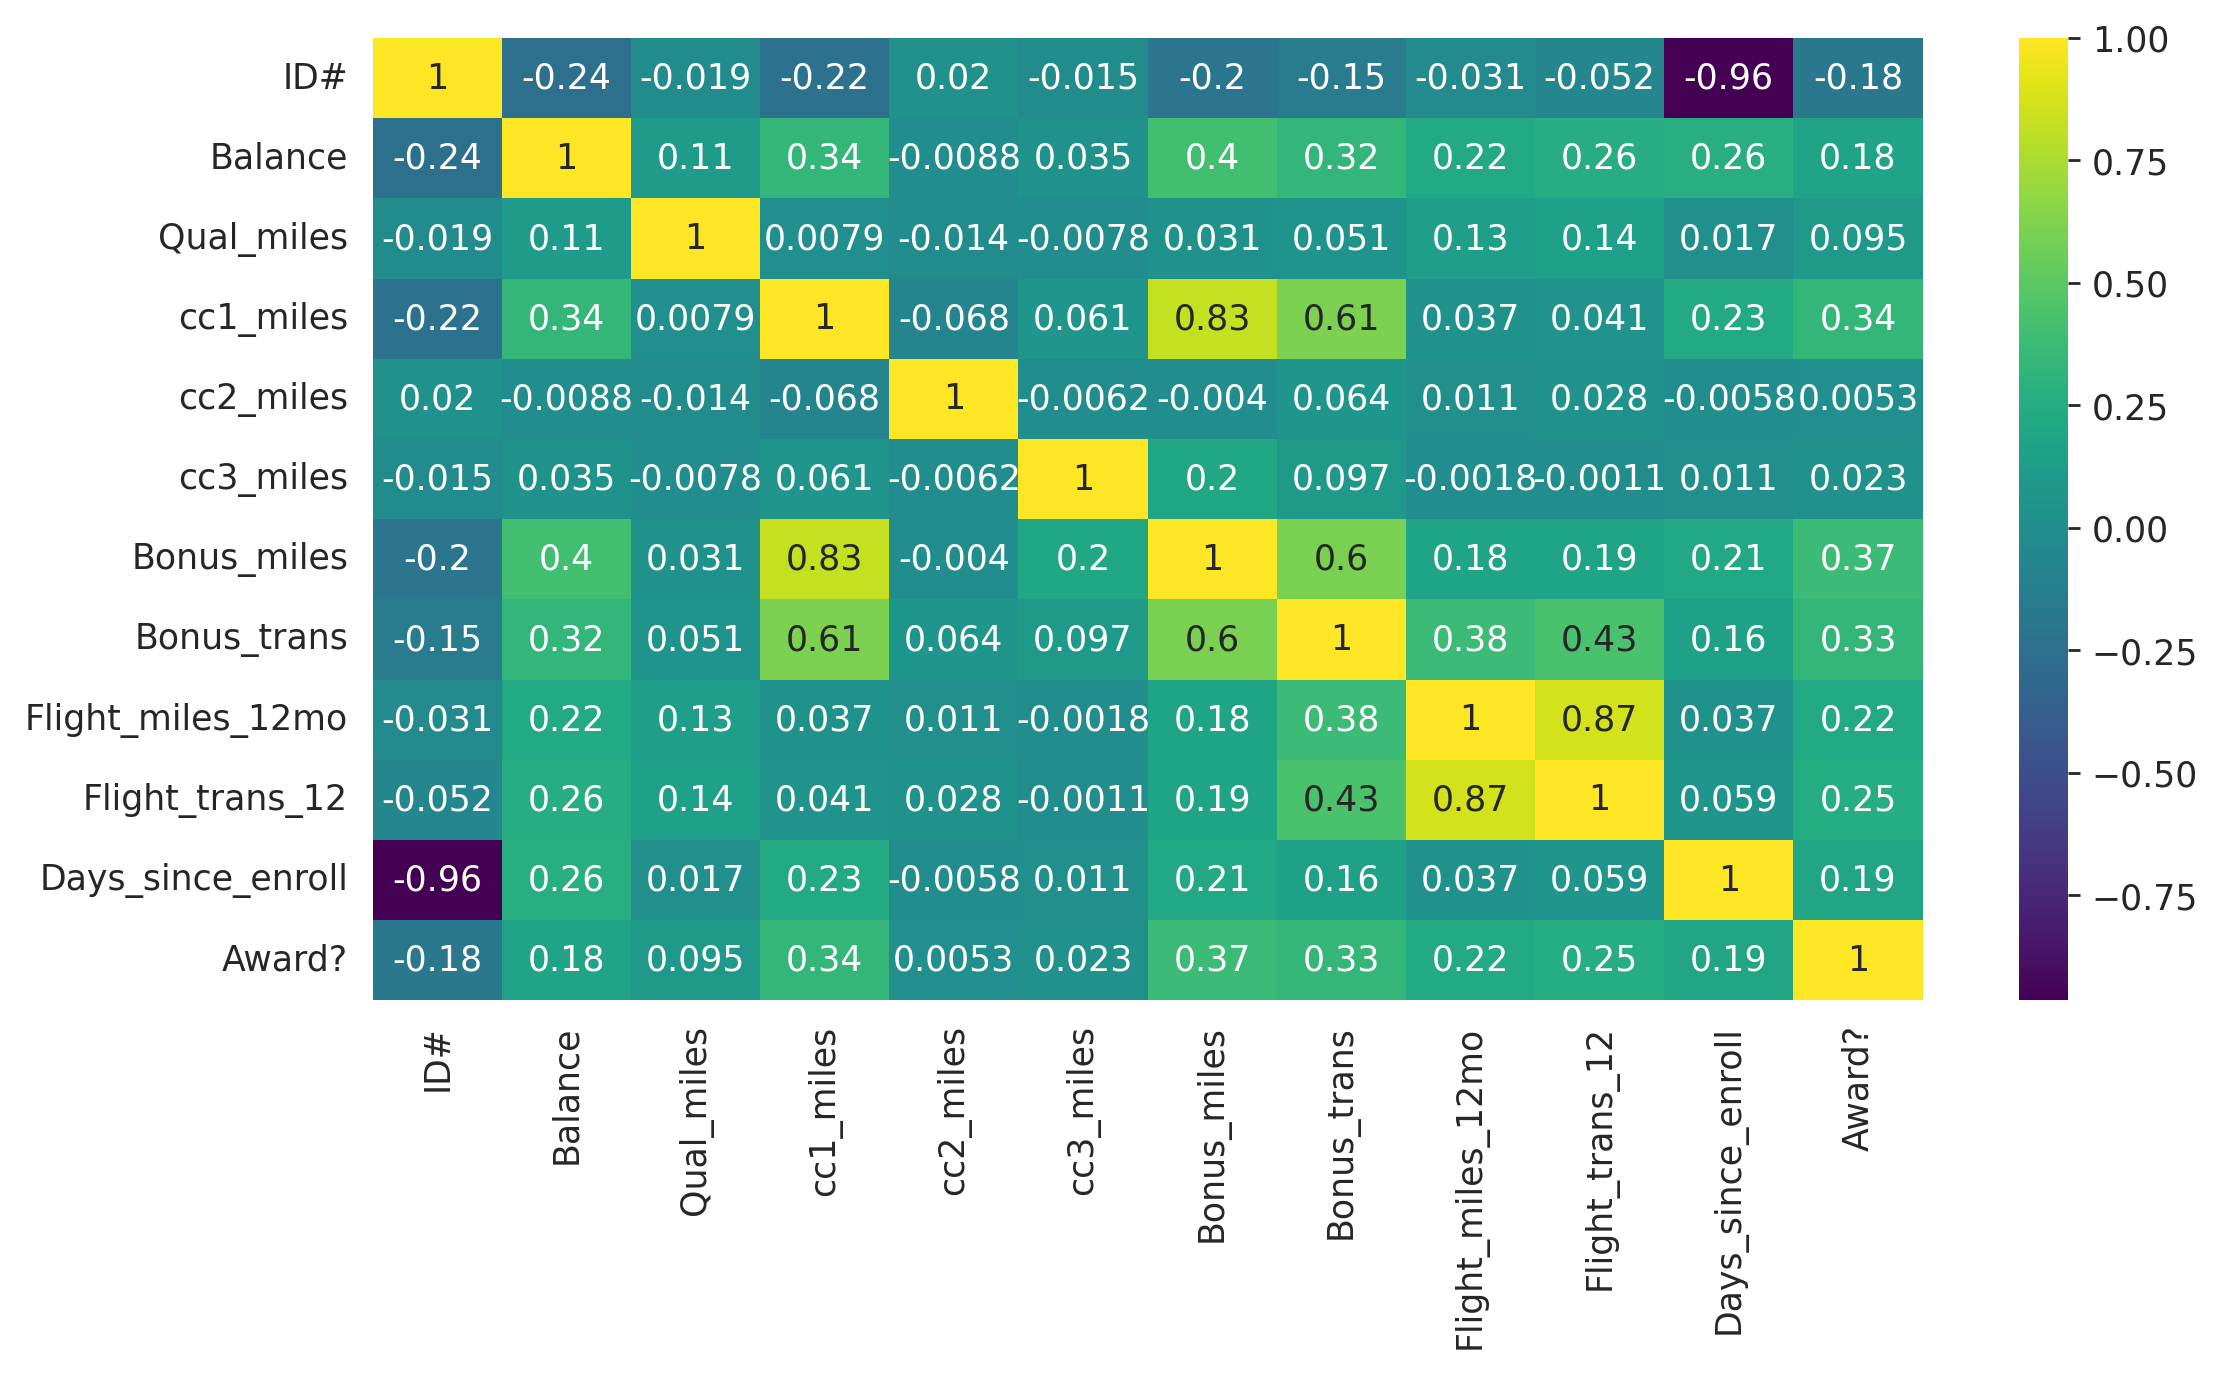

In [10]:
# @title Heatmap for Correlation
sns.heatmap(data0.corr(), annot=True, cmap='viridis')

# Implementing Clustering Algorithms:

In [11]:
# @title Drop the Columns
data.drop(columns=['Qual_miles','cc2_miles','cc3_miles','Days_since_enroll','Award?'], inplace=True)

In [12]:
# @title Feature Scalling
from sklearn.preprocessing import StandardScaler
X = data.drop(columns = ['ID#'])
#X.head()

sc = StandardScaler()
scaled_X = sc.fit_transform(X)
pd.DataFrame(sc.fit_transform(X), columns = data.columns[1:]).head()

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0 -0.607258  -0.769578    -0.843091    -1.148854          -0.604313   
1 -0.758947  -0.769578    -0.840822    -1.039133          -0.604313   
2 -0.382070  -0.769578    -0.624581    -0.819689          -0.604313   
3 -0.835106  -0.769578    -0.825052    -1.148854          -0.604313   
4  0.579265   1.409471     1.543191     1.594189           2.034489   

   Flight_trans_12  
0        -0.626143  
1        -0.626143  
2        -0.626143  
3        -0.626143  
4         2.020176

#Model Building

## K-Mean Clustering

In [13]:
# @title K-Mean
from sklearn.cluster import KMeans
km = KMeans()
# yp = km.fit_predict(scaled_X)
# yp

Text(0.5, 1.0, 'Elbow Graph')

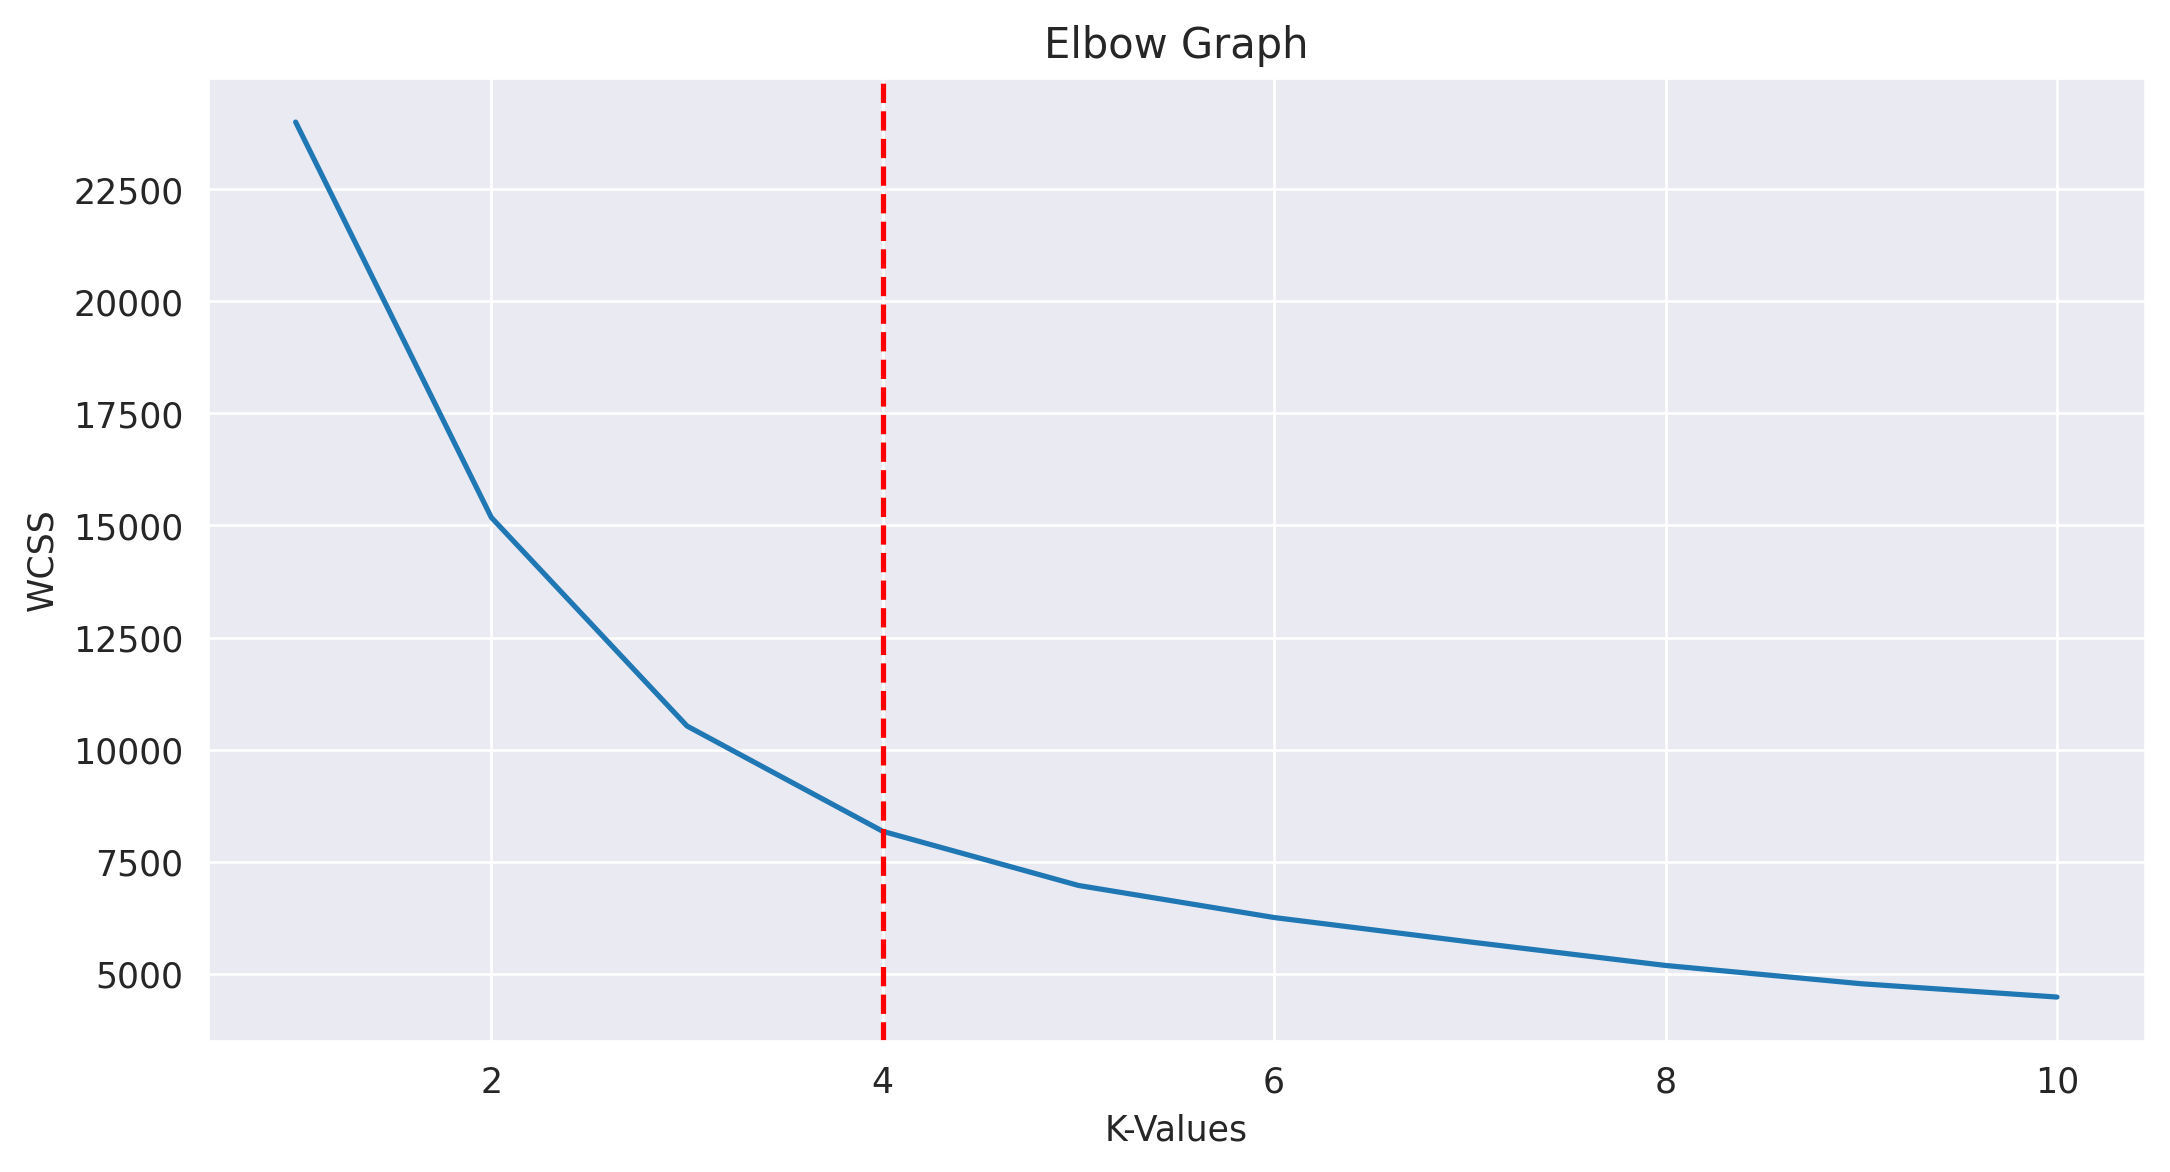

In [14]:
# @title Elbow graph
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_X)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [15]:
# @title Hyperparameter Tunning
from sklearn.metrics import silhouette_score
for i in range(2,11):
    print('n_clusters =',i)
    km = KMeans(n_clusters=i)
    yp = km.fit_predict(scaled_X)    # Cluster Labels
    print('silhouette_score',round(silhouette_score(scaled_X,yp),4))
    print('----------------------------')

n_clusters = 2
silhouette_score 0.3949
----------------------------
n_clusters = 3
silhouette_score 0.4149
----------------------------
n_clusters = 4
silhouette_score 0.4271
----------------------------
n_clusters = 5
silhouette_score 0.3802
----------------------------
n_clusters = 6
silhouette_score 0.3934
----------------------------
n_clusters = 7
silhouette_score 0.3833
----------------------------
n_clusters = 8
silhouette_score 0.3551
----------------------------
n_clusters = 9
silhouette_score 0.3517
----------------------------
n_clusters = 10
silhouette_score 0.364
----------------------------


* for n_clusters = 4 silhouette score is maximum, hence for final model building we will choose 4 clusters.

In [16]:
# @title Final Model
km = KMeans(n_clusters=4)
yp = km.fit_predict(scaled_X)    # Cluster Labels
yp

array([0, 0, 0, ..., 2, 3, 0], dtype=int32)

In [22]:
data_temp = data0.copy()
data_temp['Clusters'] = yp
data_temp.head()
data_temp['Clusters'].value_counts()

Clusters
0    1906
2    1048
3     642
1     403
Name: count, dtype: int64

In [23]:
data_temp.groupby('Clusters').agg('mean')

ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Clusters                                                                 
0         2233.484785   34220.118048   81.674187   1.121196   1.019412   
1         1554.645161  172565.404467  309.275434   4.044665   1.014888   
2         1776.144084   97336.979962   89.796756   3.523855   1.004771   
3         2044.112150   89649.767913  314.482866   1.208723   1.015576   

          cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Clusters                                                            
0          1.000525   3429.398216     6.015215           9.943337   
1          1.052109  55685.218362    25.947891        1925.861042   
2          1.025763  33042.707061    17.016221          24.690840   
3          1.000000   7719.481308    10.344237        1586.936137   

          Flight_trans_12  Days_since_enroll    Award?  
Clusters                                                
0                0.060336        3705.207240  0.188877  
1                5.632754        4975.627792  0.754342  
2                0.113550        4557.911260  0.477099  
3                4.655763        4090.537383  0.493769

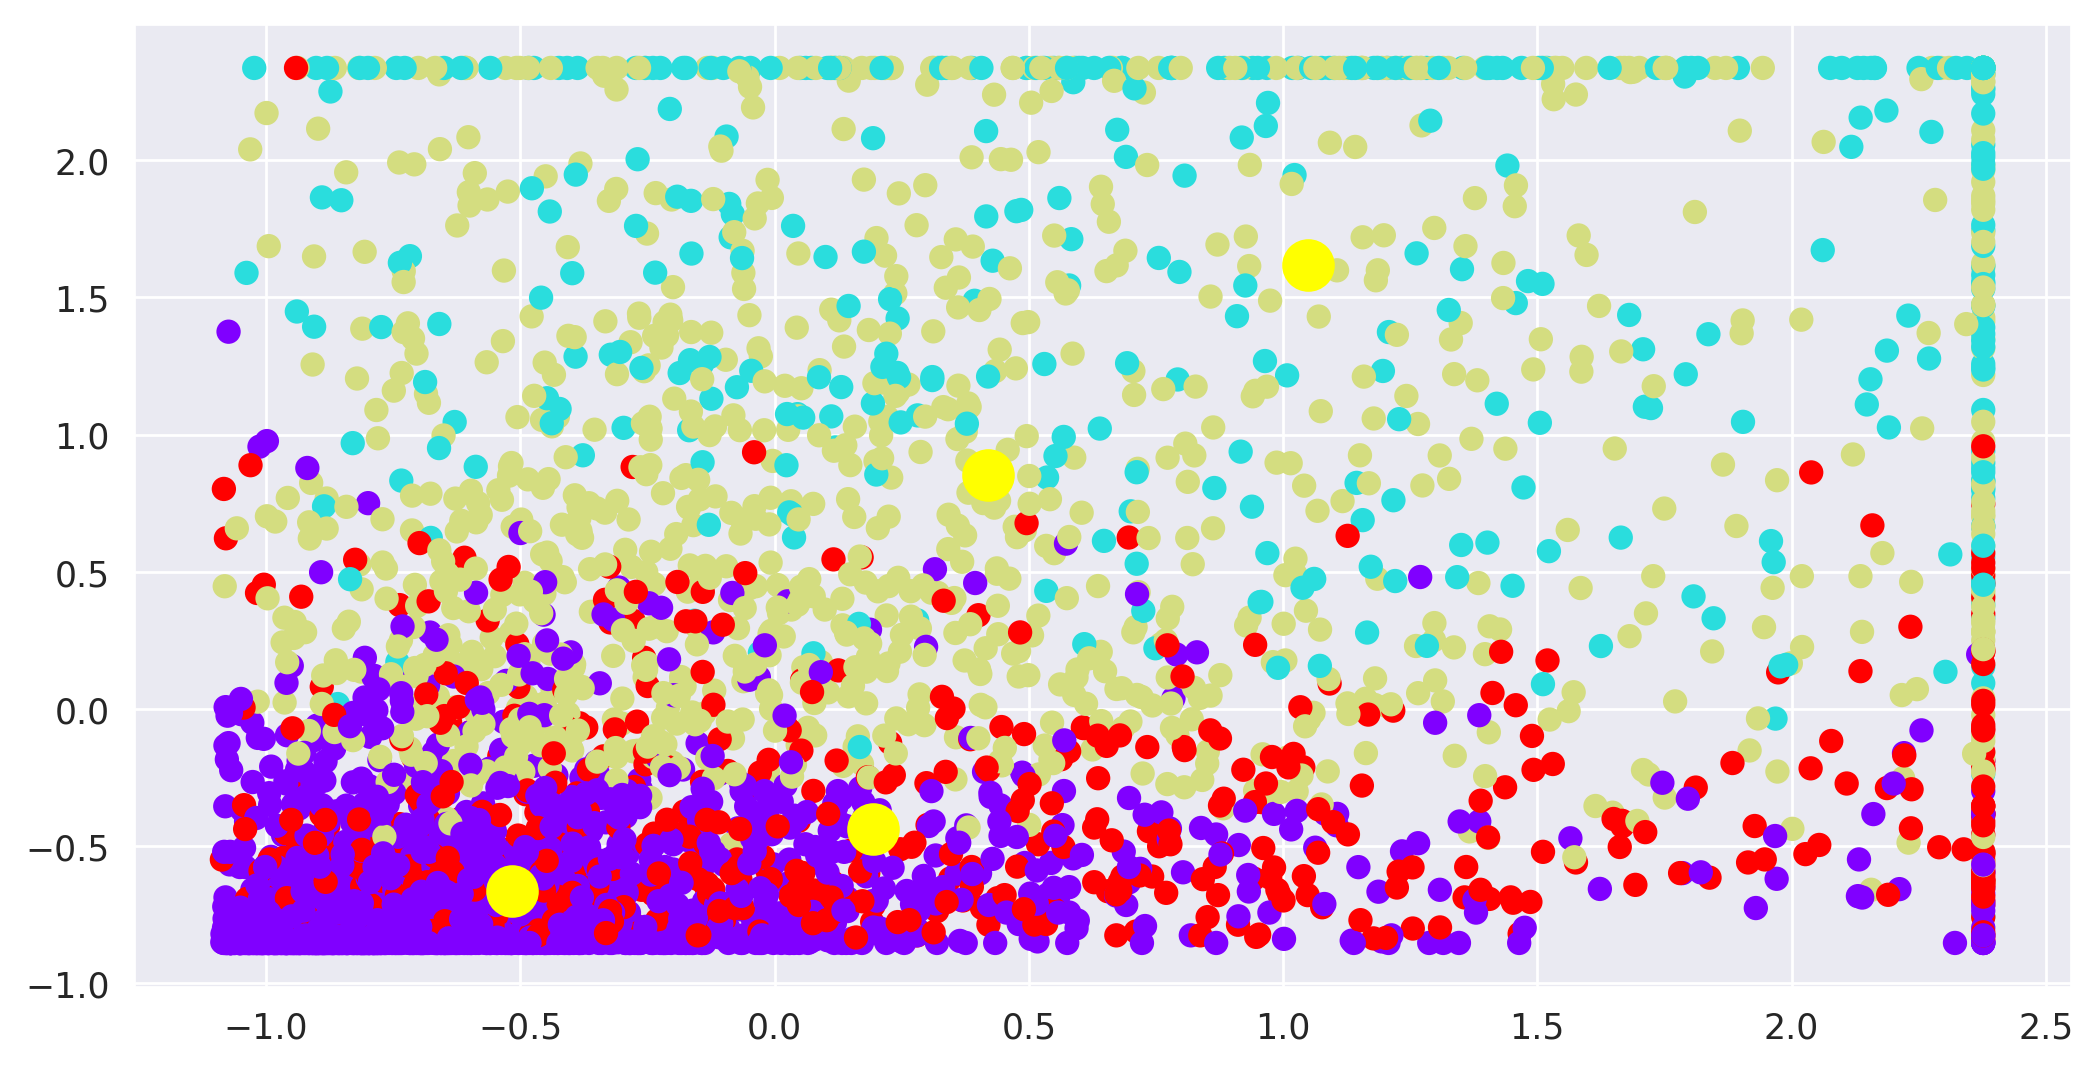

In [24]:
# @title Plot

plt.scatter(scaled_X[:,0],scaled_X[:,2], c = yp, cmap='rainbow') # c - color parameter
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,2], c = 'yellow',s = 200)

In [25]:
# @title Evaluation of Kmeans
from sklearn.metrics import silhouette_score
silhouette_score(scaled_X,yp)

0.42707920585717

## Hierarchical Clustering

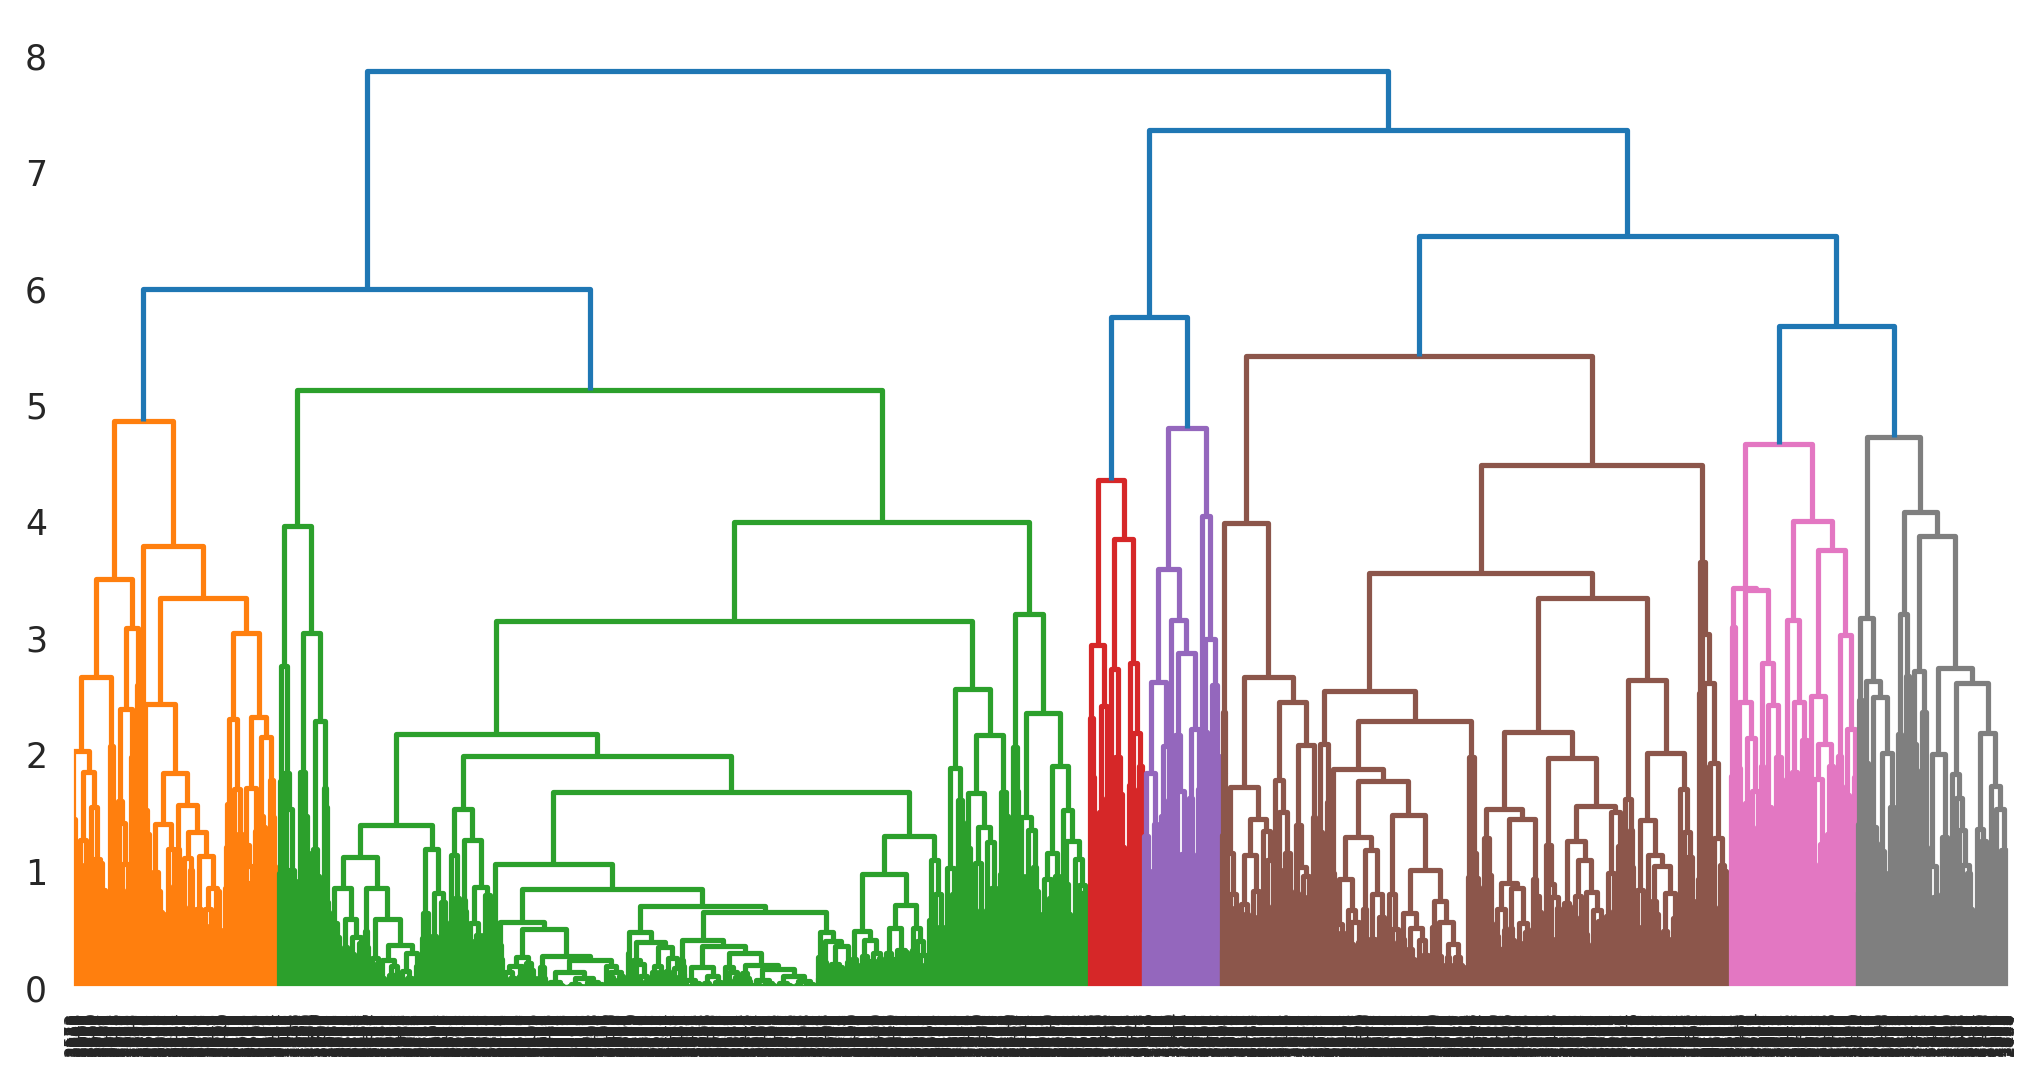

In [26]:
# @title Dendrogram
from scipy.cluster import hierarchy
lk = hierarchy.linkage(scaled_X, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [27]:
# @title Hyperparameter Tunning
from sklearn.cluster import AgglomerativeClustering
for i in range(2,20):
    print('n =',i)
    hc = AgglomerativeClustering(n_clusters=i)
    yp1 = hc.fit_predict(scaled_X)
    print('      ',silhouette_score(scaled_X,yp1))

n = 2
       0.39728294375175716
n = 3
       0.3581383059825601
n = 4
       0.36194494384249676
n = 5
       0.28775503381317685
n = 6
       0.31192691433199804
n = 7
       0.3166443069738649
n = 8
       0.31295529797898874
n = 9
       0.29181245739966605
n = 10
       0.29060780805134967
n = 11
       0.28609195430140927
n = 12
       0.29364605235051233
n = 13
       0.29919025970376895
n = 14
       0.3086436038018995
n = 15
       0.3096722675746732
n = 16
       0.3167772670125979
n = 17
       0.31331324064258587
n = 18
       0.3184712495203162
n = 19
       0.30220359551674963


In [28]:
# @title Hierarchical Clustering with n_clusters=2

hc = AgglomerativeClustering(n_clusters=2)
yp1 = hc.fit_predict(scaled_X)
yp1

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
data_temp = data0.copy()
data_temp['Clusters'] = yp1
data_temp.head()
data_temp['Clusters'].value_counts()

Clusters
0    3022
1     977
Name: count, dtype: int64

In [30]:
data_temp.groupby('Clusters').agg('mean')

ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Clusters                                                                 
0         2133.315685   56639.261747  131.740569   1.426870   1.015884   
1         1648.293756  126067.410440  182.388946   4.016377   1.010235   

          cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Clusters                                                            
0          1.003971   6855.445400     8.357710         300.354070   
1          1.037871  48971.426817    21.636643         954.035824   

          Flight_trans_12  Days_since_enroll    Award?  
Clusters                                                
0                0.883521        3898.851423  0.280609  
1                2.889458        4798.147390  0.647902

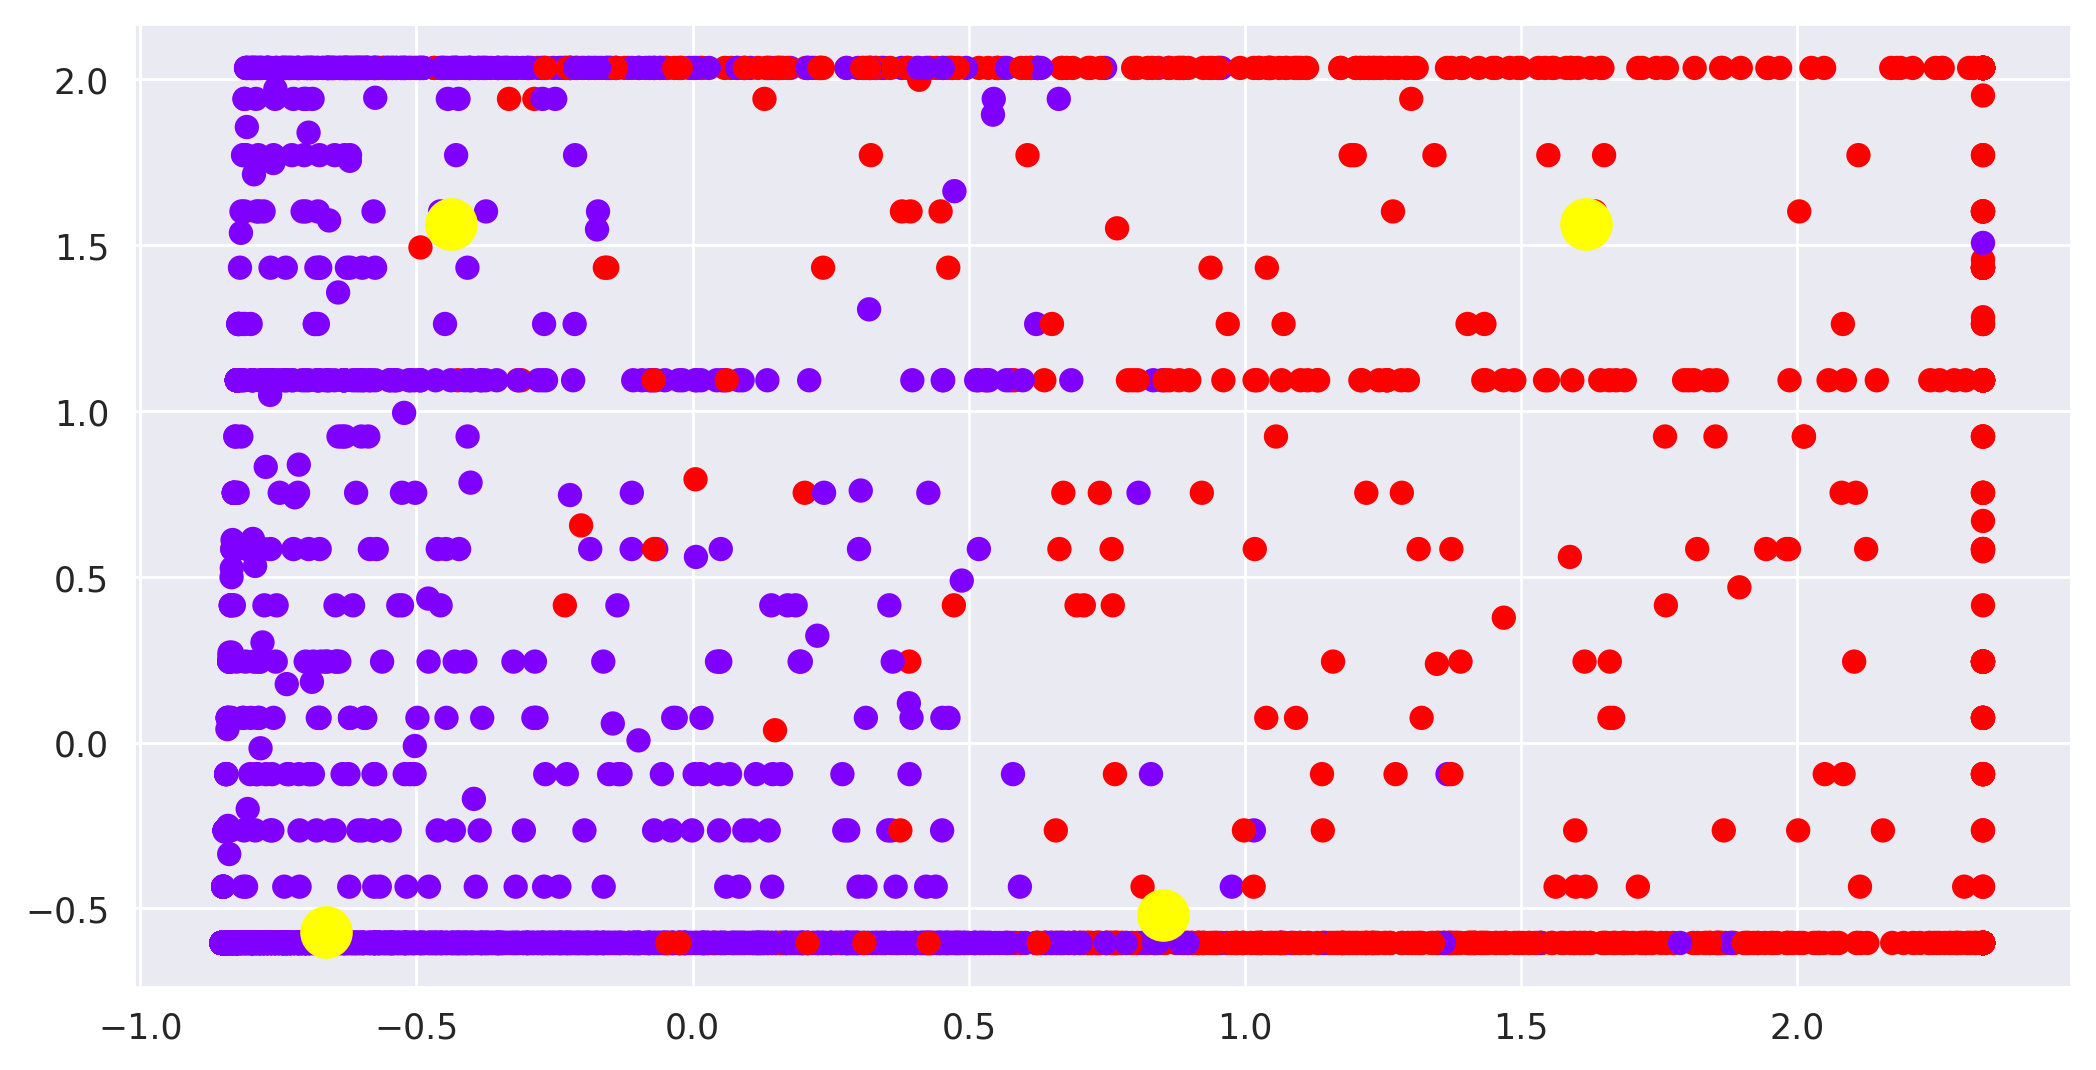

In [31]:
# @title Plot

plt.scatter(scaled_X[:,2],scaled_X[:,4], c = yp1, cmap='rainbow') # c - color parameter
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,4], c = 'yellow',s = 200)

In [32]:
# @title Evaluation of Hierarchical Clustering
from sklearn.metrics import silhouette_score
silhouette_score(scaled_X,yp1)

0.39728294375175716

## DBSCAN

Text(0, 0.5, 'Epsilon value')

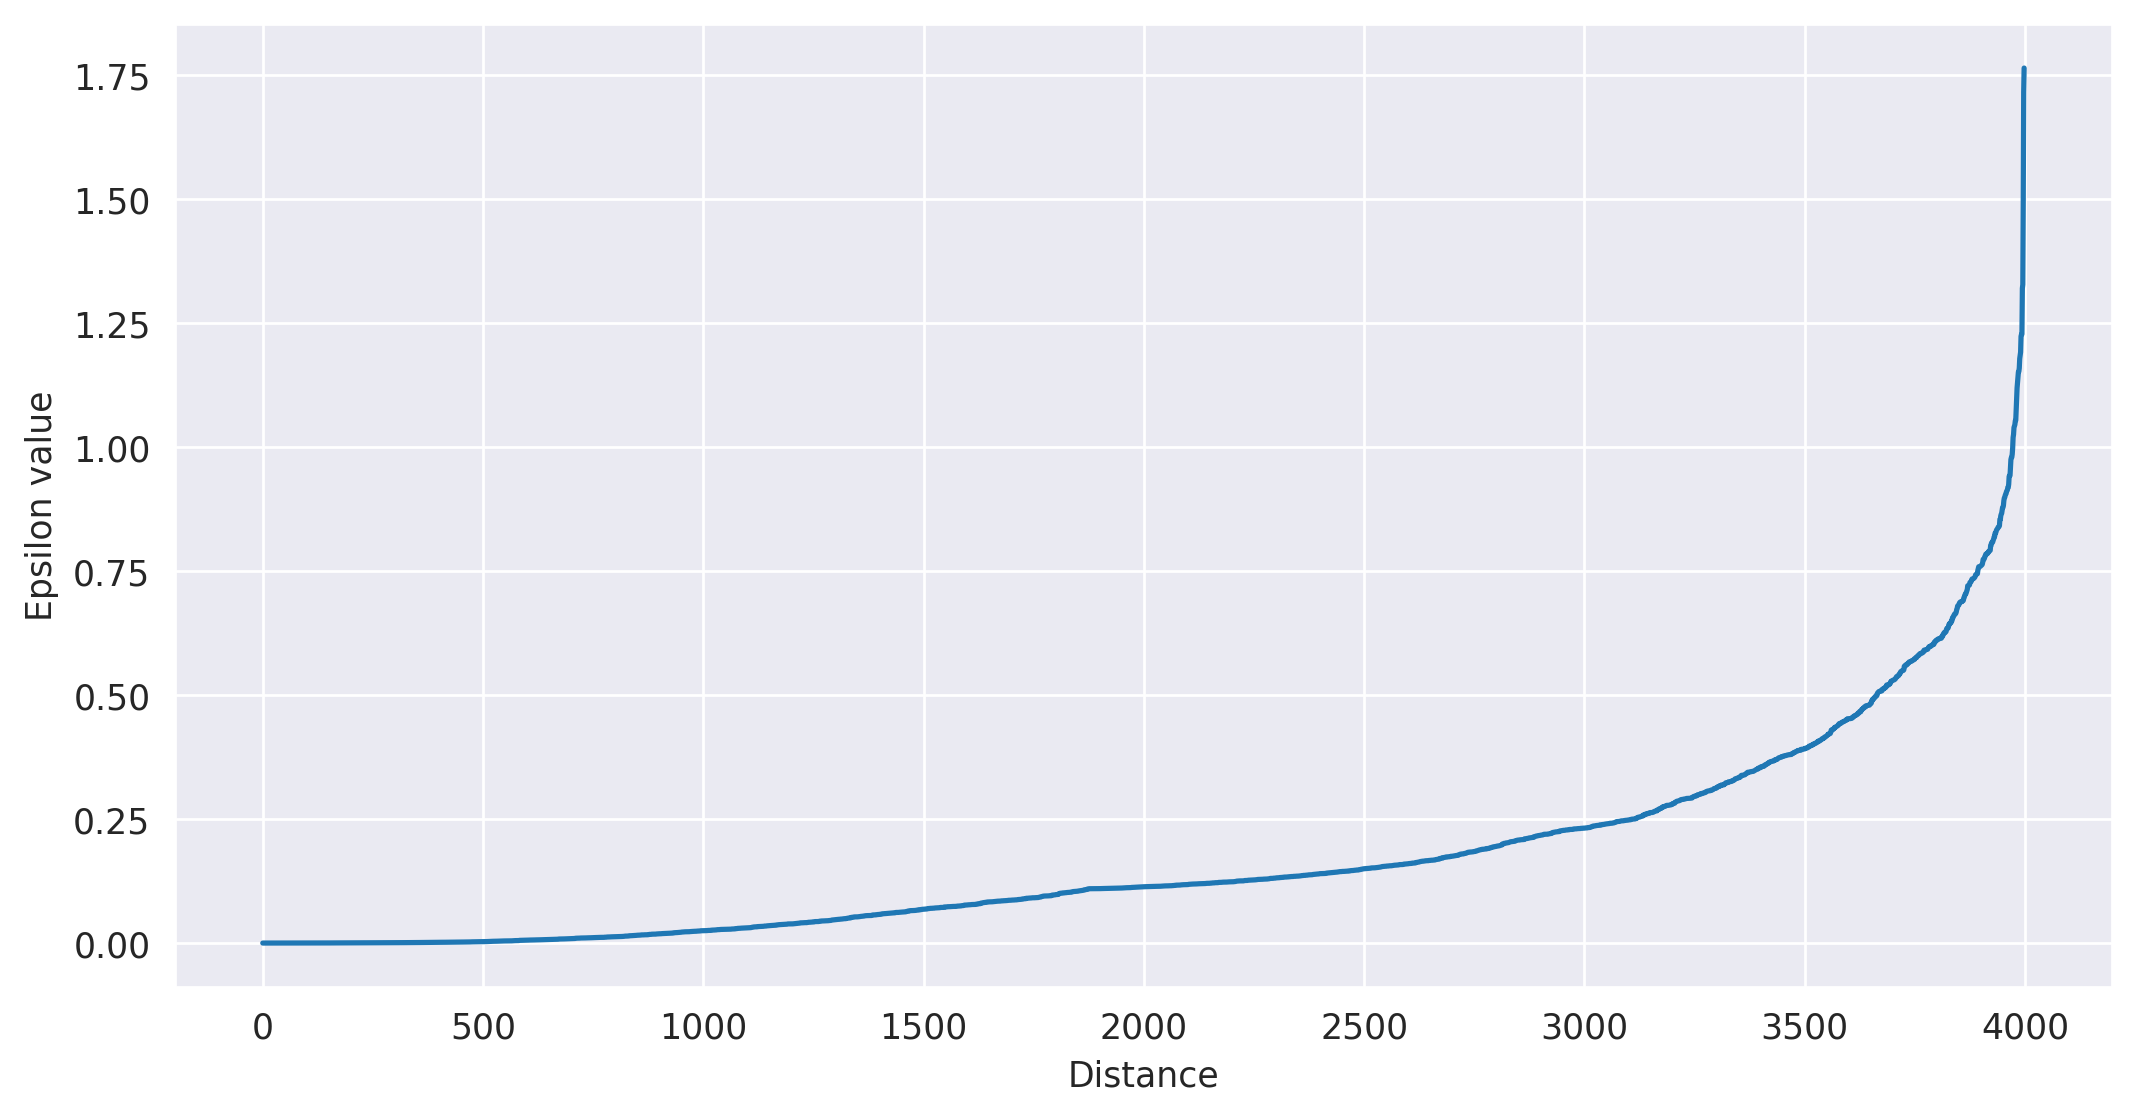

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=11).fit(scaled_X)
d,i = neigh.kneighbors(scaled_X)
#pd.DataFrame(d)

dist = np.sort(d[:,1])
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [35]:
# @title Hyperparameter Tunning for values of 'eps' and 'min_samples'
epsilon = np.arange(0.5,2,0.1)
samples = np.arange(3,23,1)
s_score = {}
for e in epsilon:
    #print('epsilon =',round(e,1))
    for s in samples:
        try:
            #print('    samples =',s)
            db = DBSCAN(eps=round(e,1),min_samples=int(s))
            yp2 = db.fit_predict(scaled_X)
            ss = silhouette_score(scaled_X,yp2)
            s_score[ss]=(round(e,1),s)
            #print('        silhouette_score =',ss)
            #print('-------------------')
        except:
            pass
    #print('---------------------------------------------')
print('Maximum Silhouette score is ',max(s_score.keys()),'for eps =',s_score[max(s_score.keys())][0],' and for samples =',s_score[max(s_score.keys())][1])
print('')

Maximum Silhouette score is  0.37090472147101083 for eps = 1.9  and for samples = 22



In [74]:
five_max_s_score = sorted(s_score.keys(), reverse=1)[0:5]
five_max_s_score
for score in five_max_s_score:
    (e,s) = s_score[score]
    print('eps =',e,'  ;  min_samples =',s)
    db = DBSCAN(eps=e, min_samples=s)
    yp2 = db.fit_predict(scaled_X)
    data['cluster'] = yp2

    print(data['cluster'].value_counts())
    print(data.groupby('cluster').agg('mean'))
    print('---------------------------------------------------------------')


eps = 1.9   ;  min_samples = 22
cluster
 0    3998
-1       1
Name: count, dtype: int64
                 ID#       Balance  cc1_miles   Bonus_miles  Bonus_trans  \
cluster                                                                    
-1       1544.000000  57857.000000    1.00000  57626.250000    37.000000   
 0       2014.937219  63770.114432    2.05978  15400.171523    11.464232   

         Flight_miles_12mo  Flight_trans_12  
cluster                                      
-1              777.500000         2.500000  
 0              177.905703         0.591046  
---------------------------------------------------------------
eps = 1.3   ;  min_samples = 6
cluster
 0    3992
-1       7
Name: count, dtype: int64
                 ID#        Balance  cc1_miles   Bonus_miles  Bonus_trans  \
cluster                                                                     
-1       2217.142857  113634.357143   1.714286  45745.428571    31.714286   
 0       2014.464679   63681.195892   2.0

* for top five values of Maximum Silhouette score we observe that only one class formed with few outliers.

In [77]:
# @title Final Model with 'eps=1.9' and 'min_samples=22'
db = DBSCAN(eps=1.9, min_samples=22)
yp2 = db.fit_predict(scaled_X)

data['cluster'] = yp2
data

ID#  Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0        1  28143.0          1        174.0            1                0.0   
1        2  19244.0          1        215.0            2                0.0   
2        3  41354.0          1       4123.0            4                0.0   
3        4  14776.0          1        500.0            1                0.0   
4        5  97752.0          4      43300.0           26              777.5   
...    ...      ...        ...          ...          ...                ...   
3994  4017  18476.0          1       8525.0            4              200.0   
3995  4018  64385.0          1        981.0            5                0.0   
3996  4019  73597.0          3      25447.0            8                0.0   
3997  4020  54899.0          1        500.0            1              500.0   
3998  4021   3016.0          1          0.0            0                0.0   

      Flight_trans_12  cluster  
0                 0.0        0  
1                 0.0        0  
2                 0.0        0  
3                 0.0        0  
4                 2.5        0  
...               ...      ...  
3994              1.0        0  
3995              0.0        0  
3996              0.0        0  
3997              1.0        0  
3998              0.0        0  

[3999 rows x 8 columns]

In [78]:
data['cluster'].value_counts()

cluster
 0    3998
-1       1
Name: count, dtype: int64

In [79]:
data.groupby('cluster').agg('mean')

ID#       Balance  cc1_miles   Bonus_miles  Bonus_trans  \
cluster                                                                    
-1       1544.000000  57857.000000    1.00000  57626.250000    37.000000   
 0       2014.937219  63770.114432    2.05978  15400.171523    11.464232   

         Flight_miles_12mo  Flight_trans_12  
cluster                                      
-1              777.500000         2.500000  
 0              177.905703         0.591046

In [80]:

data[data['cluster']==-1]

ID#  Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
1529  1544  57857.0          1     57626.25           37              777.5   

      Flight_trans_12  cluster  
1529              2.5       -1